In [1]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set()



# Data Anaylsis

In [12]:
#loading the data set
raw_data =pd.read_csv(r'rainfall in india 1901-2015.csv') 

#again using pandas inbuilt function "descirbe" to check if they are any missing values in the data 
raw_data.describe(include='all')
#describe function: Generates general descriptive statistics about the data


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
unique,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BIHAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,NaN,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,NaN,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,NaN,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,NaN,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,NaN,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000


In [11]:
raw_data.describe?

In [16]:
#isnull() gives us the sum of the missing values in the dataset
raw_data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [17]:
# dropping all the missing values as they are less than 5% of the total data.
data_cleaned = raw_data.dropna(axis=0)

#now checking the cleaned data 
data_cleaned.describe(include='all')

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4090,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000
unique,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BIHAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1958.321271,18.818484,21.644792,27.252494,42.714548,84.868044,228.928020,346.496968,289.897506,197.003056,95.139022,39.548191,18.695575,1411.008900,40.462861,154.835452,1062.325575,153.384499
std,NaN,33.148944,33.521719,35.762010,46.829179,67.264863,122.556801,233.535693,269.352685,187.702293,135.266708,99.325638,68.275513,42.185553,903.846565,59.136229,200.315769,705.970202,166.414108
min,NaN,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,NaN,1930.000000,0.600000,0.600000,1.000000,3.000000,8.500000,70.000000,175.225000,155.925000,100.400000,14.600000,0.700000,0.100000,804.500000,4.100000,23.800000,573.275000,34.025000
50%,NaN,1959.000000,5.900000,6.600000,7.800000,15.500000,36.050000,138.450000,284.300000,259.500000,173.600000,64.650000,9.500000,3.000000,1121.300000,19.000000,74.250000,880.200000,97.550000
75%,NaN,1987.000000,21.950000,26.600000,31.100000,49.375000,94.975000,302.250000,416.700000,377.775000,265.600000,148.100000,45.475000,17.300000,1644.775000,50.200000,195.300000,1286.175000,211.800000


In [19]:
#collecting names of the all the states in the dataset using the unique function in the pandas

x_names=data_cleaned.SUBDIVISION.unique()

np.where(x_names=='EAST UTTAR PRADESH')
x_names


array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

# Plotting Average Rainfall of Every State from 1901-2015

ANDAMAN & NICOBAR ISLANDS
ARUNACHAL PRADESH
ASSAM & MEGHALAYA
NAGA MANI MIZO TRIPURA
SUB HIMALAYAN WEST BENGAL & SIKKIM
GANGETIC WEST BENGAL
ORISSA
JHARKHAND
BIHAR
EAST UTTAR PRADESH
WEST UTTAR PRADESH
UTTARAKHAND
HARYANA DELHI & CHANDIGARH
PUNJAB
HIMACHAL PRADESH
JAMMU & KASHMIR
WEST RAJASTHAN
EAST RAJASTHAN
WEST MADHYA PRADESH
EAST MADHYA PRADESH


c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


GUJARAT REGION
SAURASHTRA & KUTCH
KONKAN & GOA
MADHYA MAHARASHTRA
MATATHWADA
VIDARBHA
CHHATTISGARH
COASTAL ANDHRA PRADESH
TELANGANA
RAYALSEEMA
TAMIL NADU
COASTAL KARNATAKA
NORTH INTERIOR KARNATAKA
SOUTH INTERIOR KARNATAKA
KERALA
LAKSHADWEEP


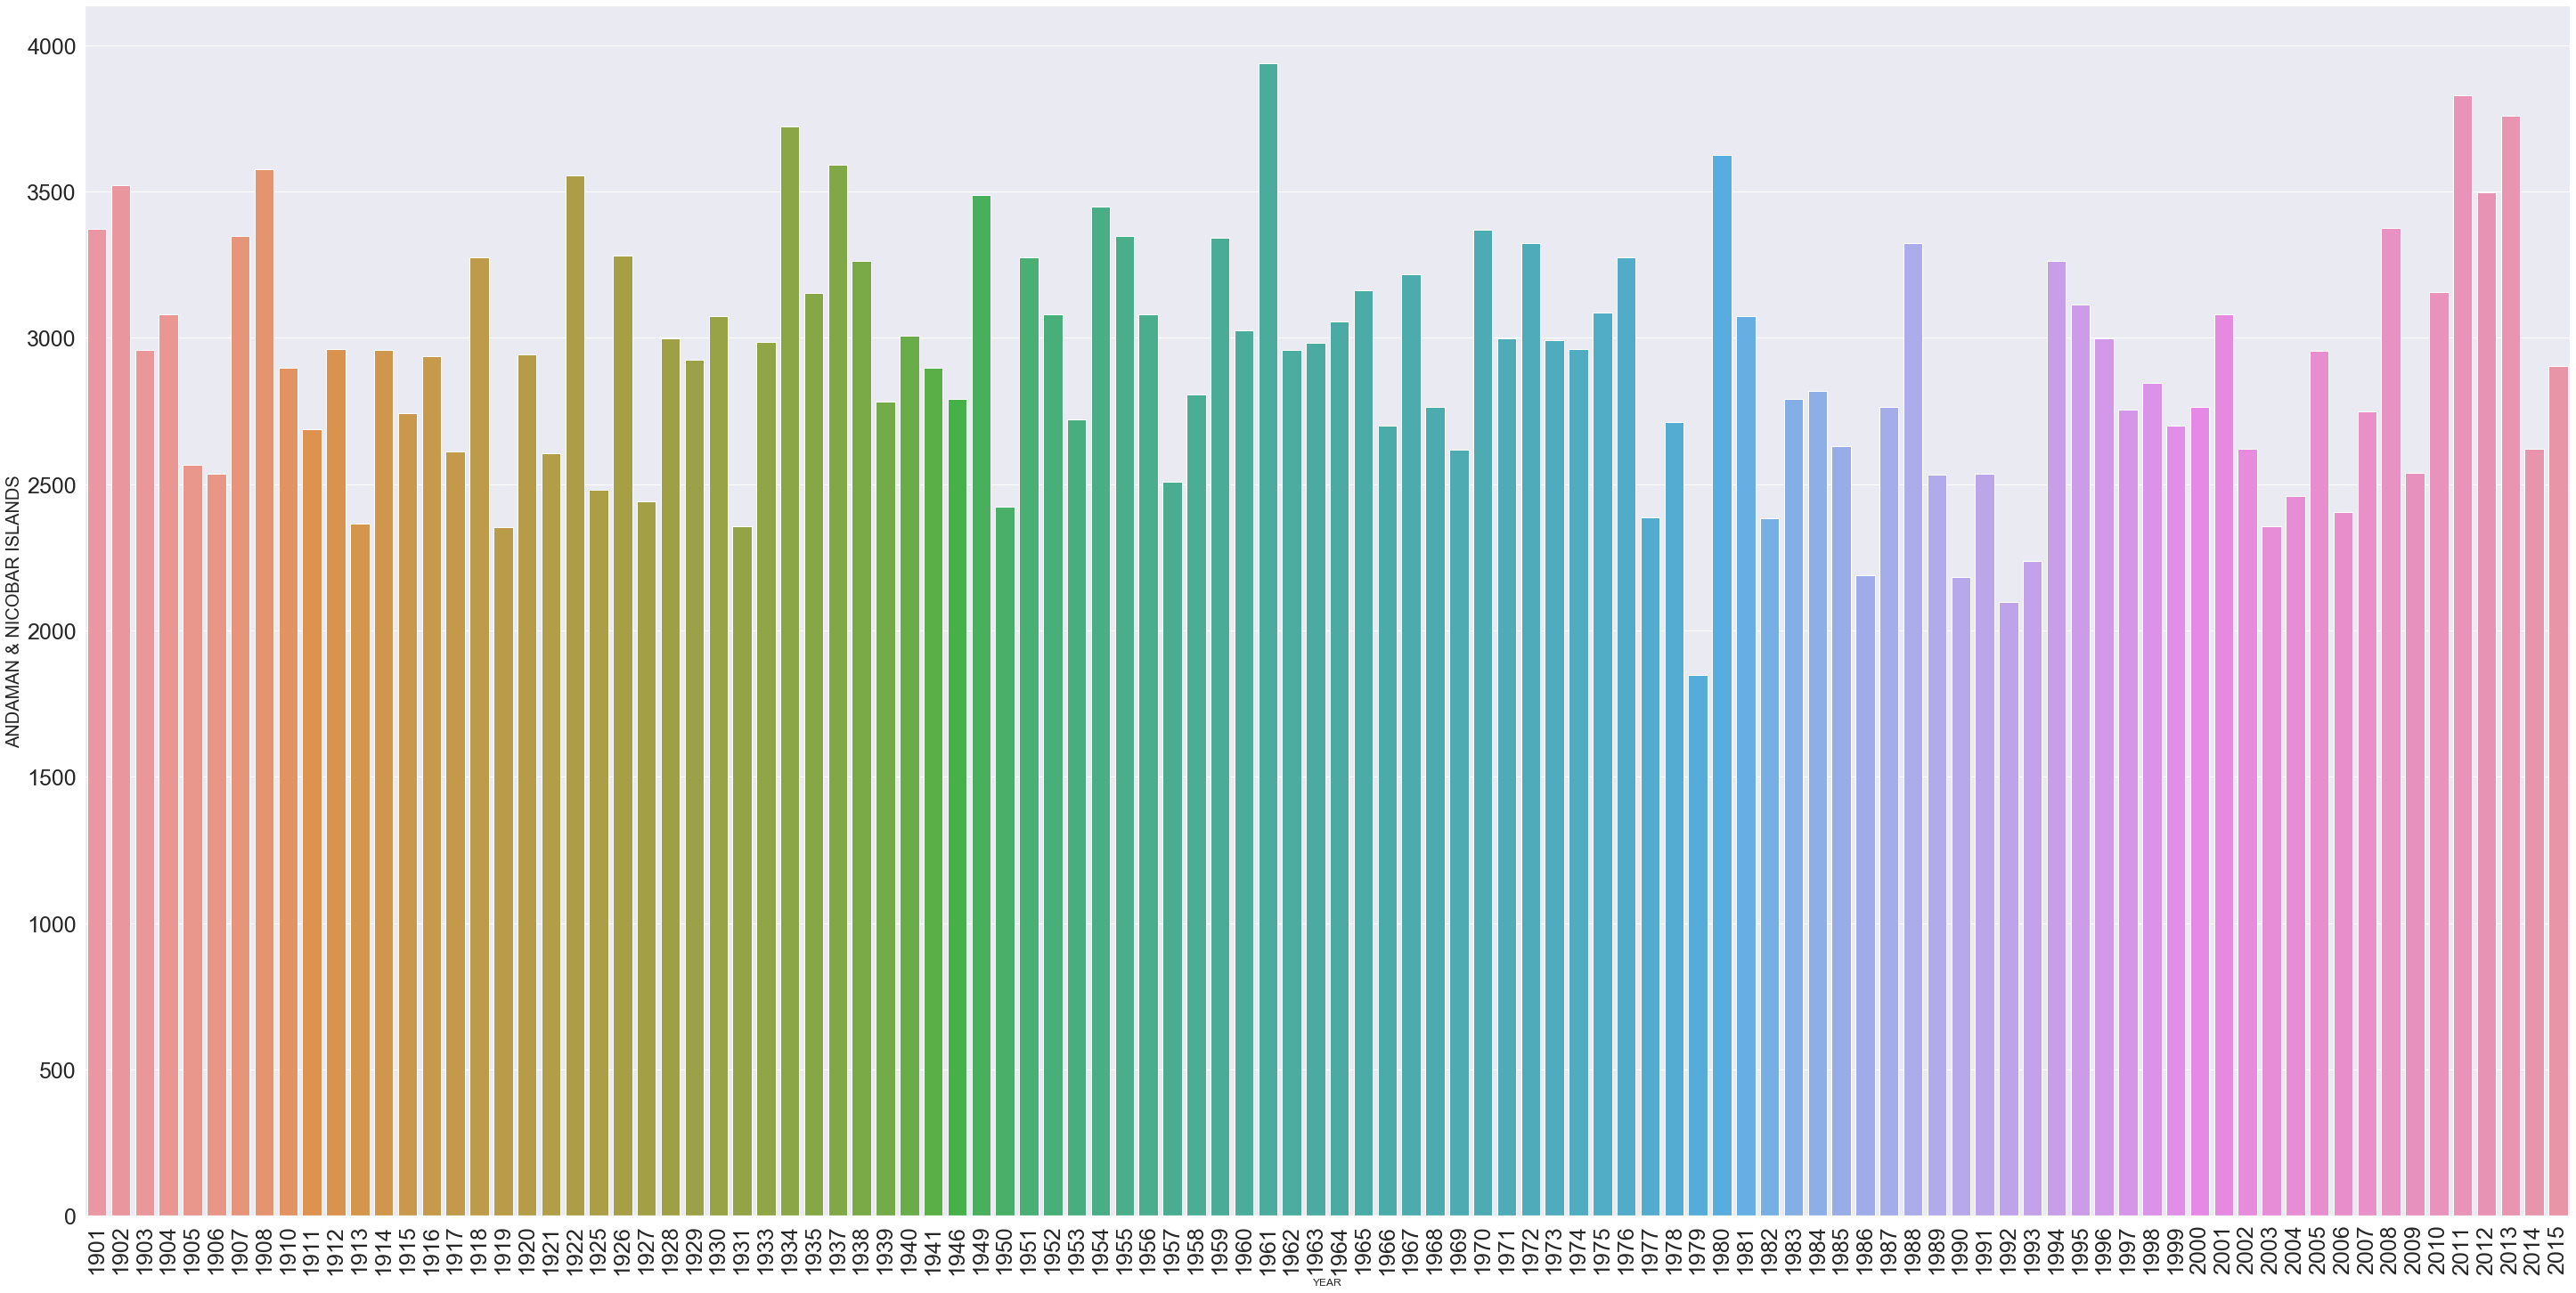

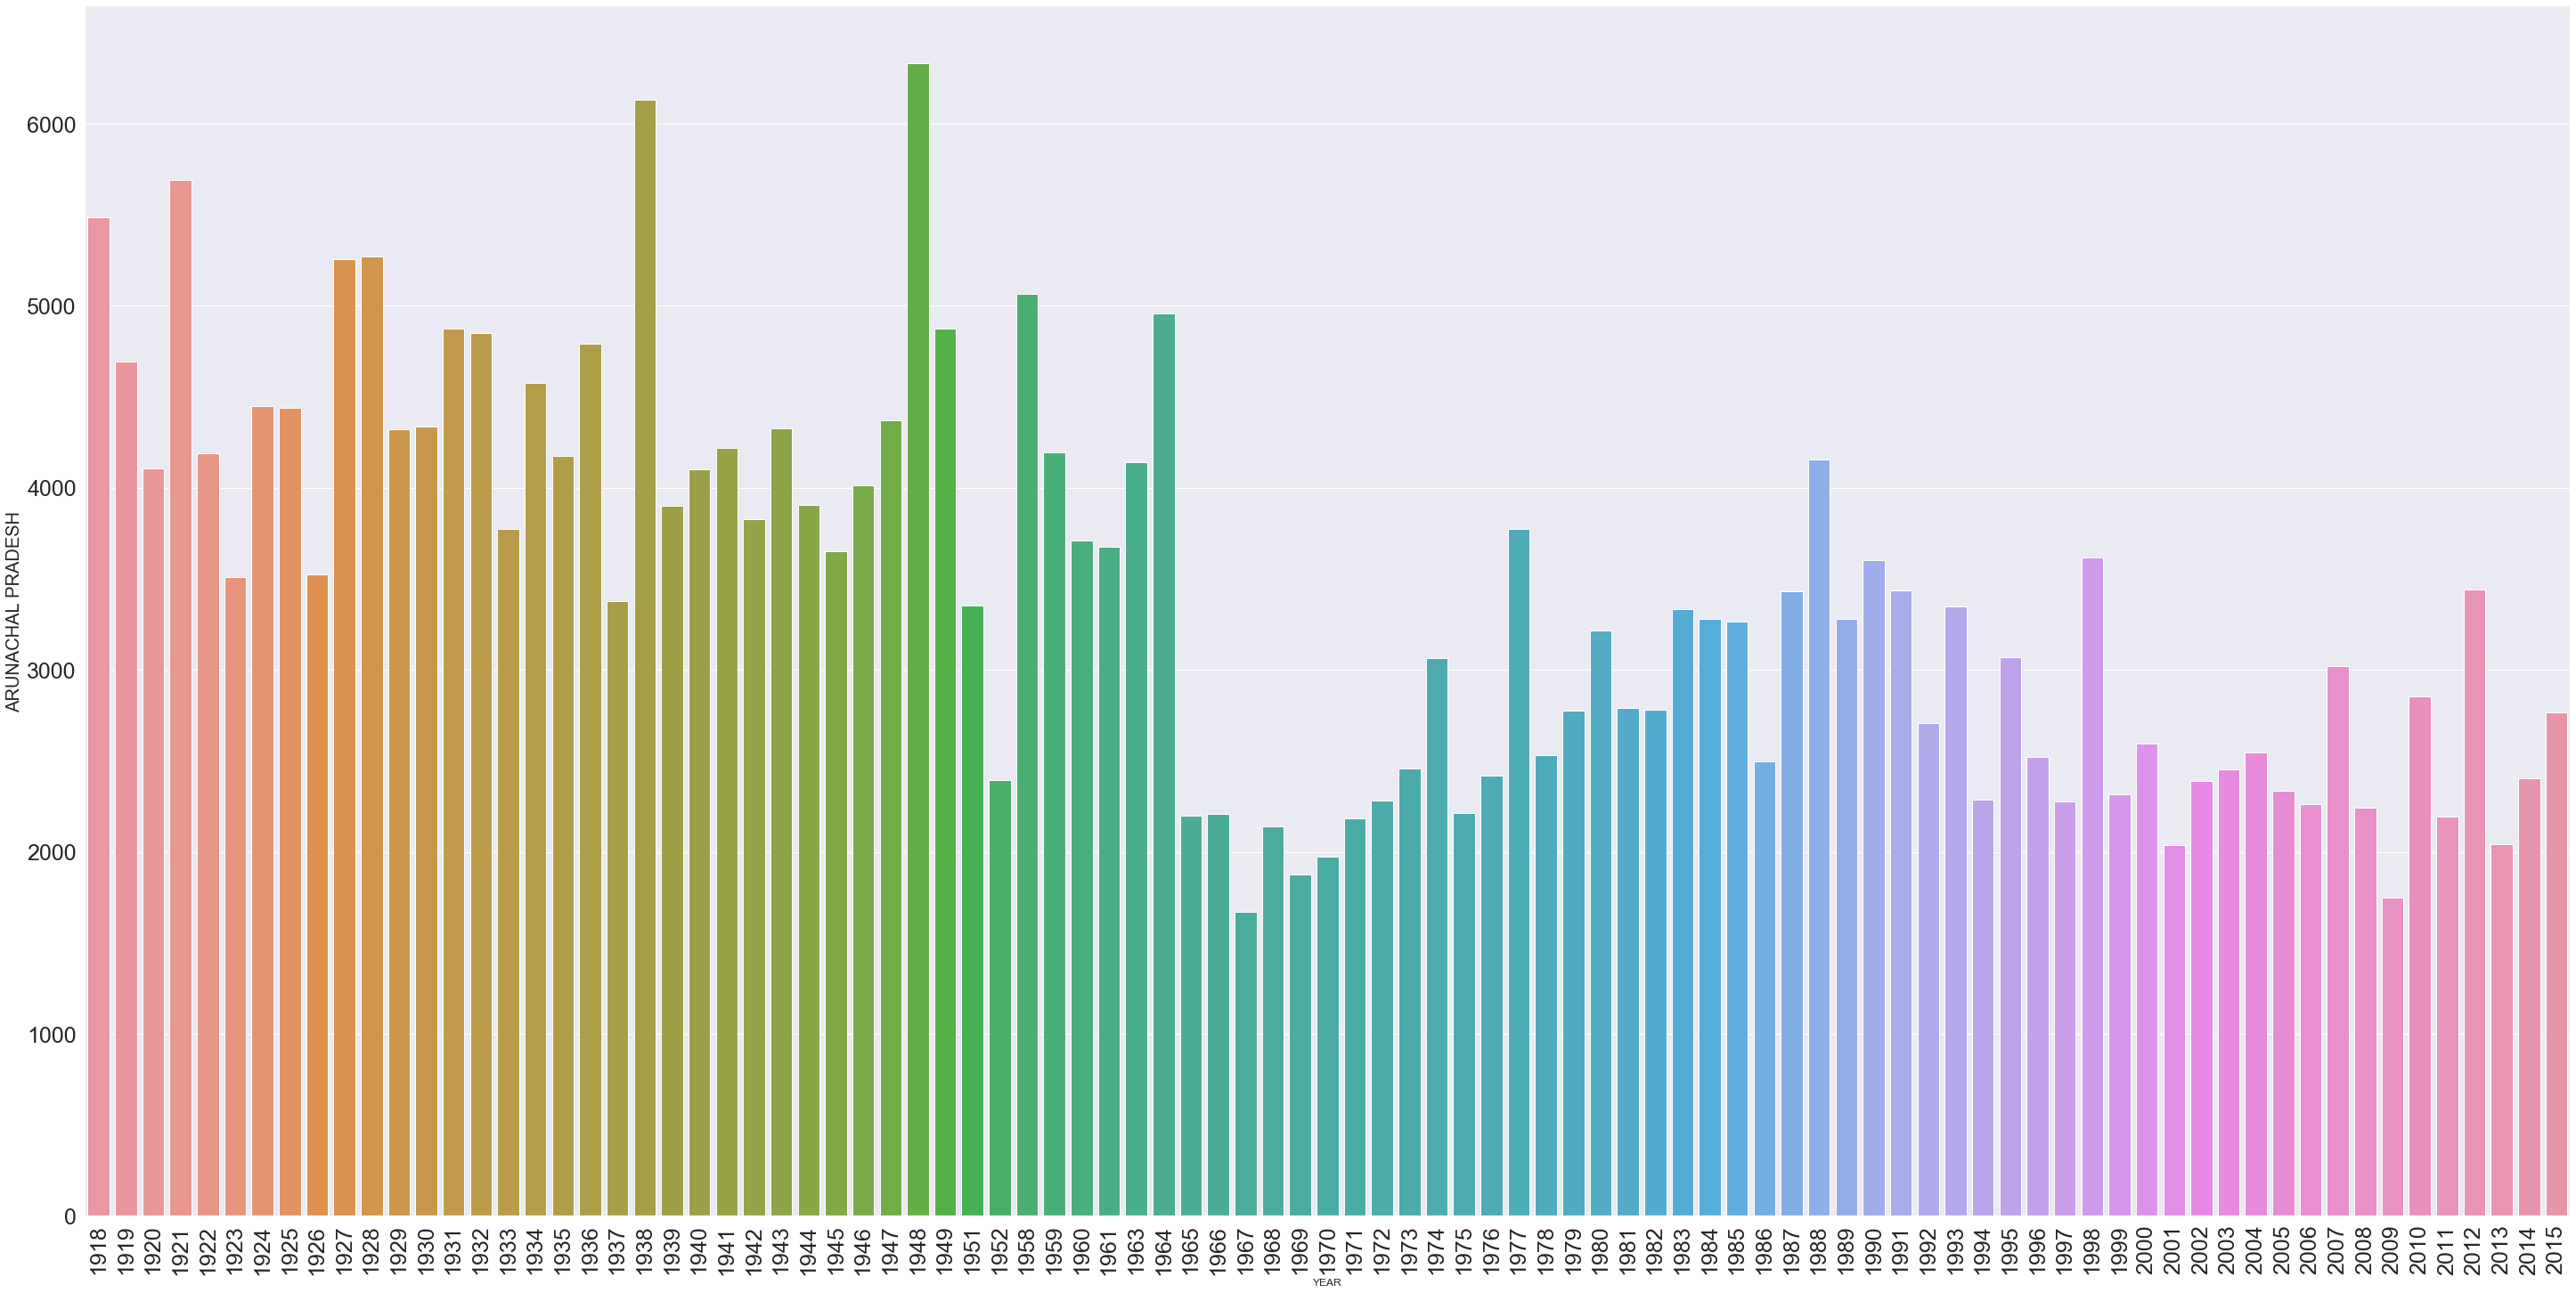

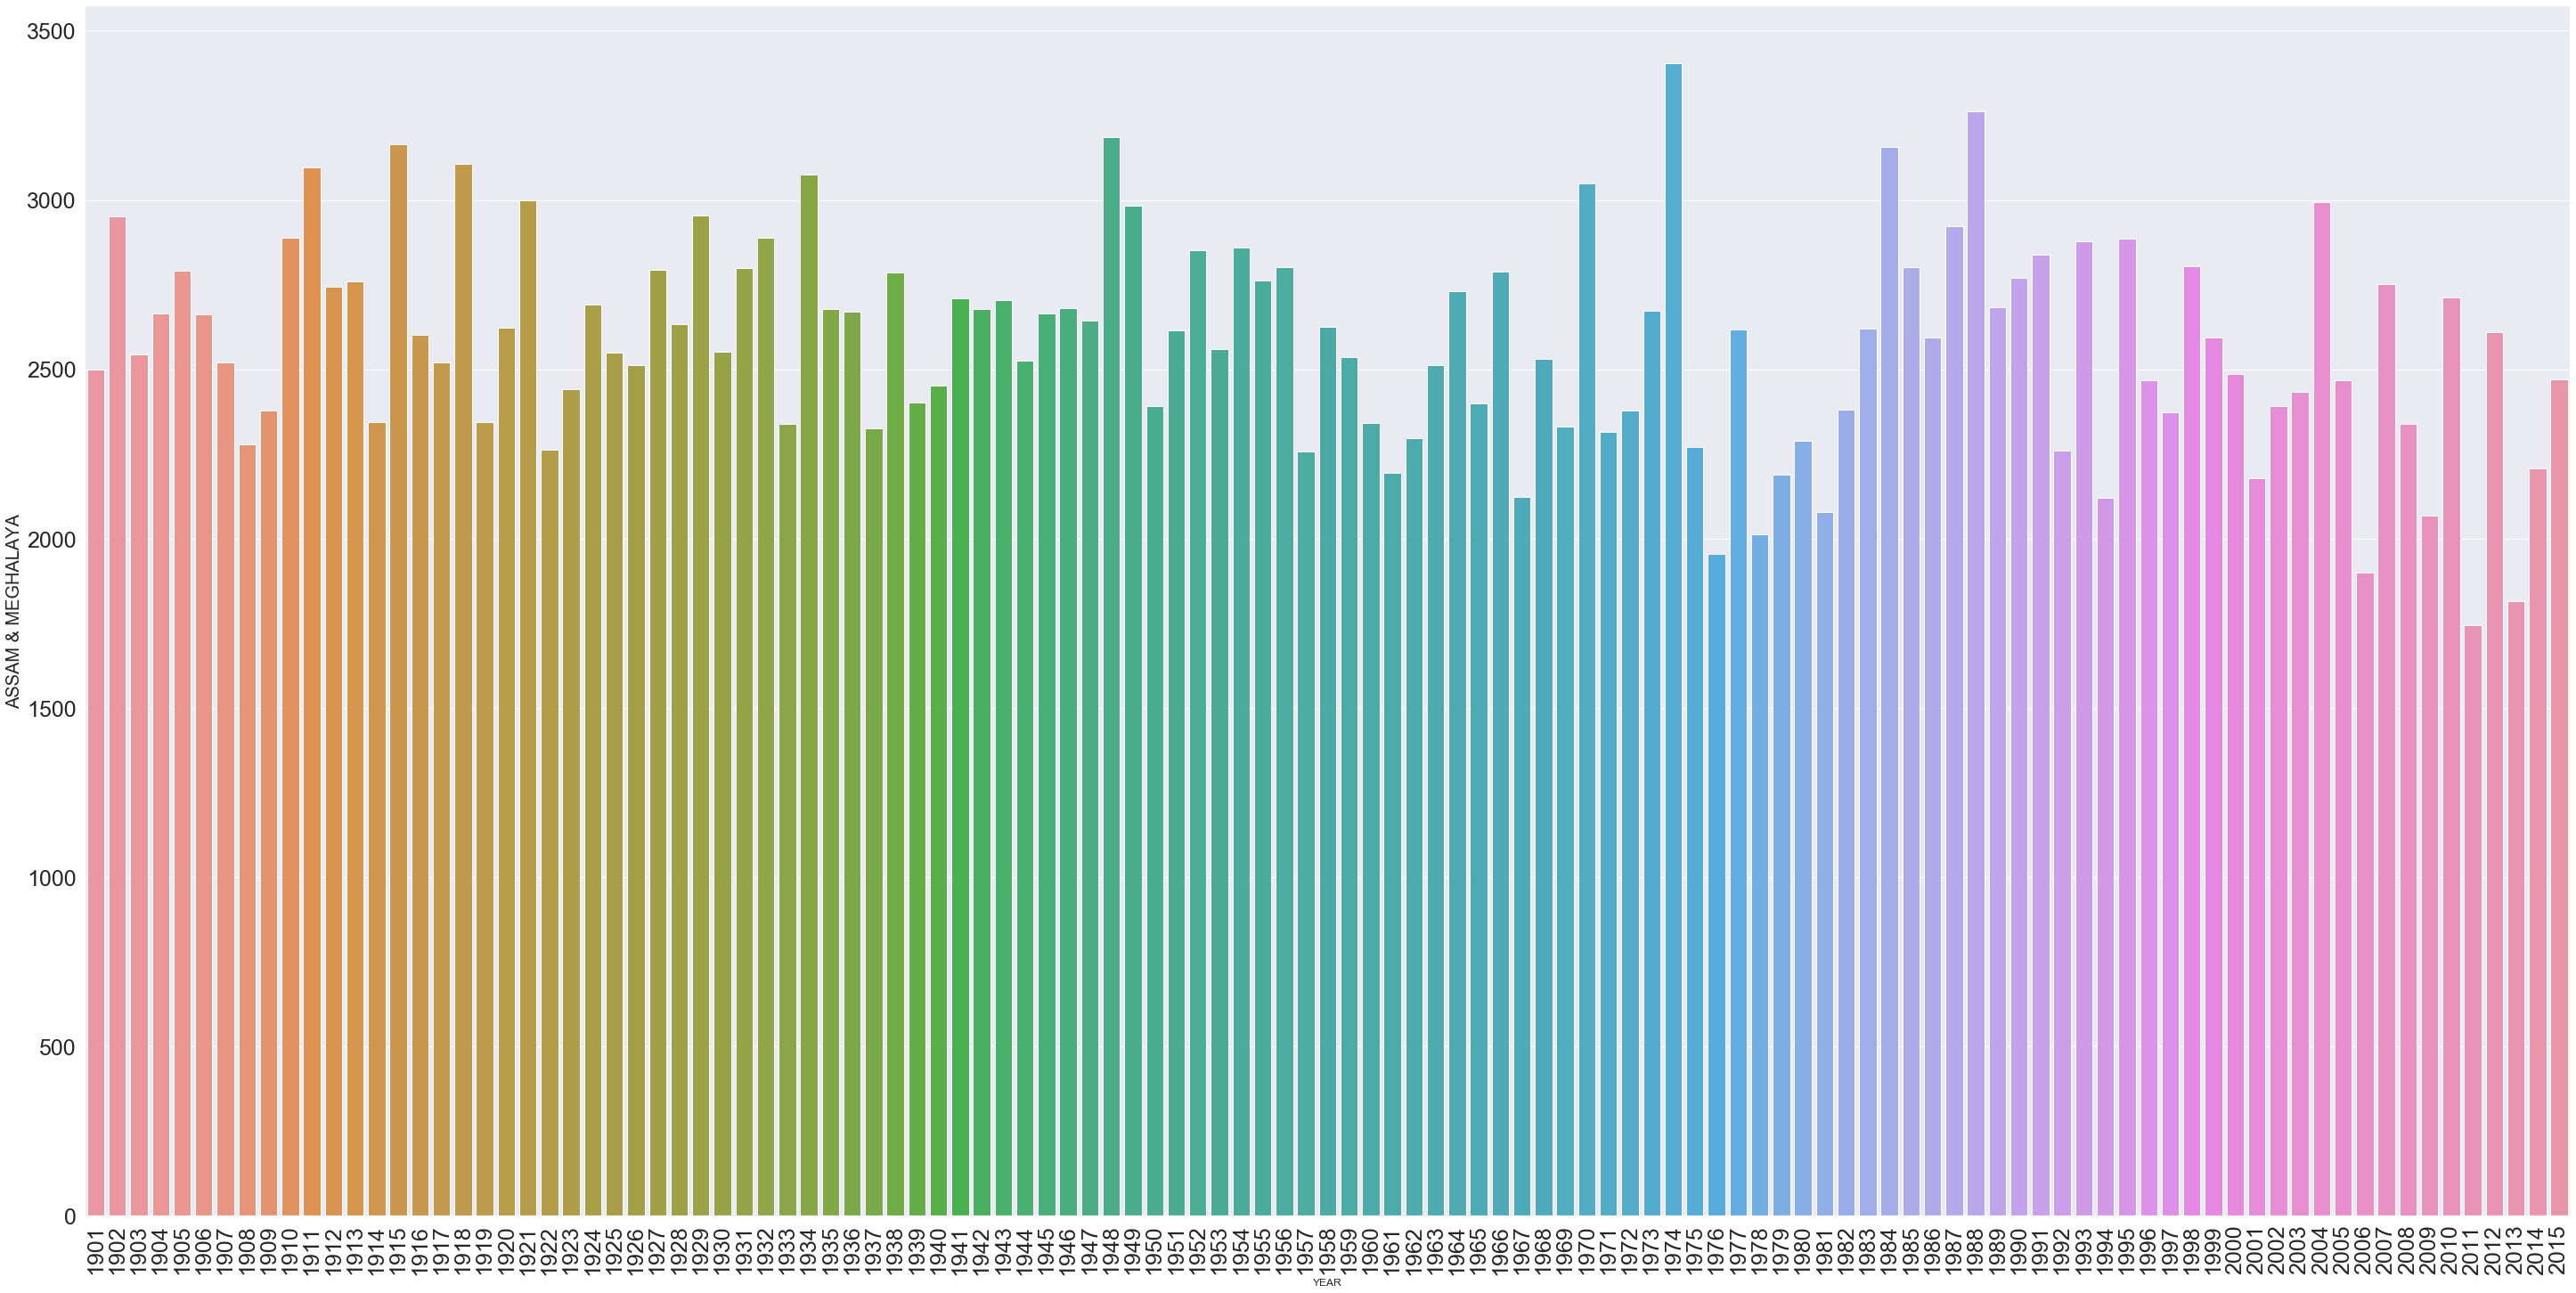

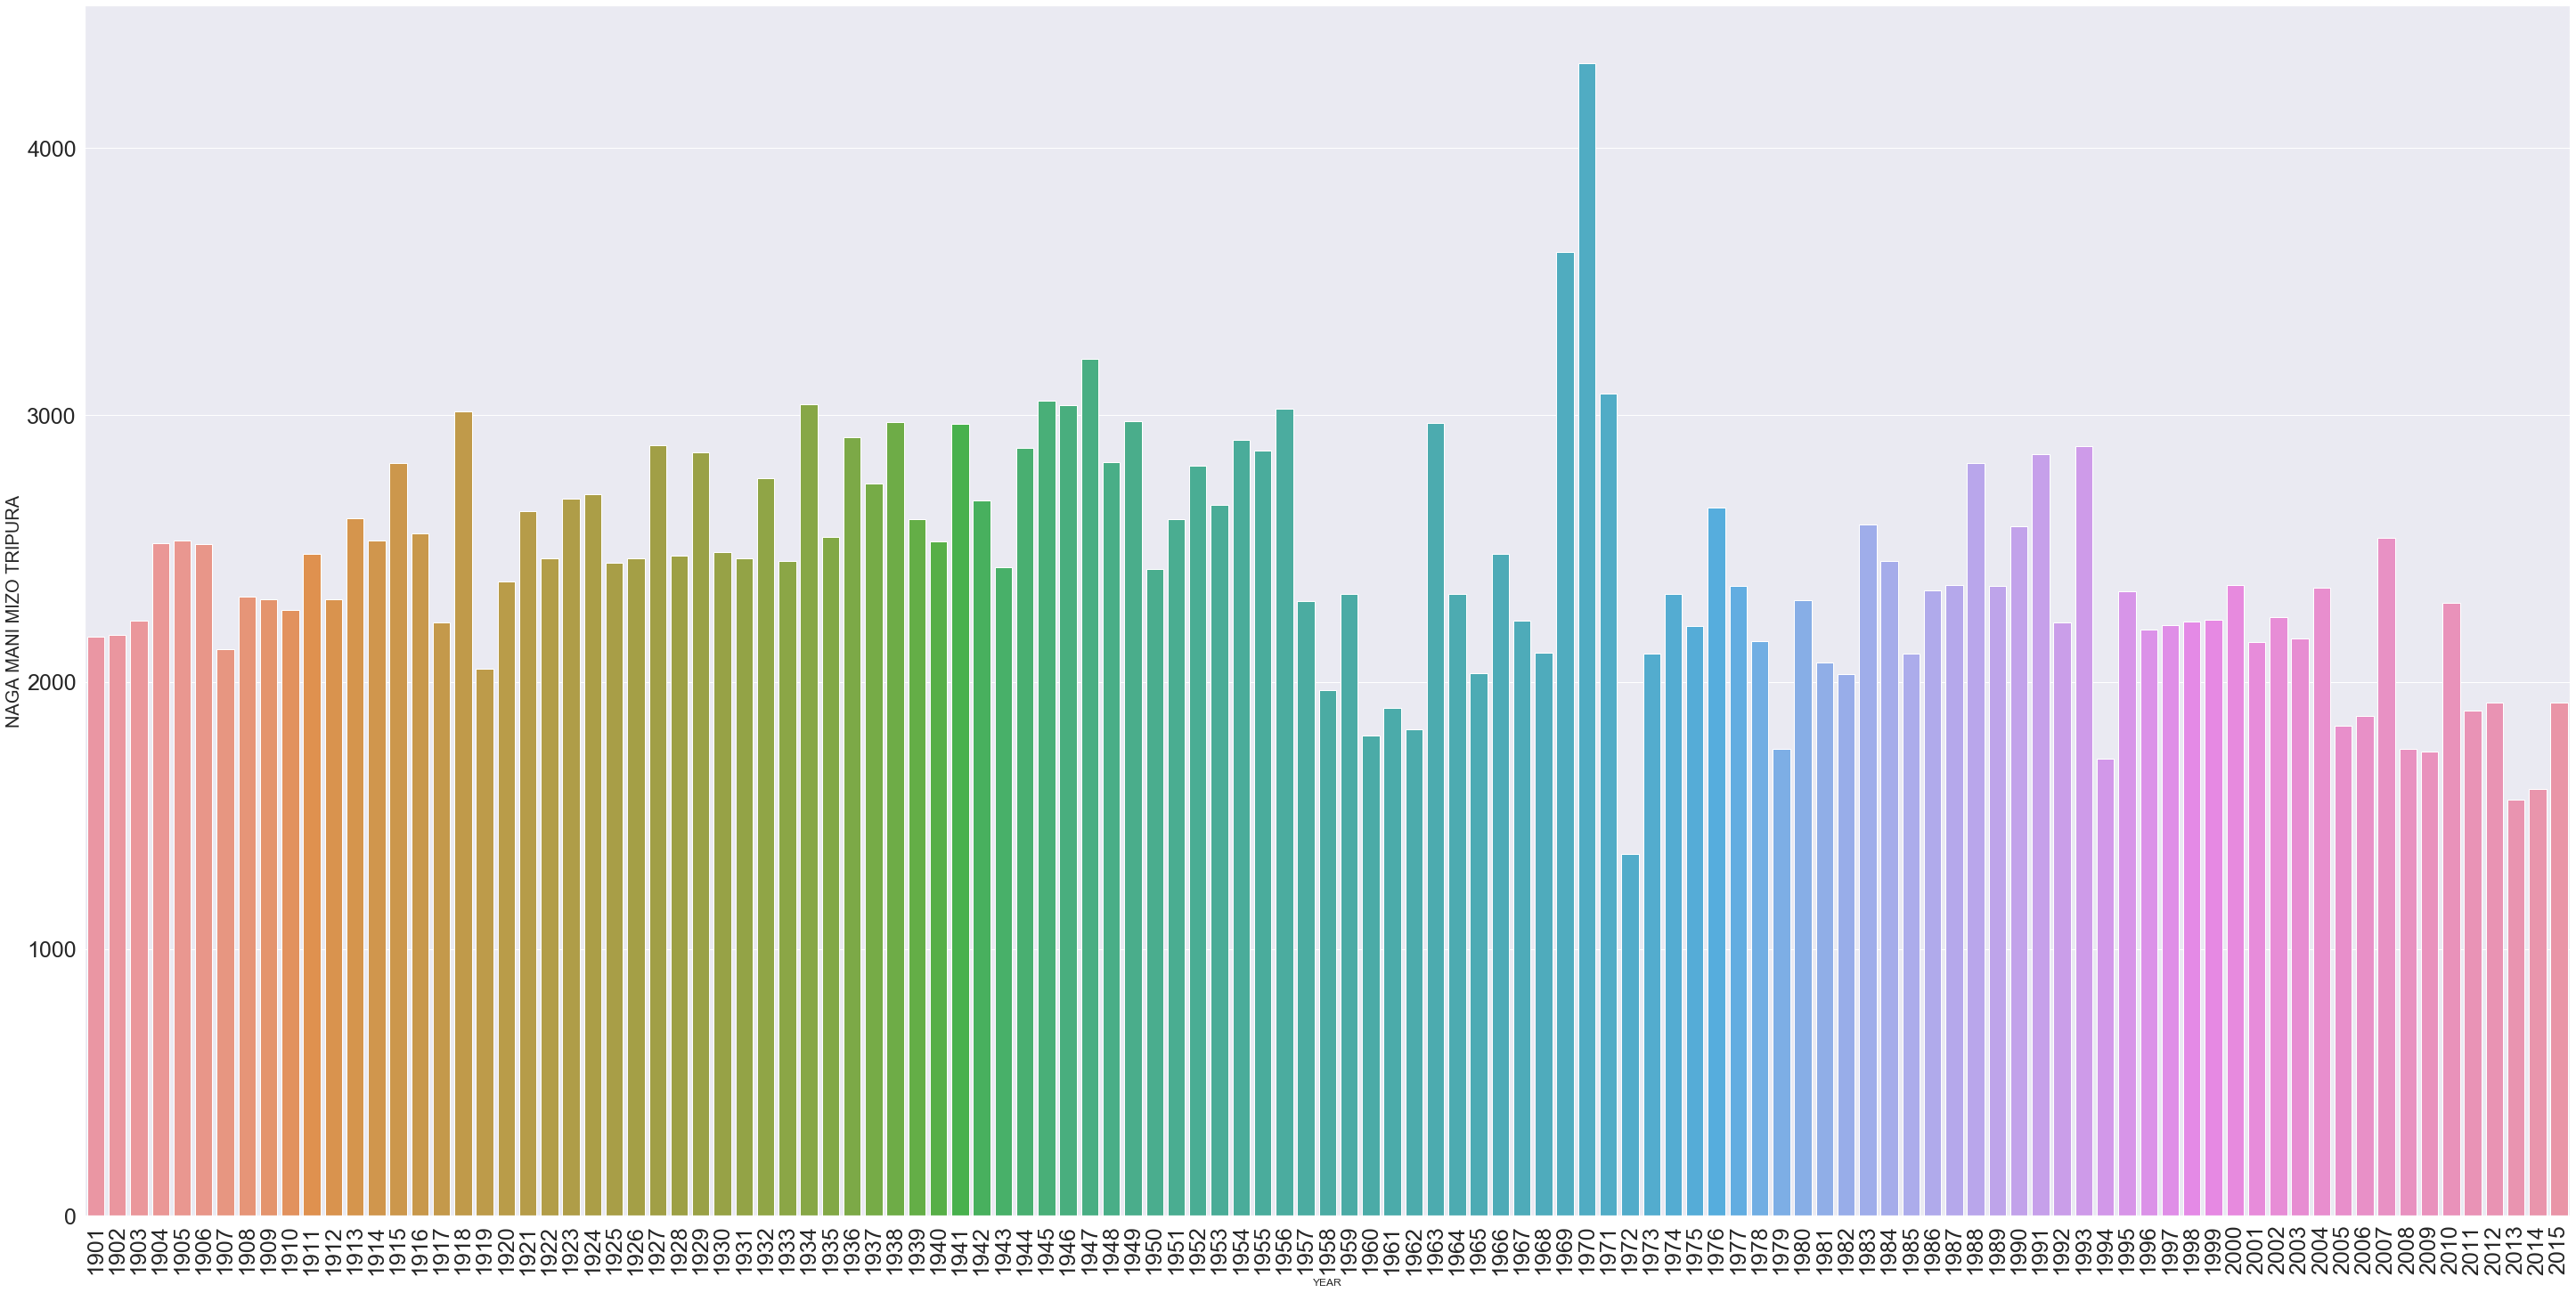

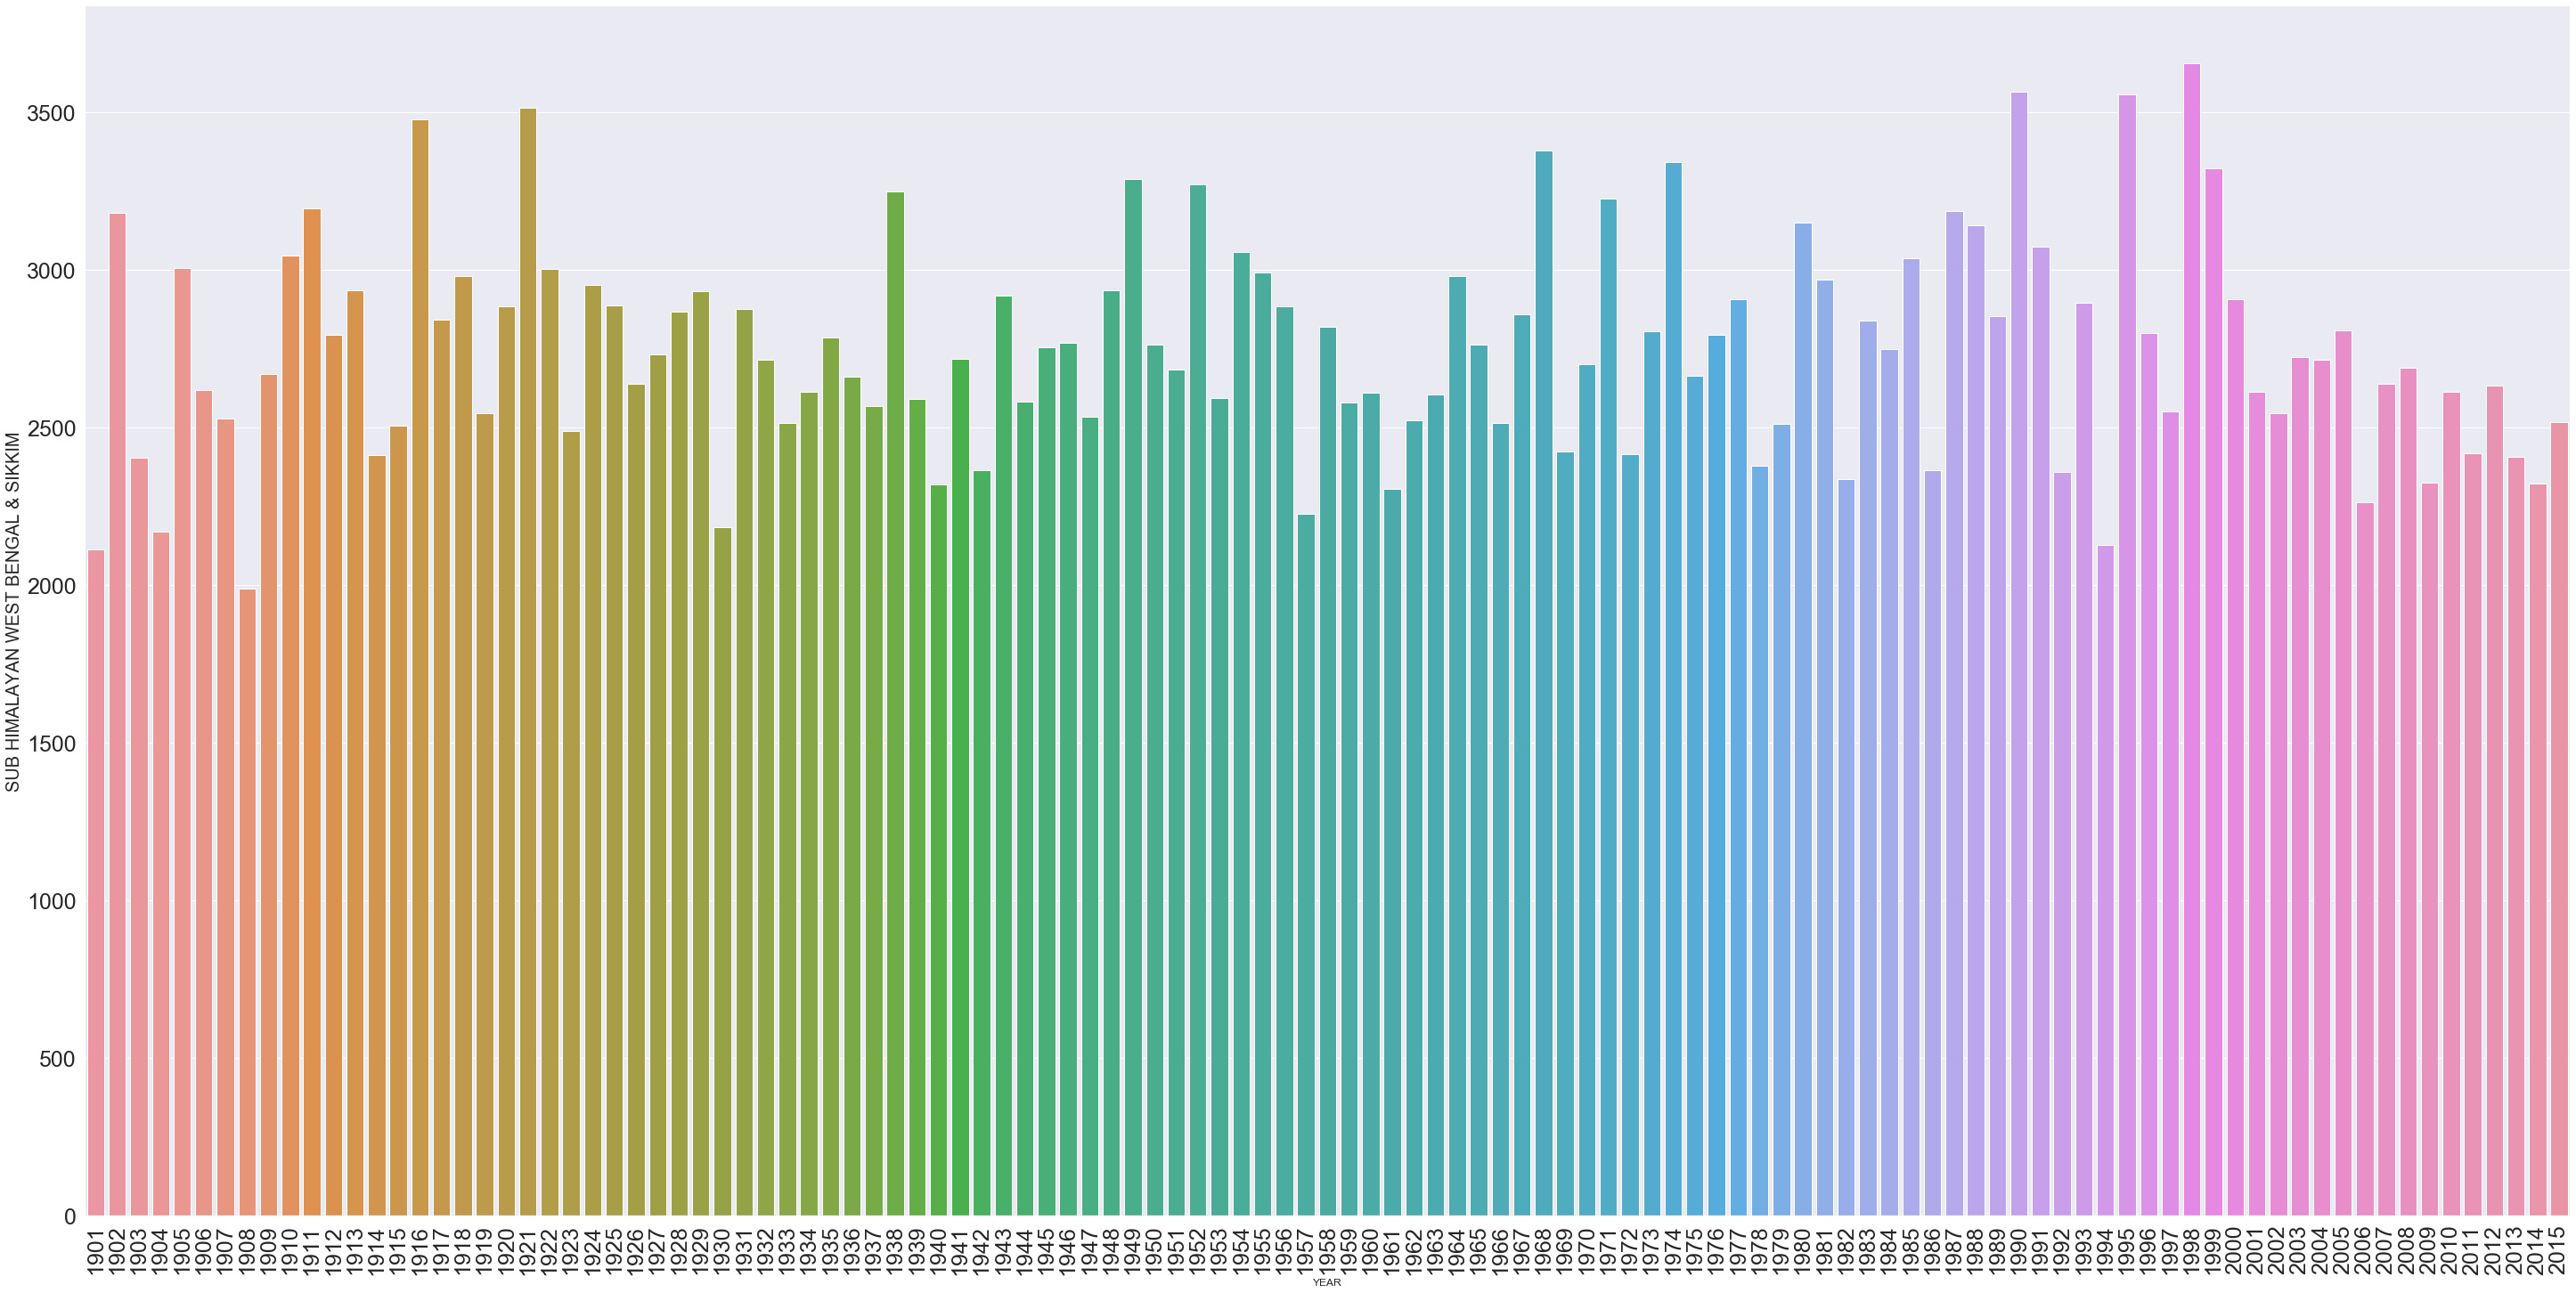

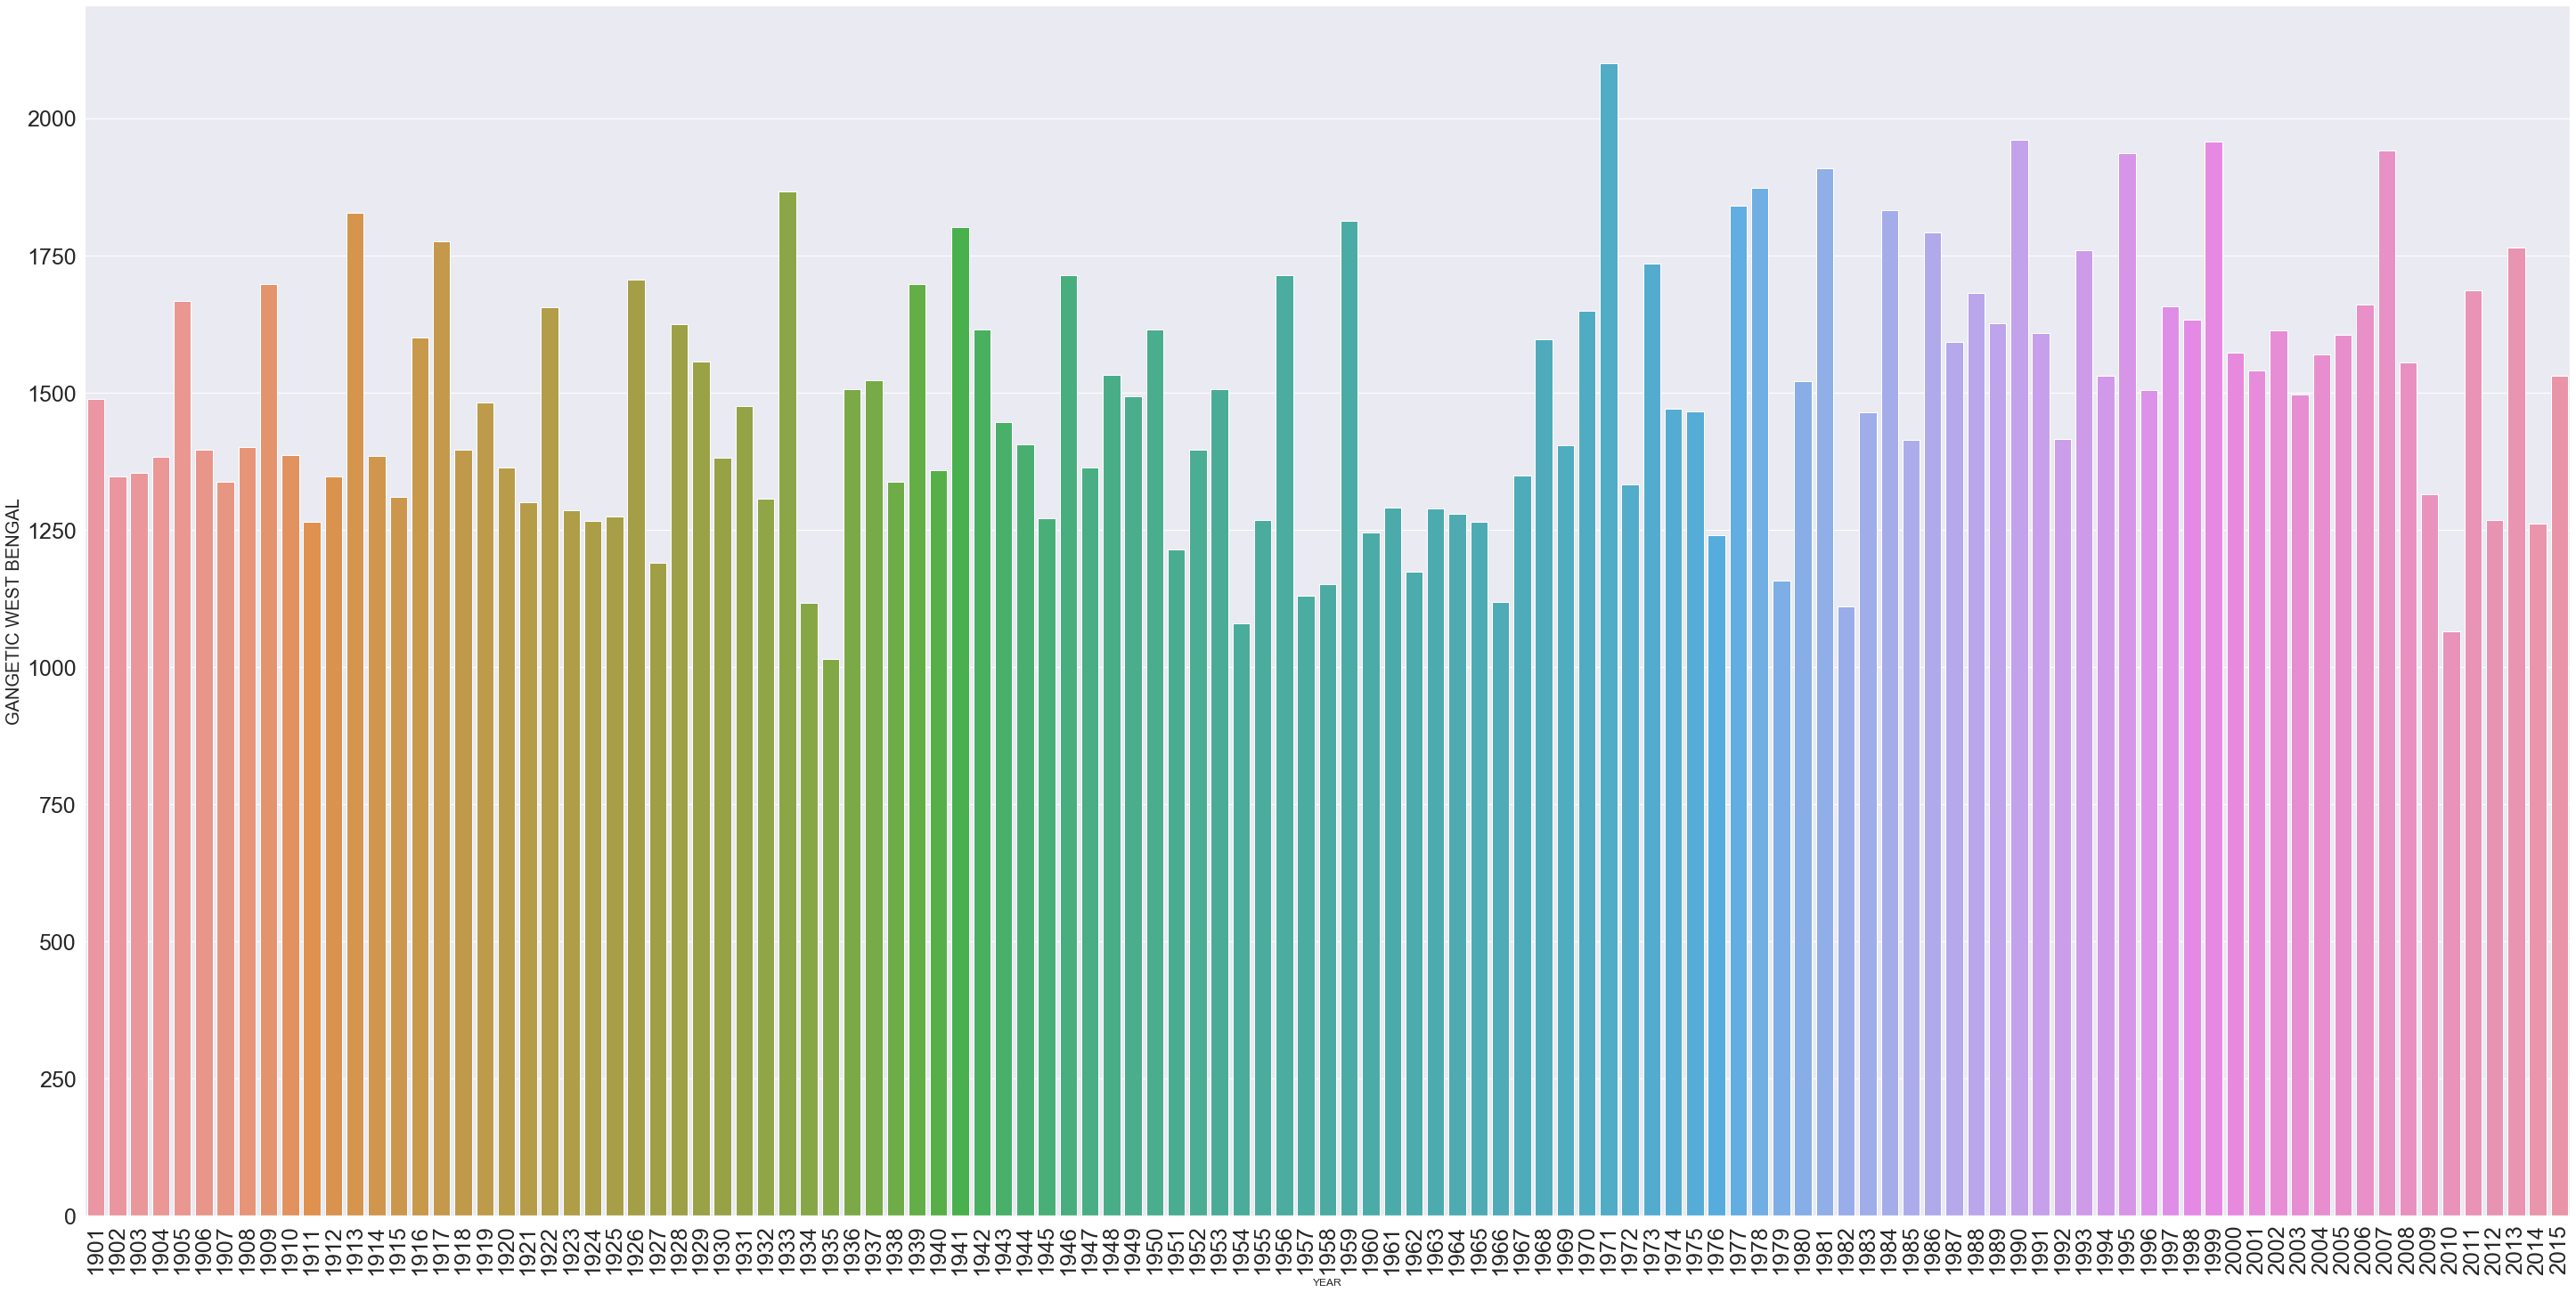

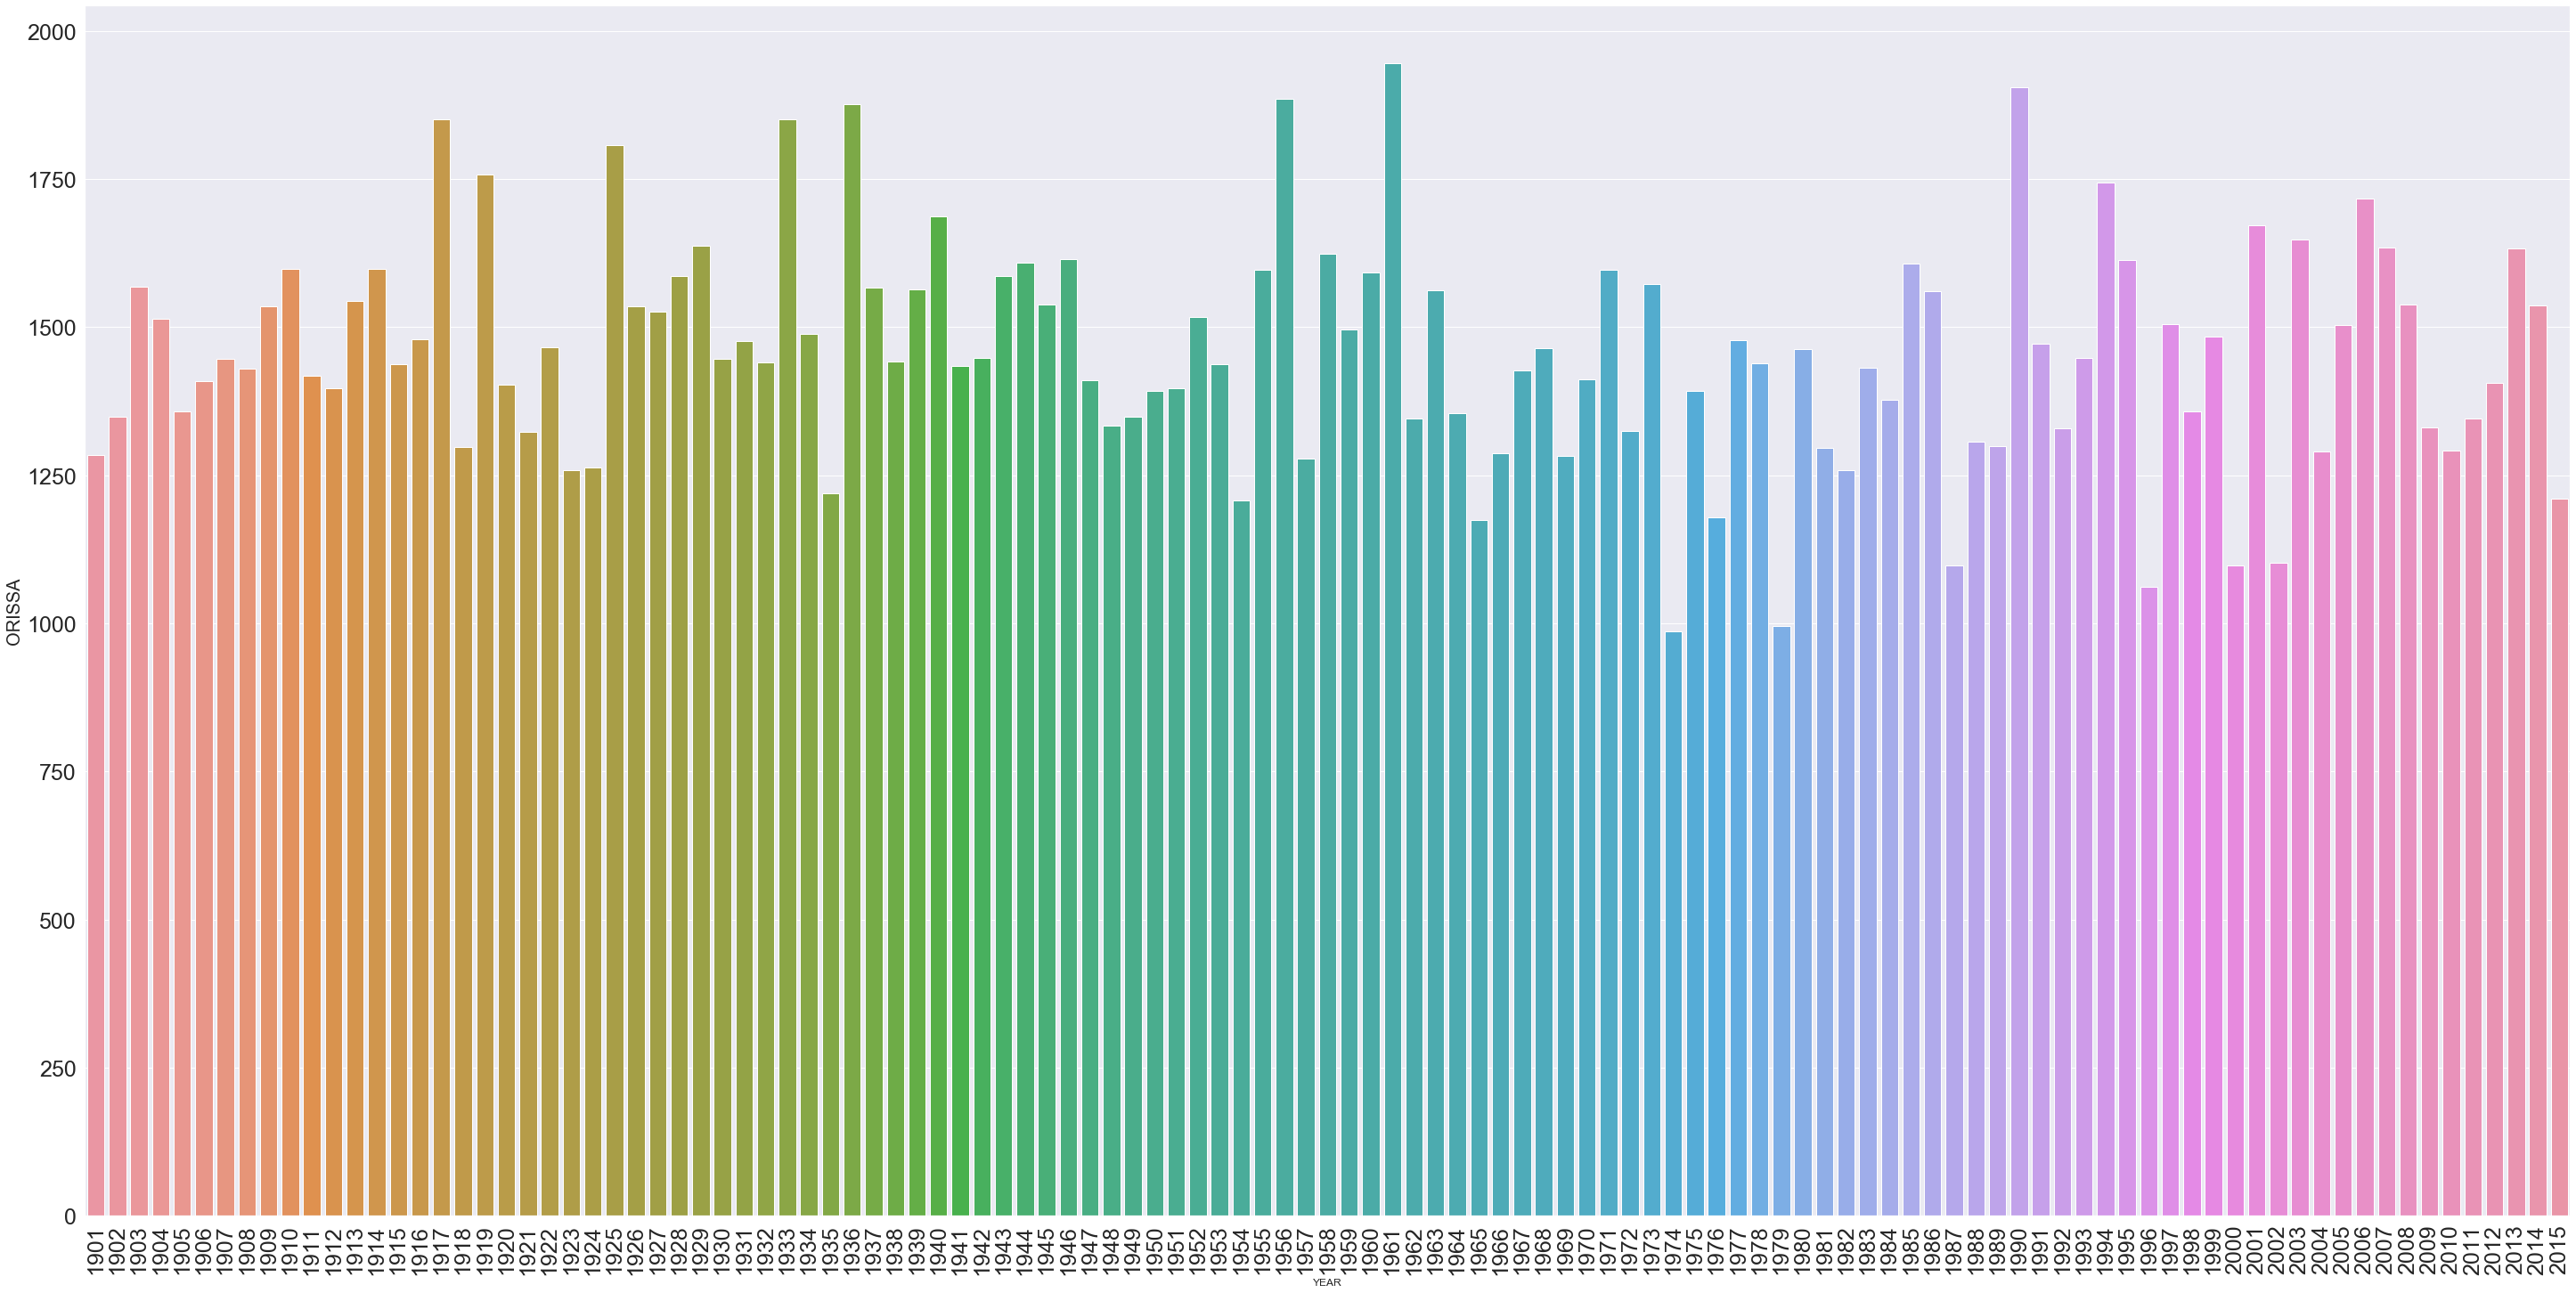

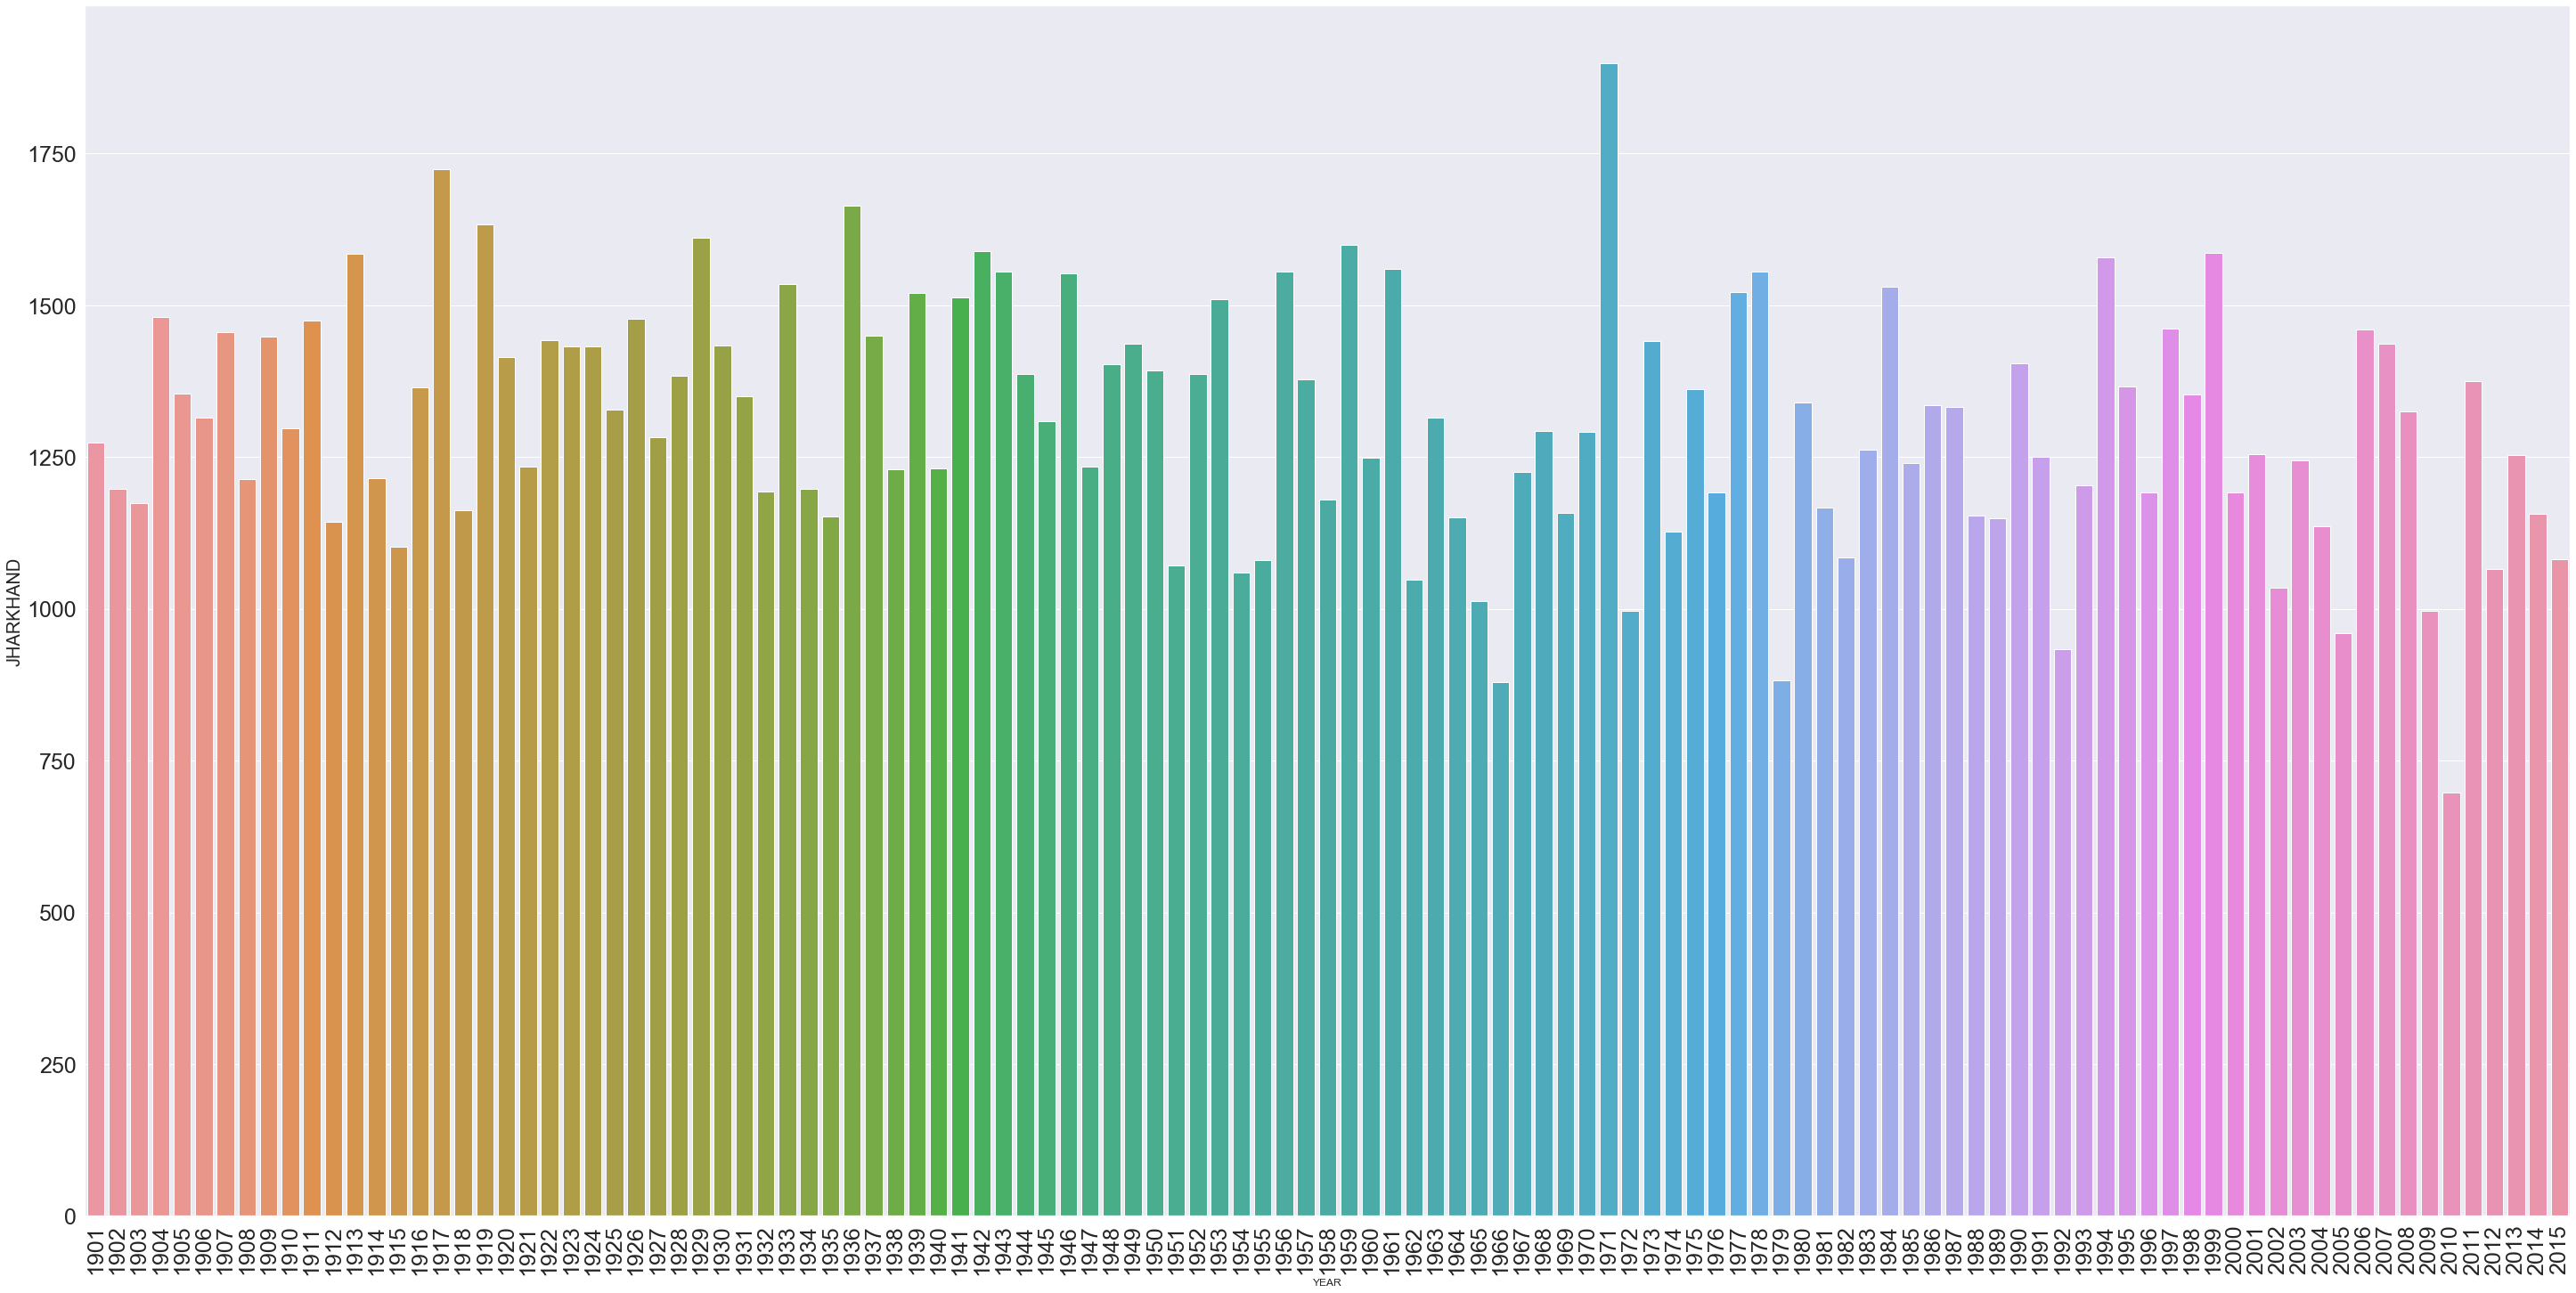

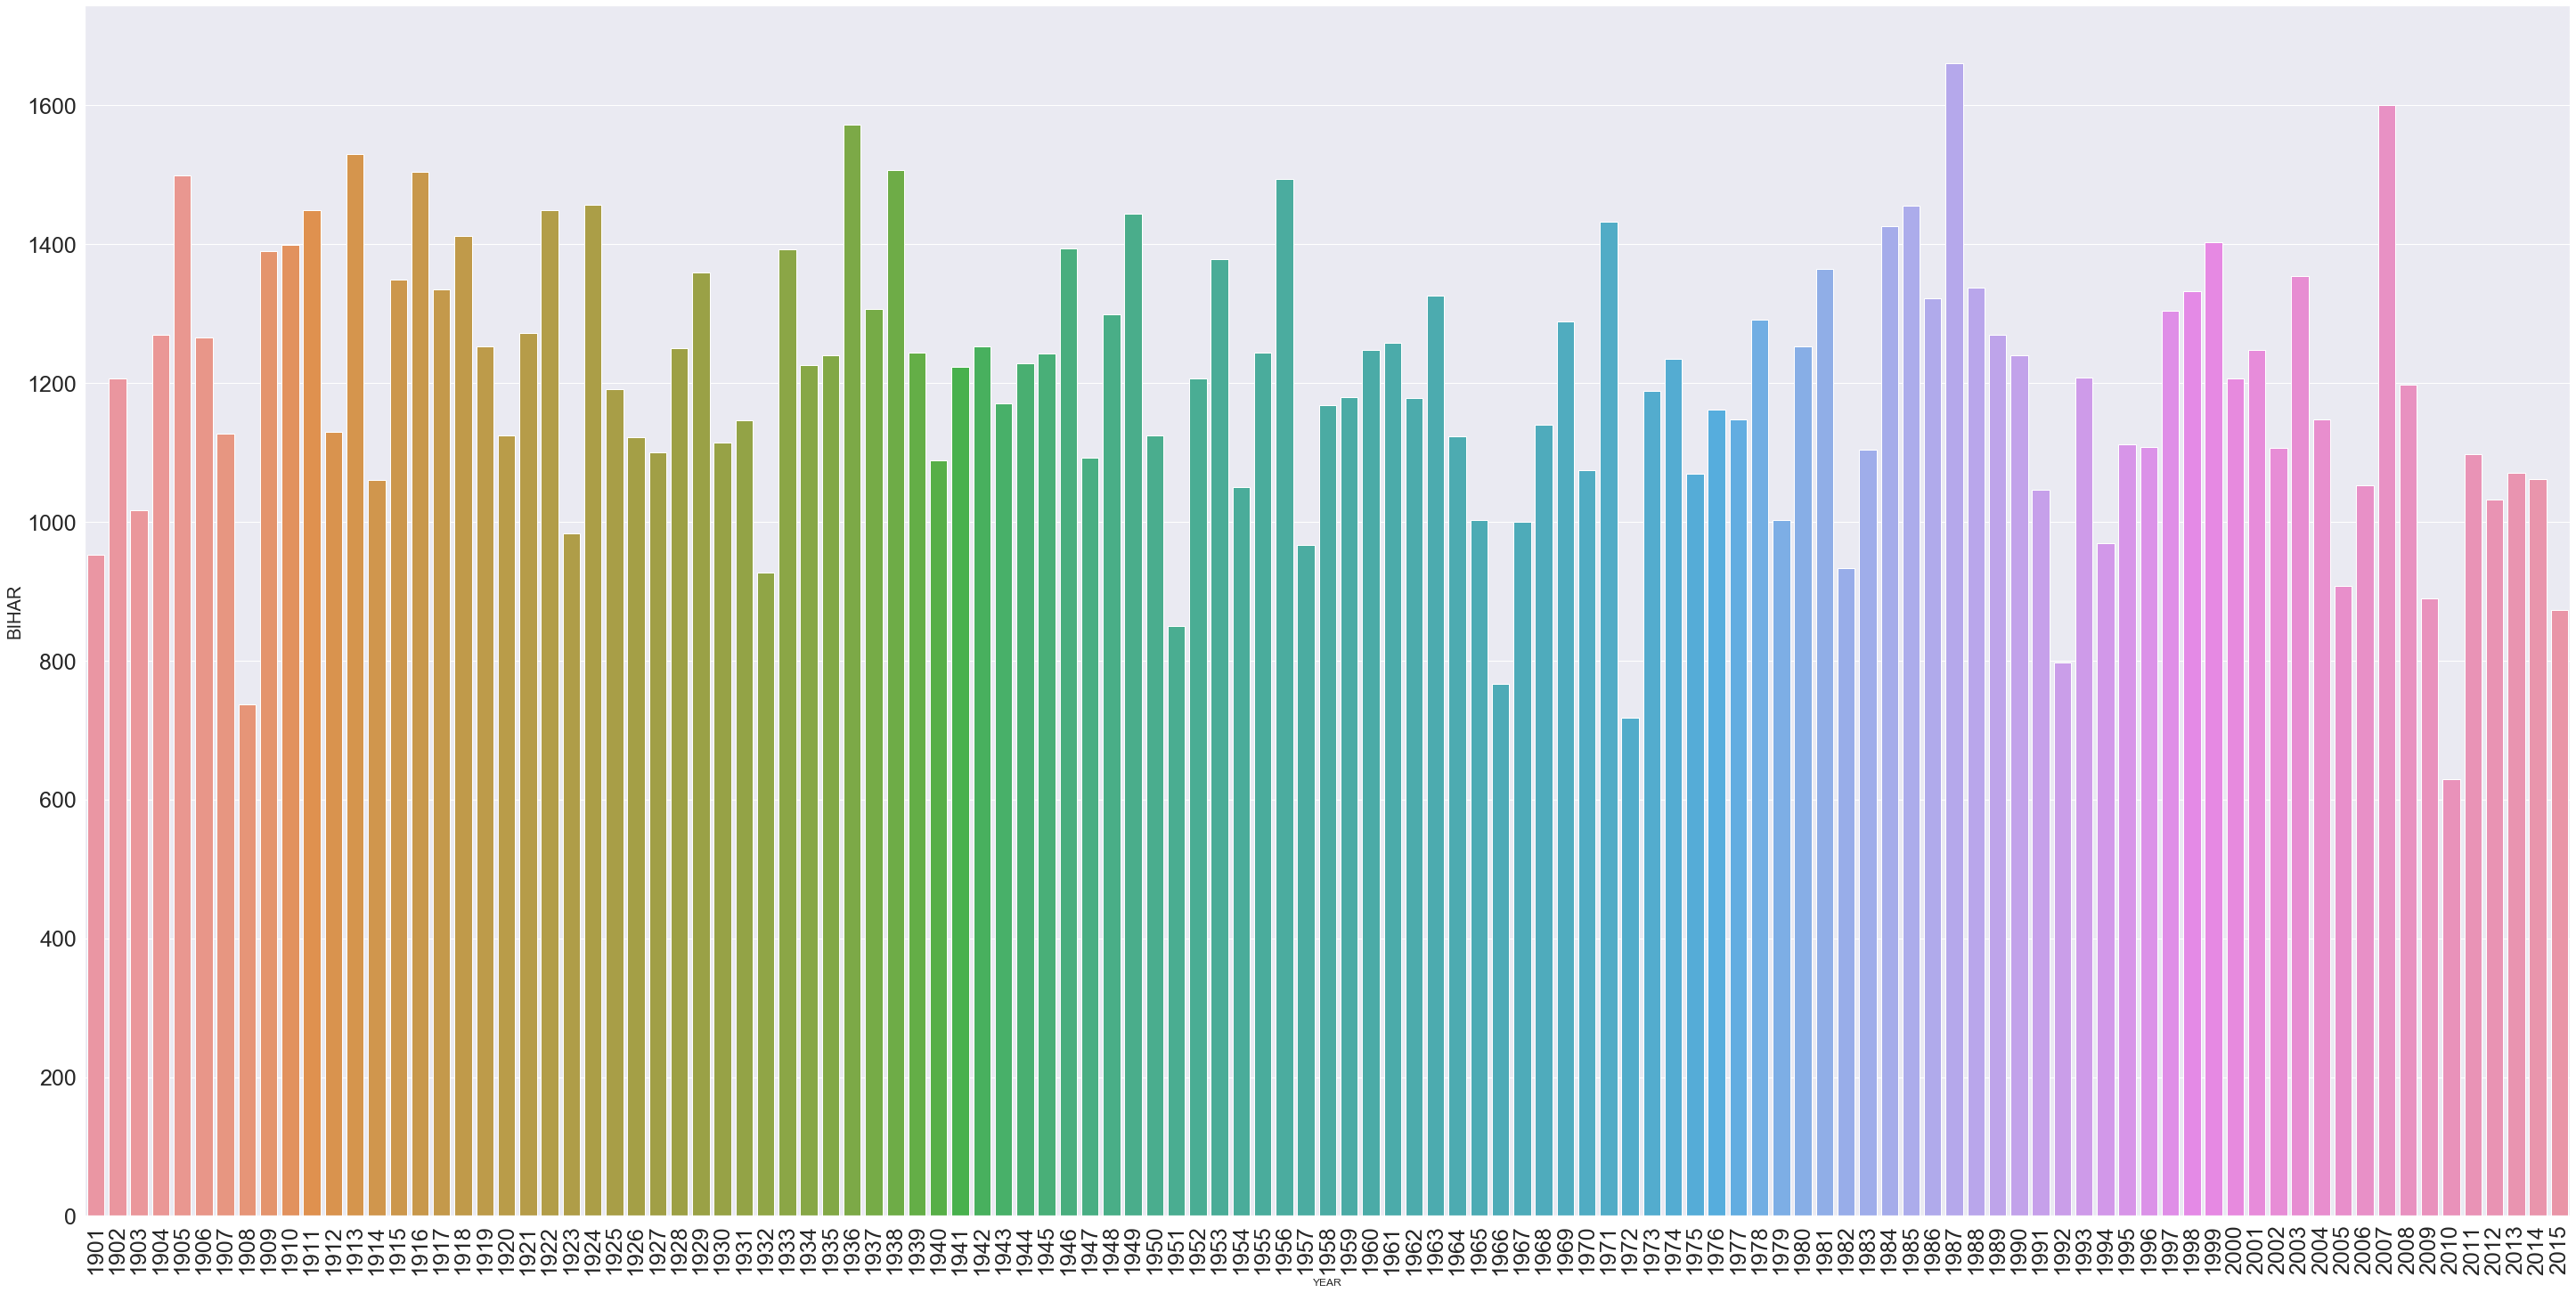

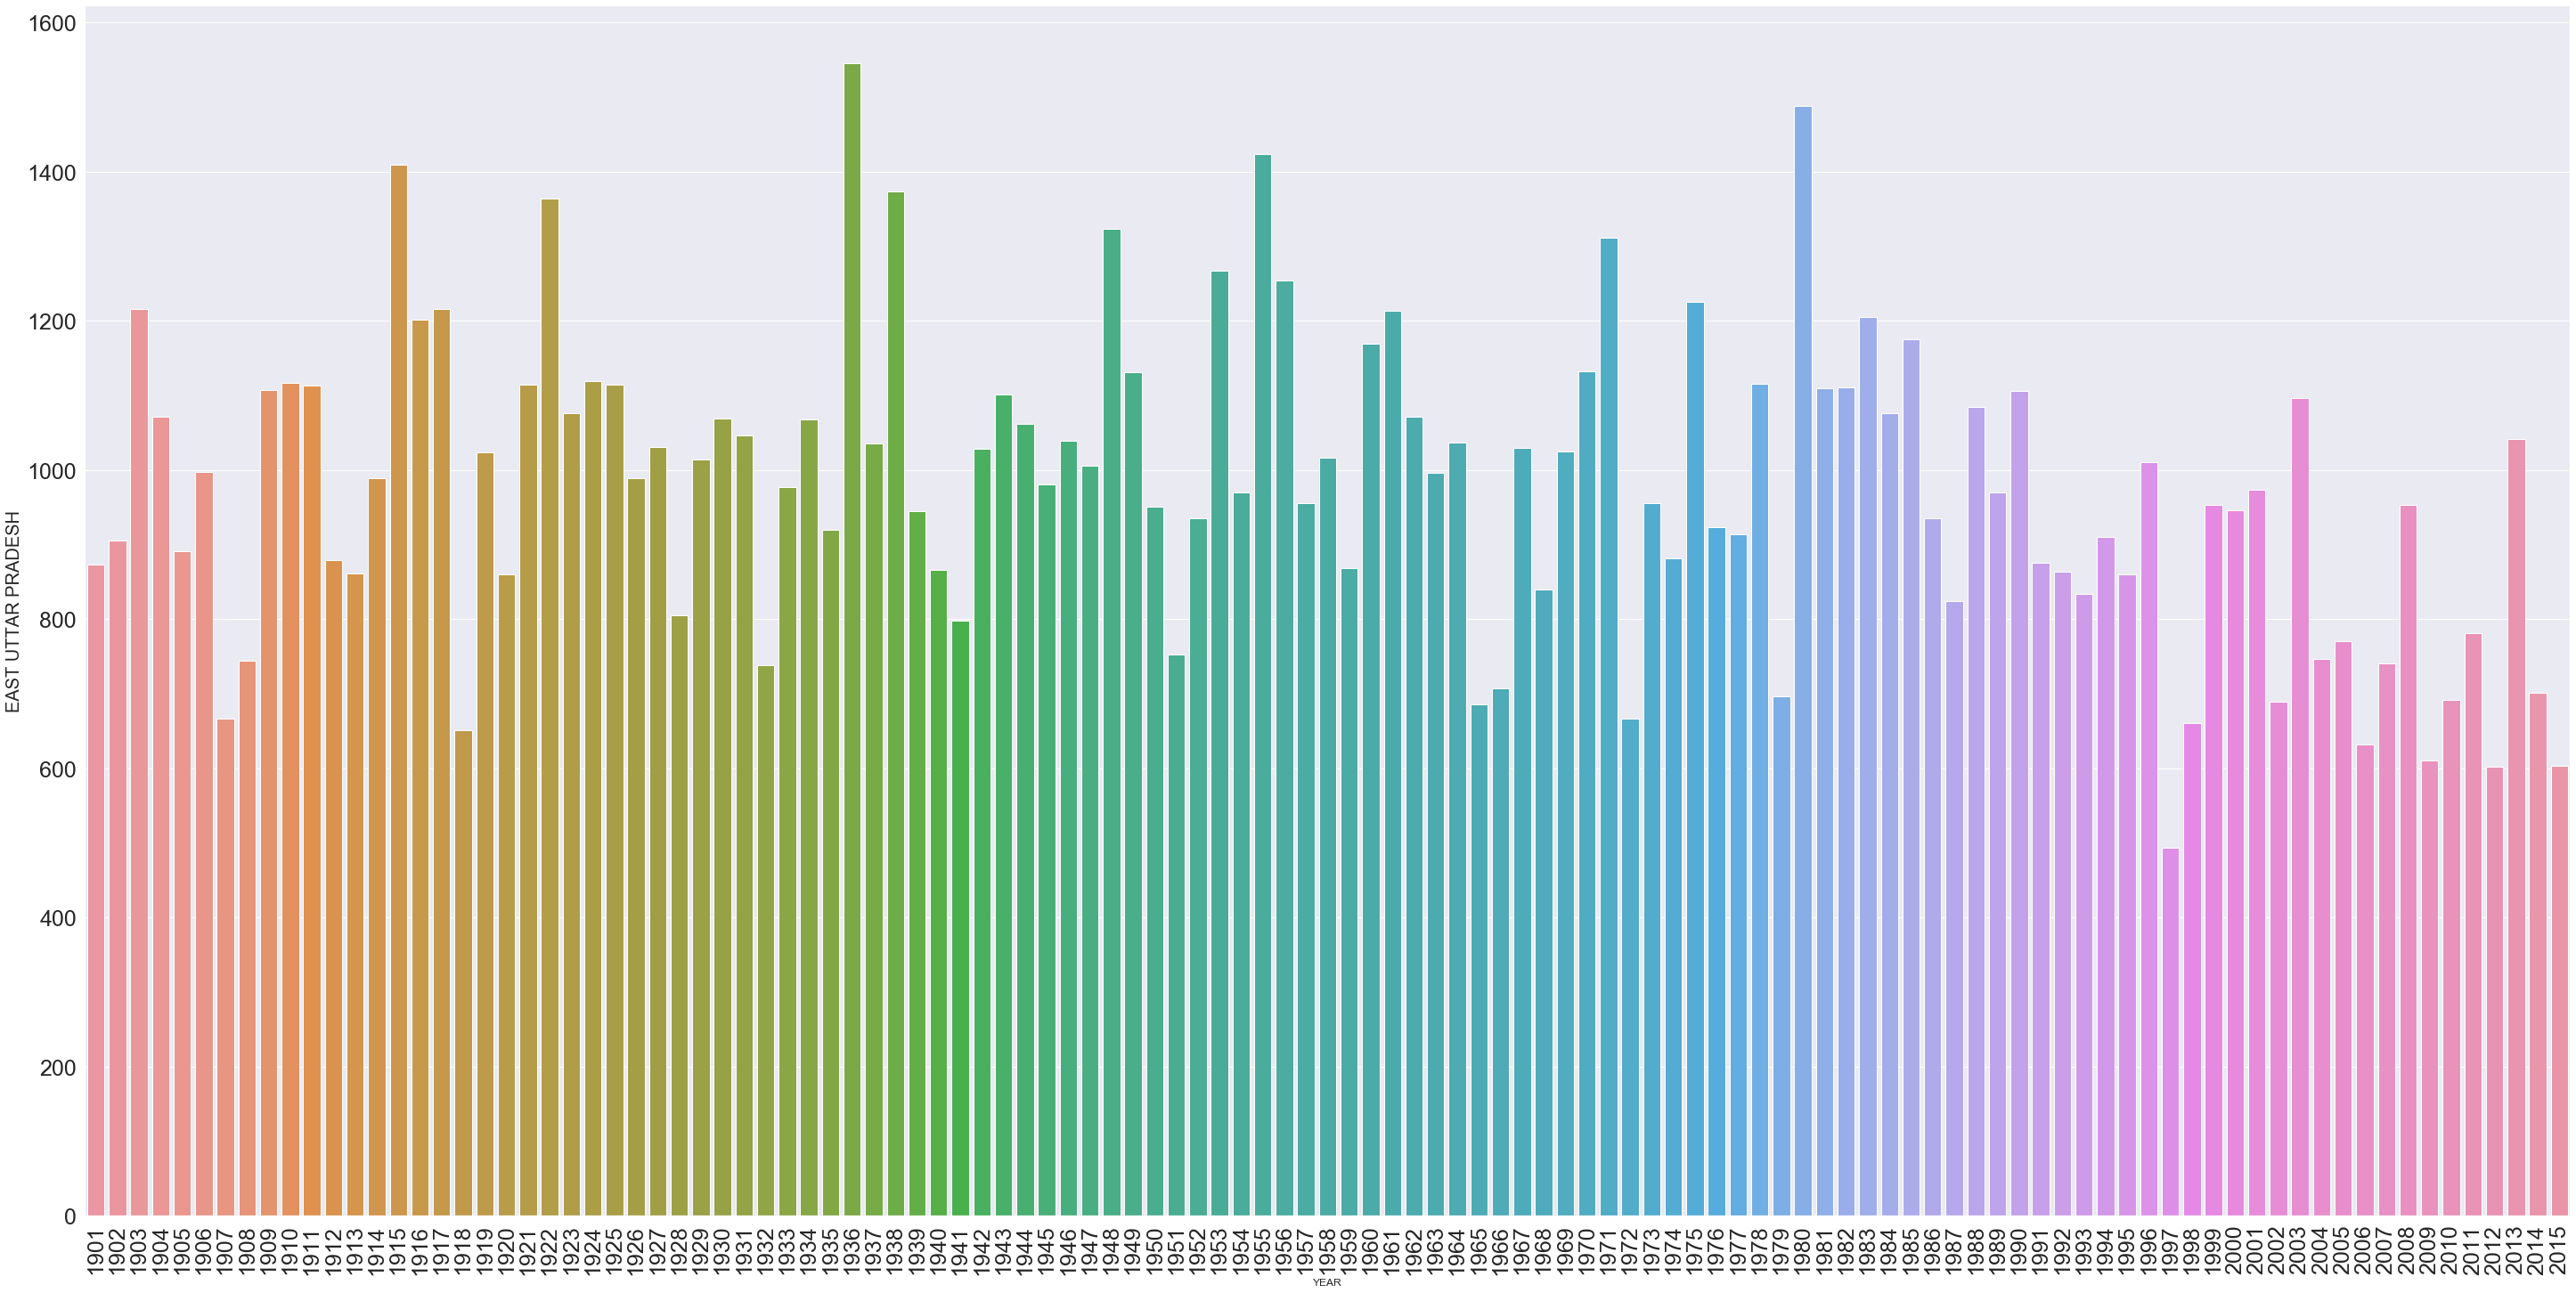

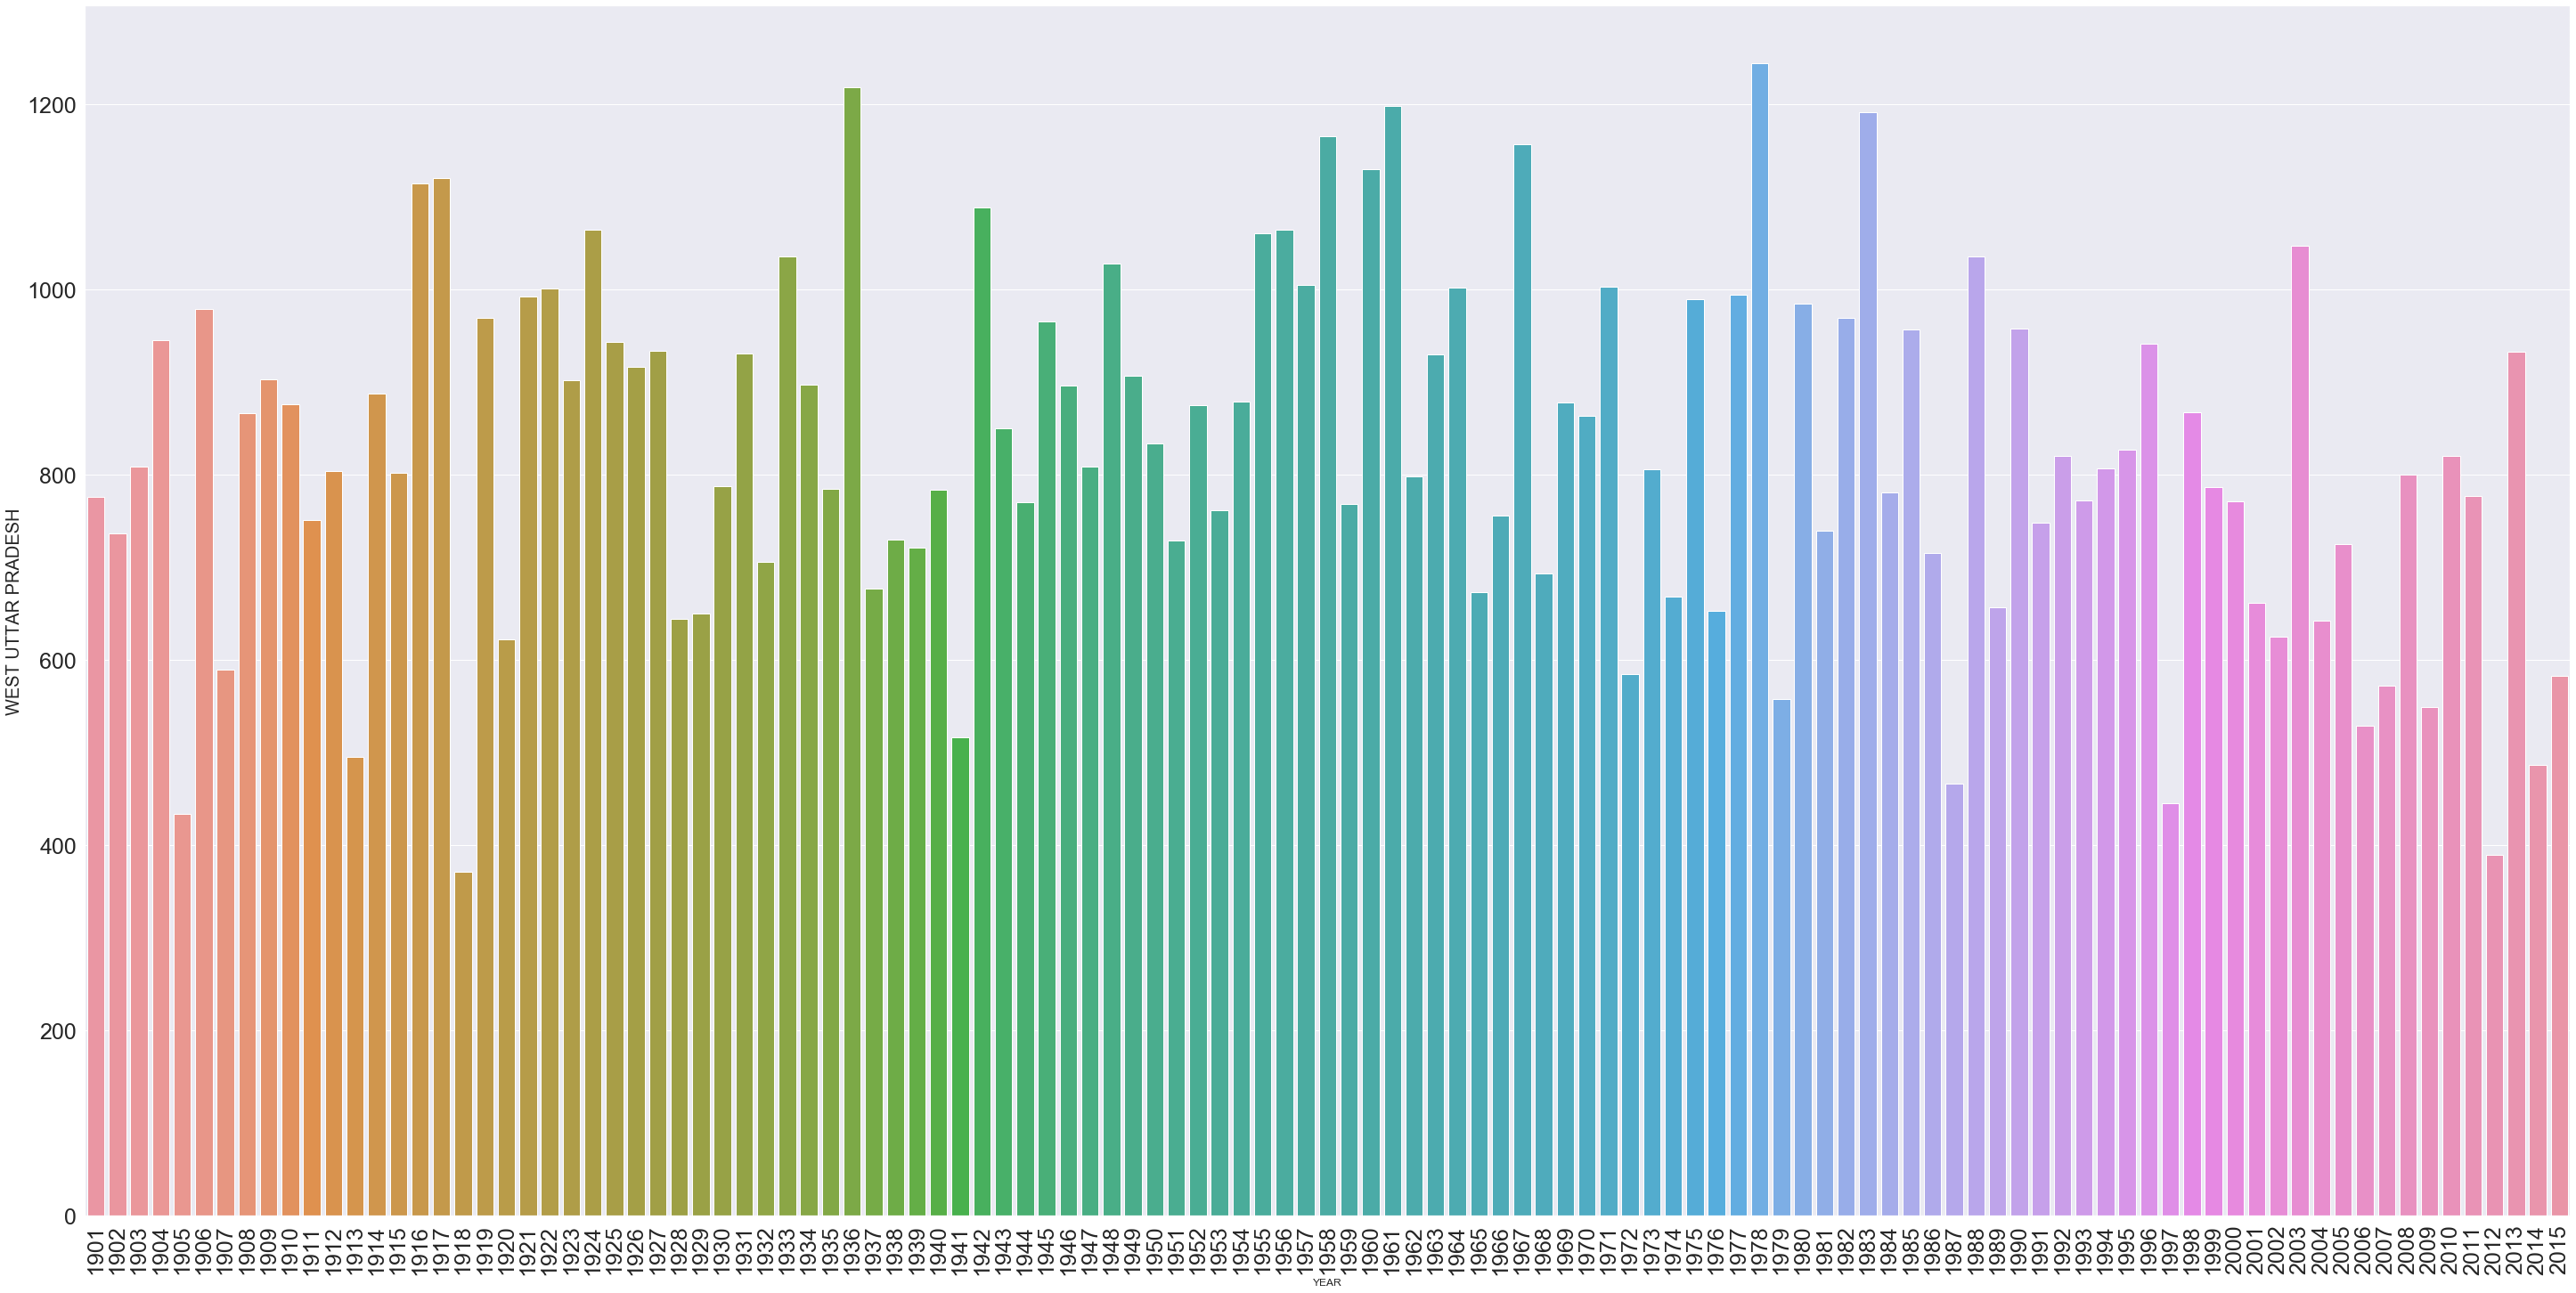

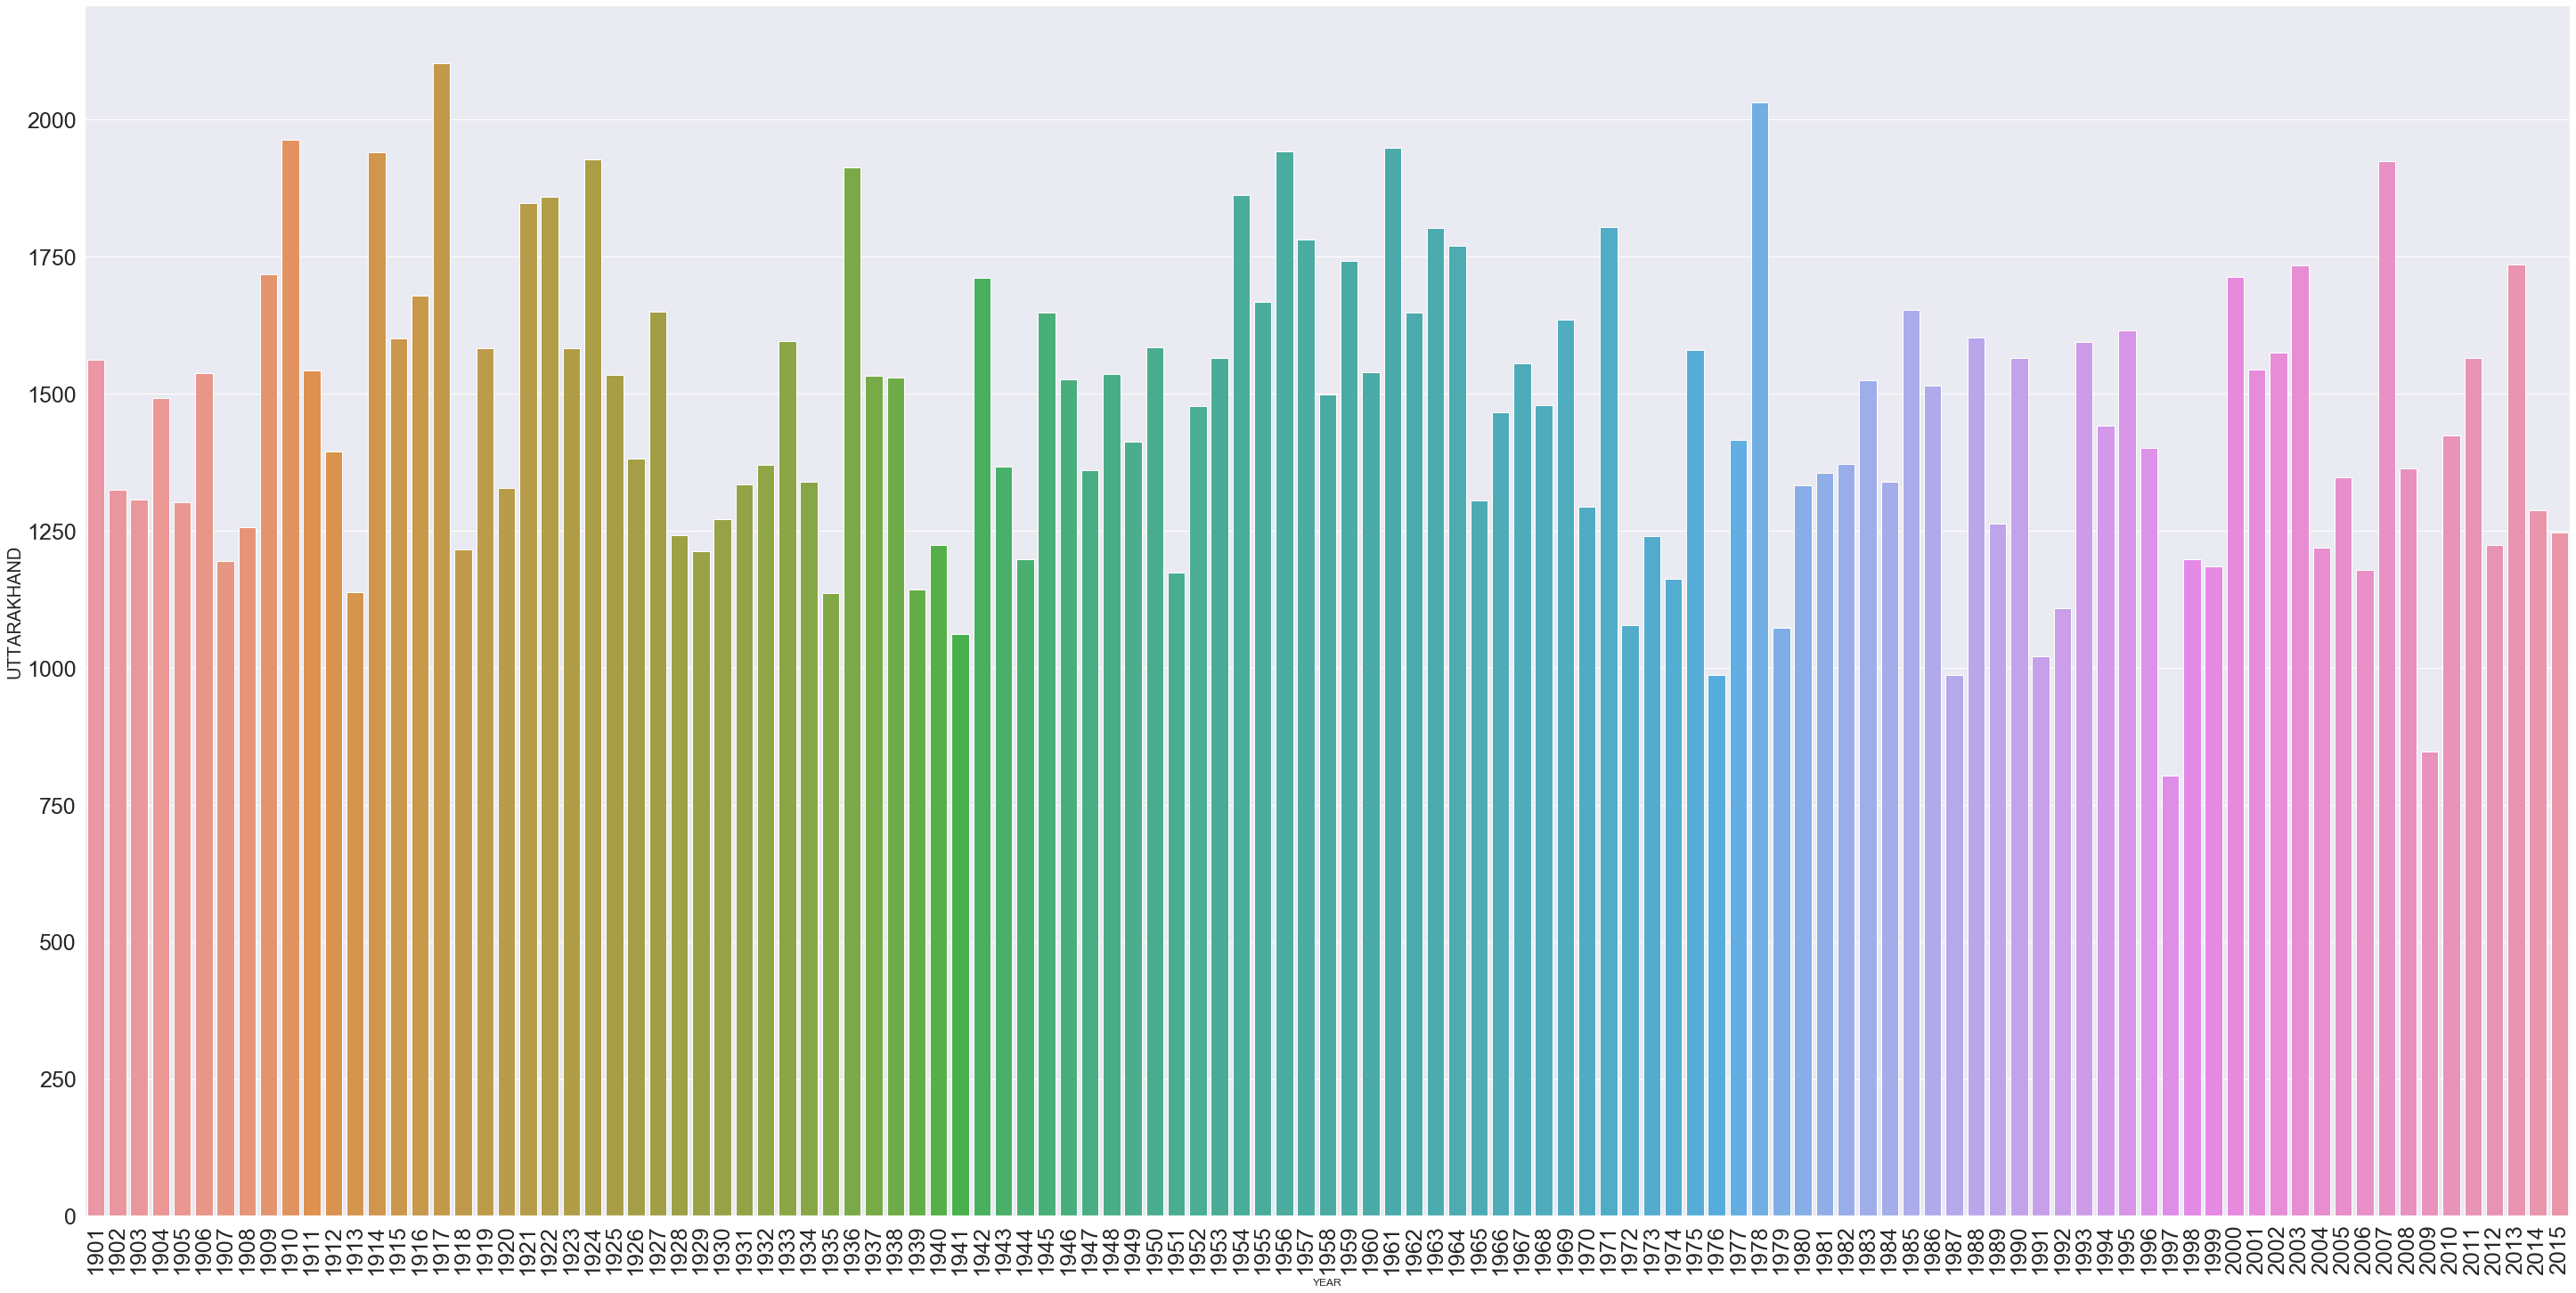

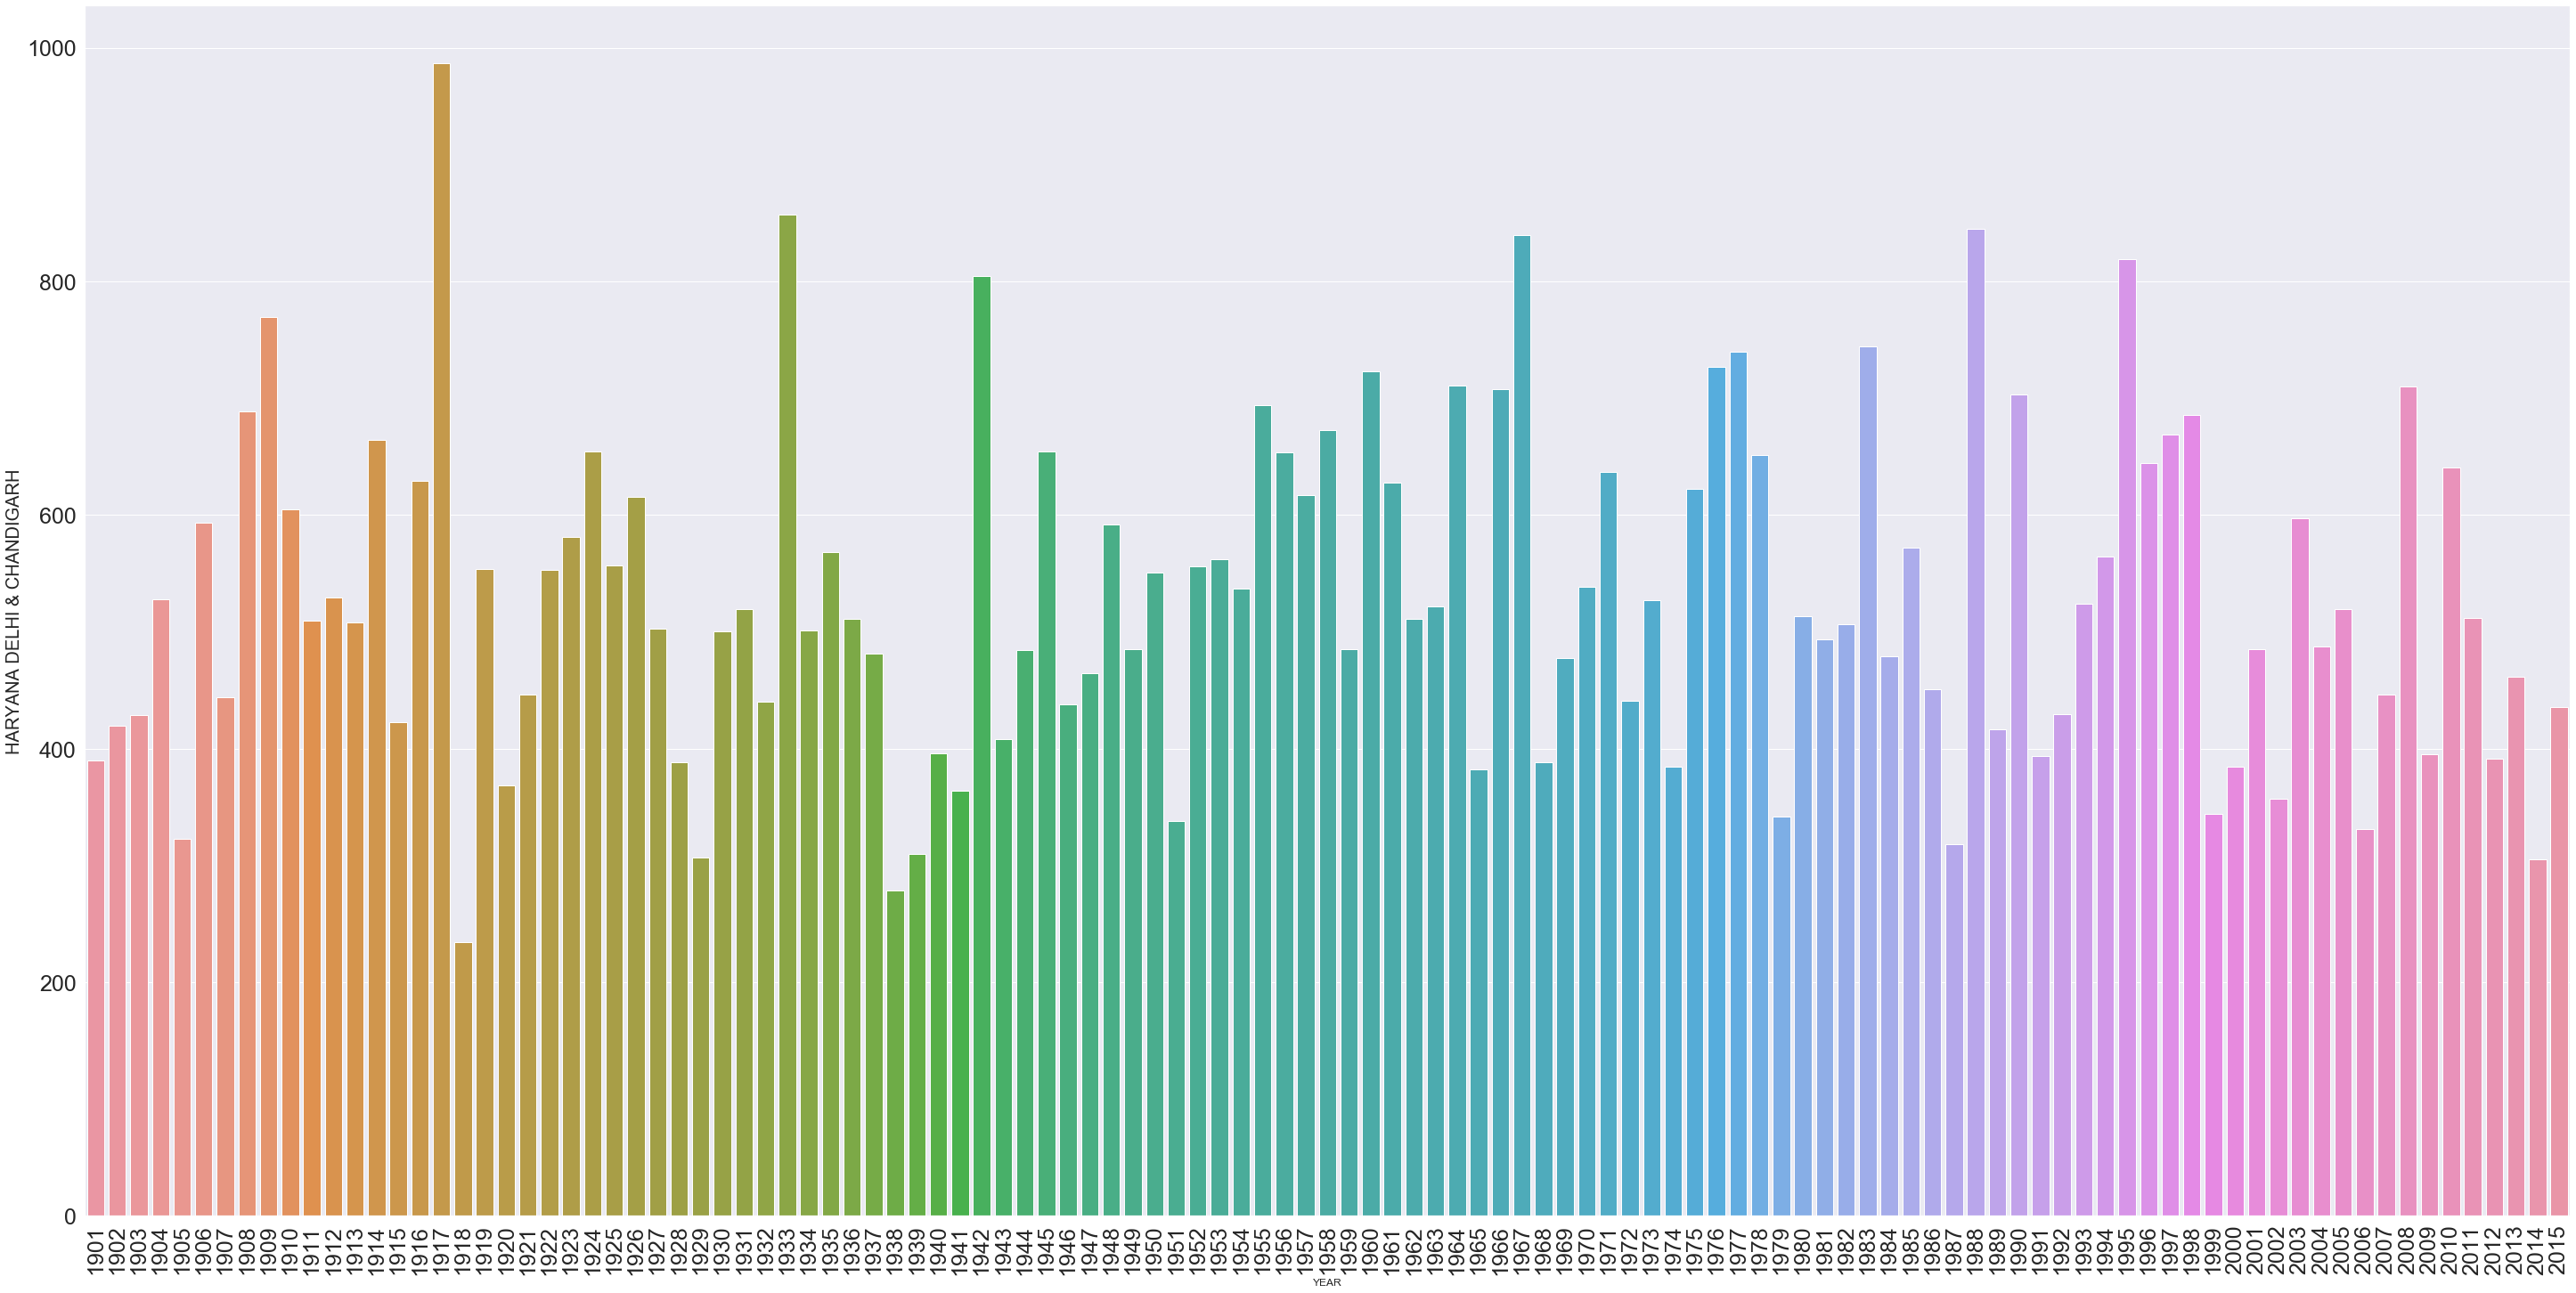

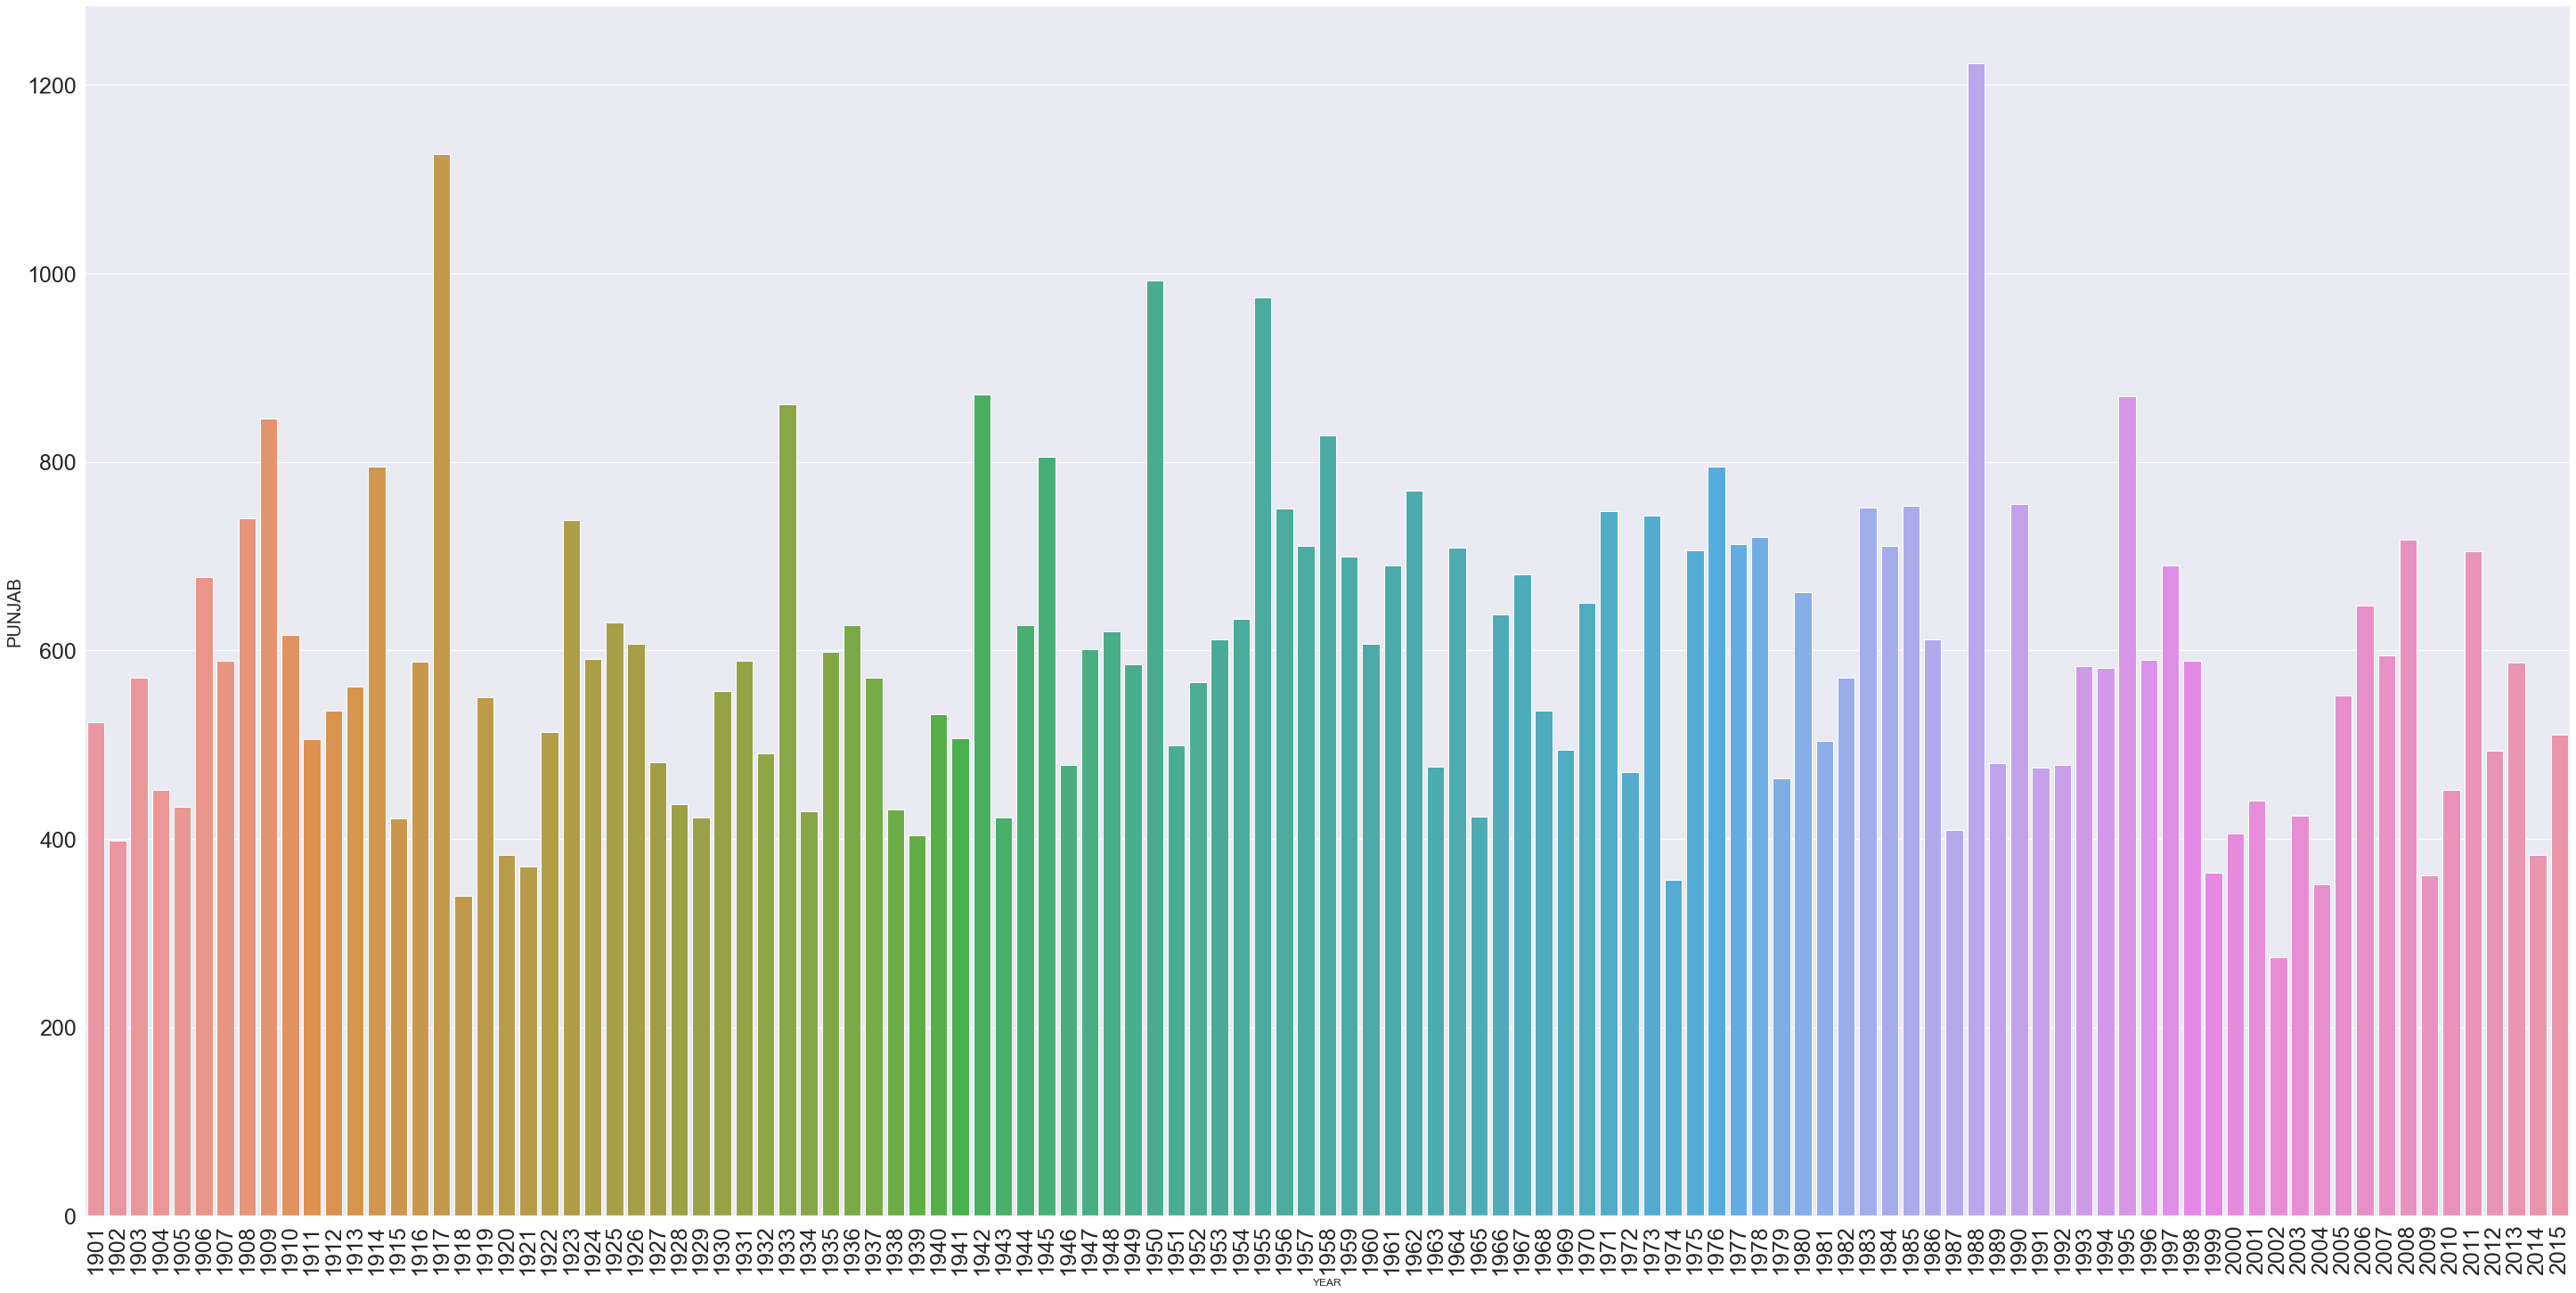

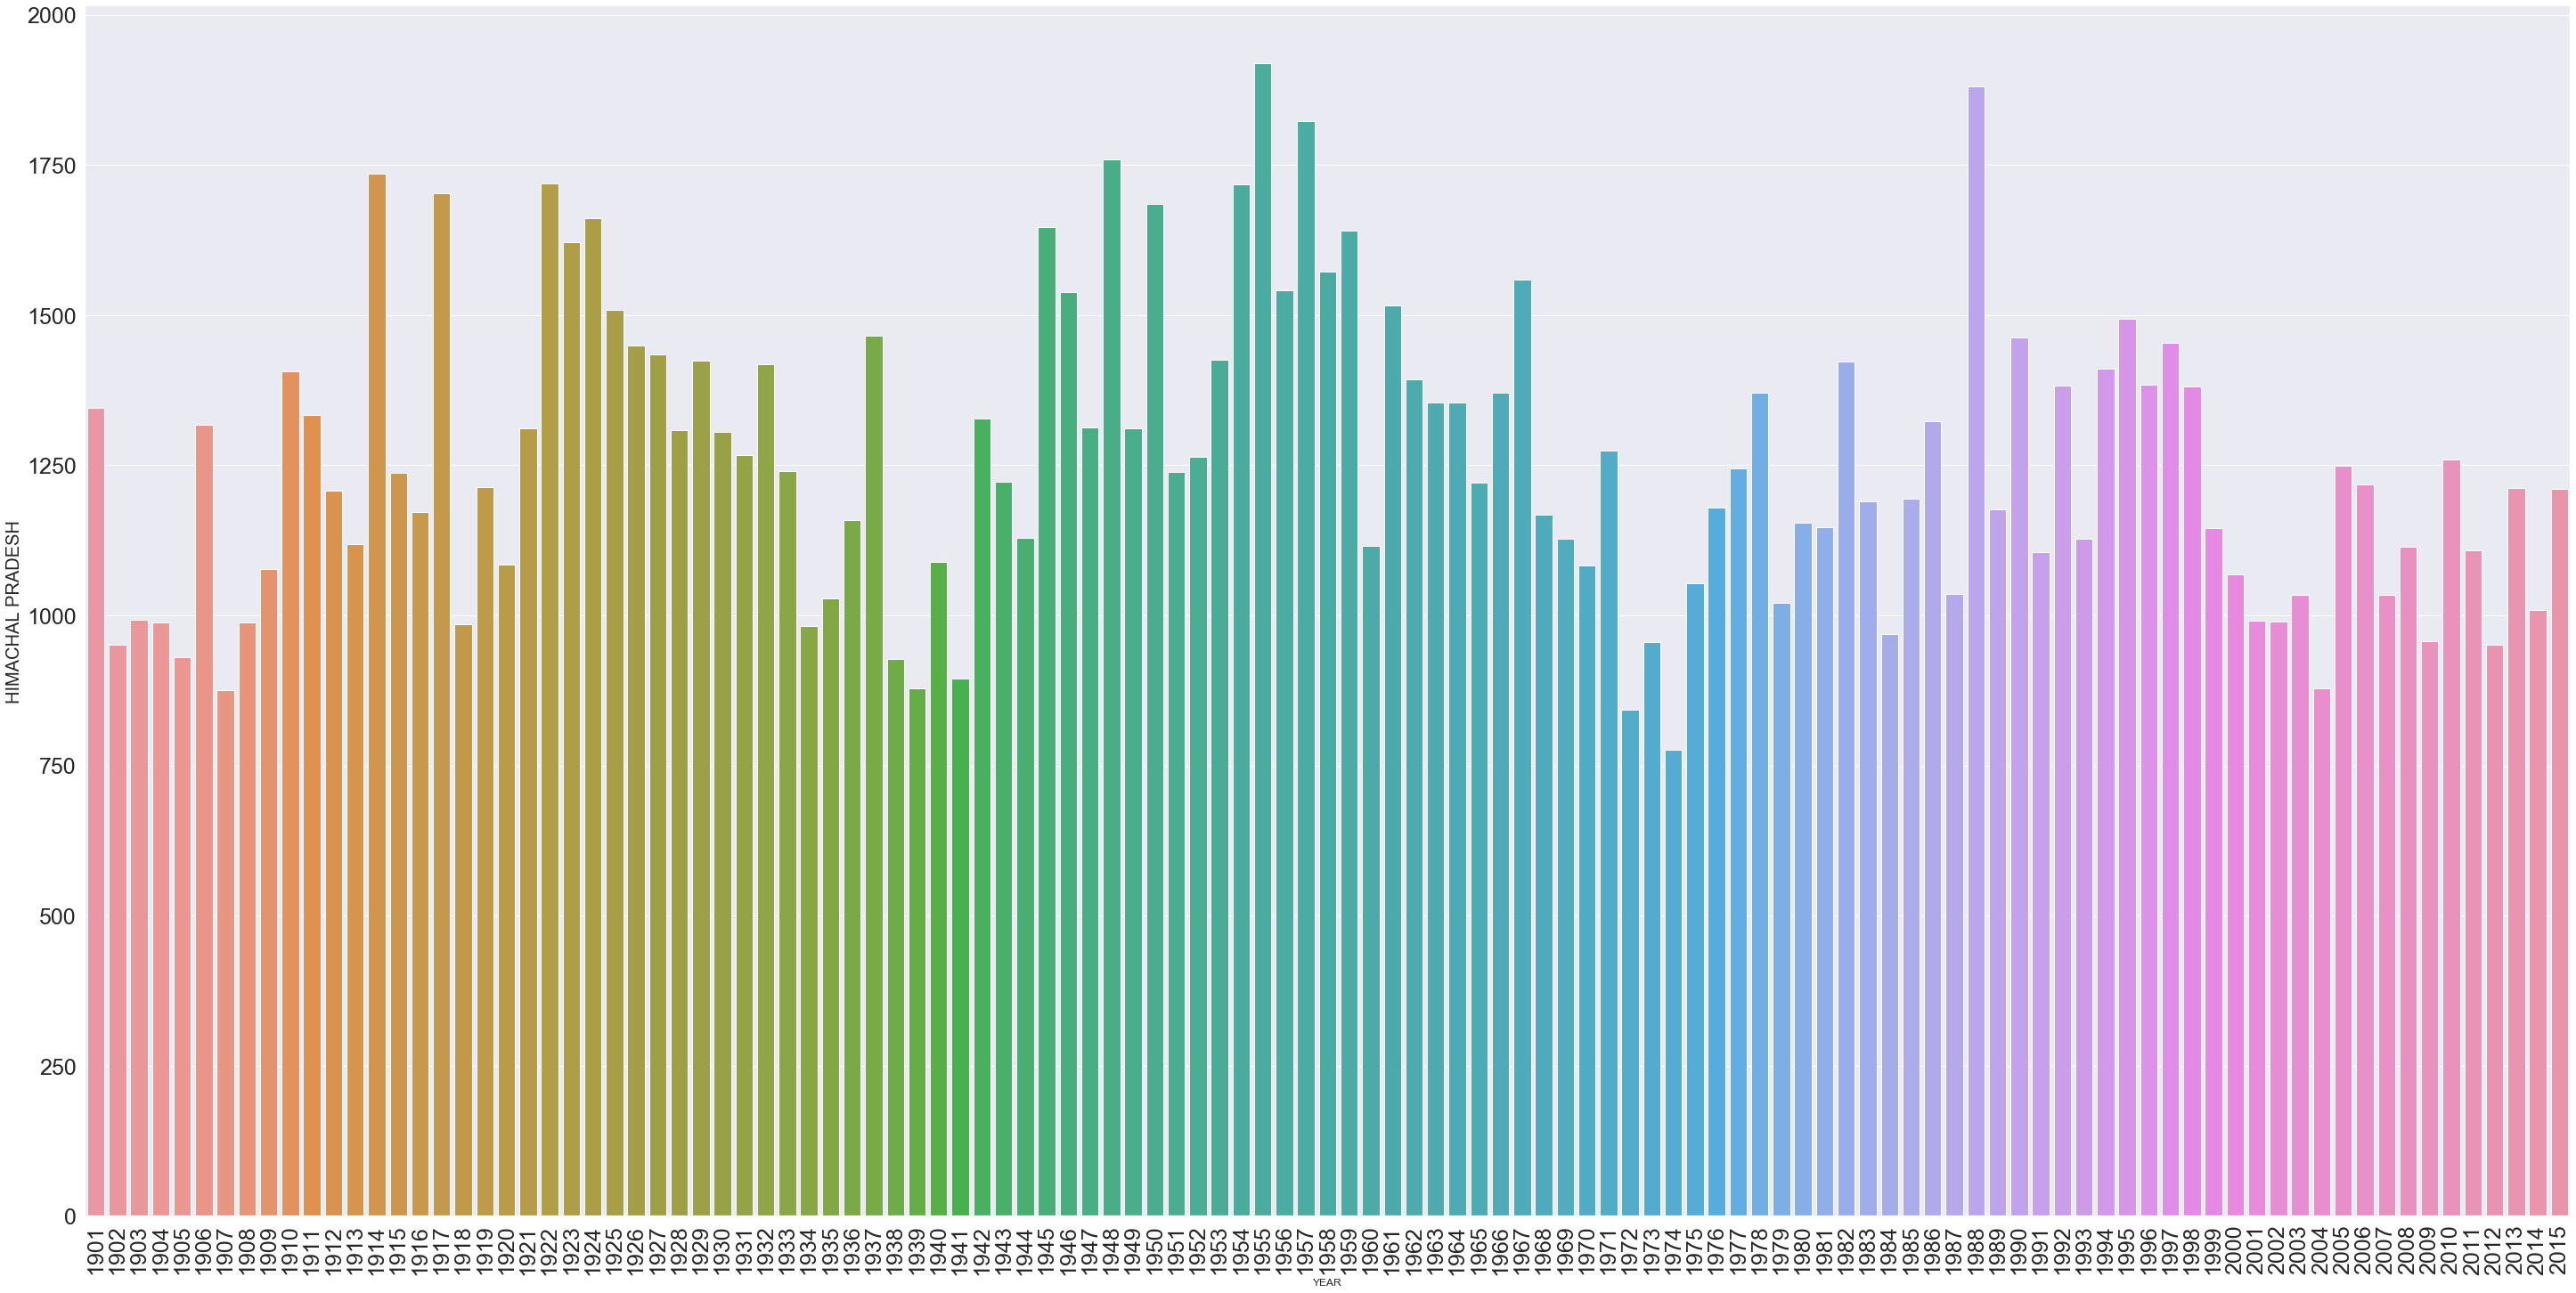

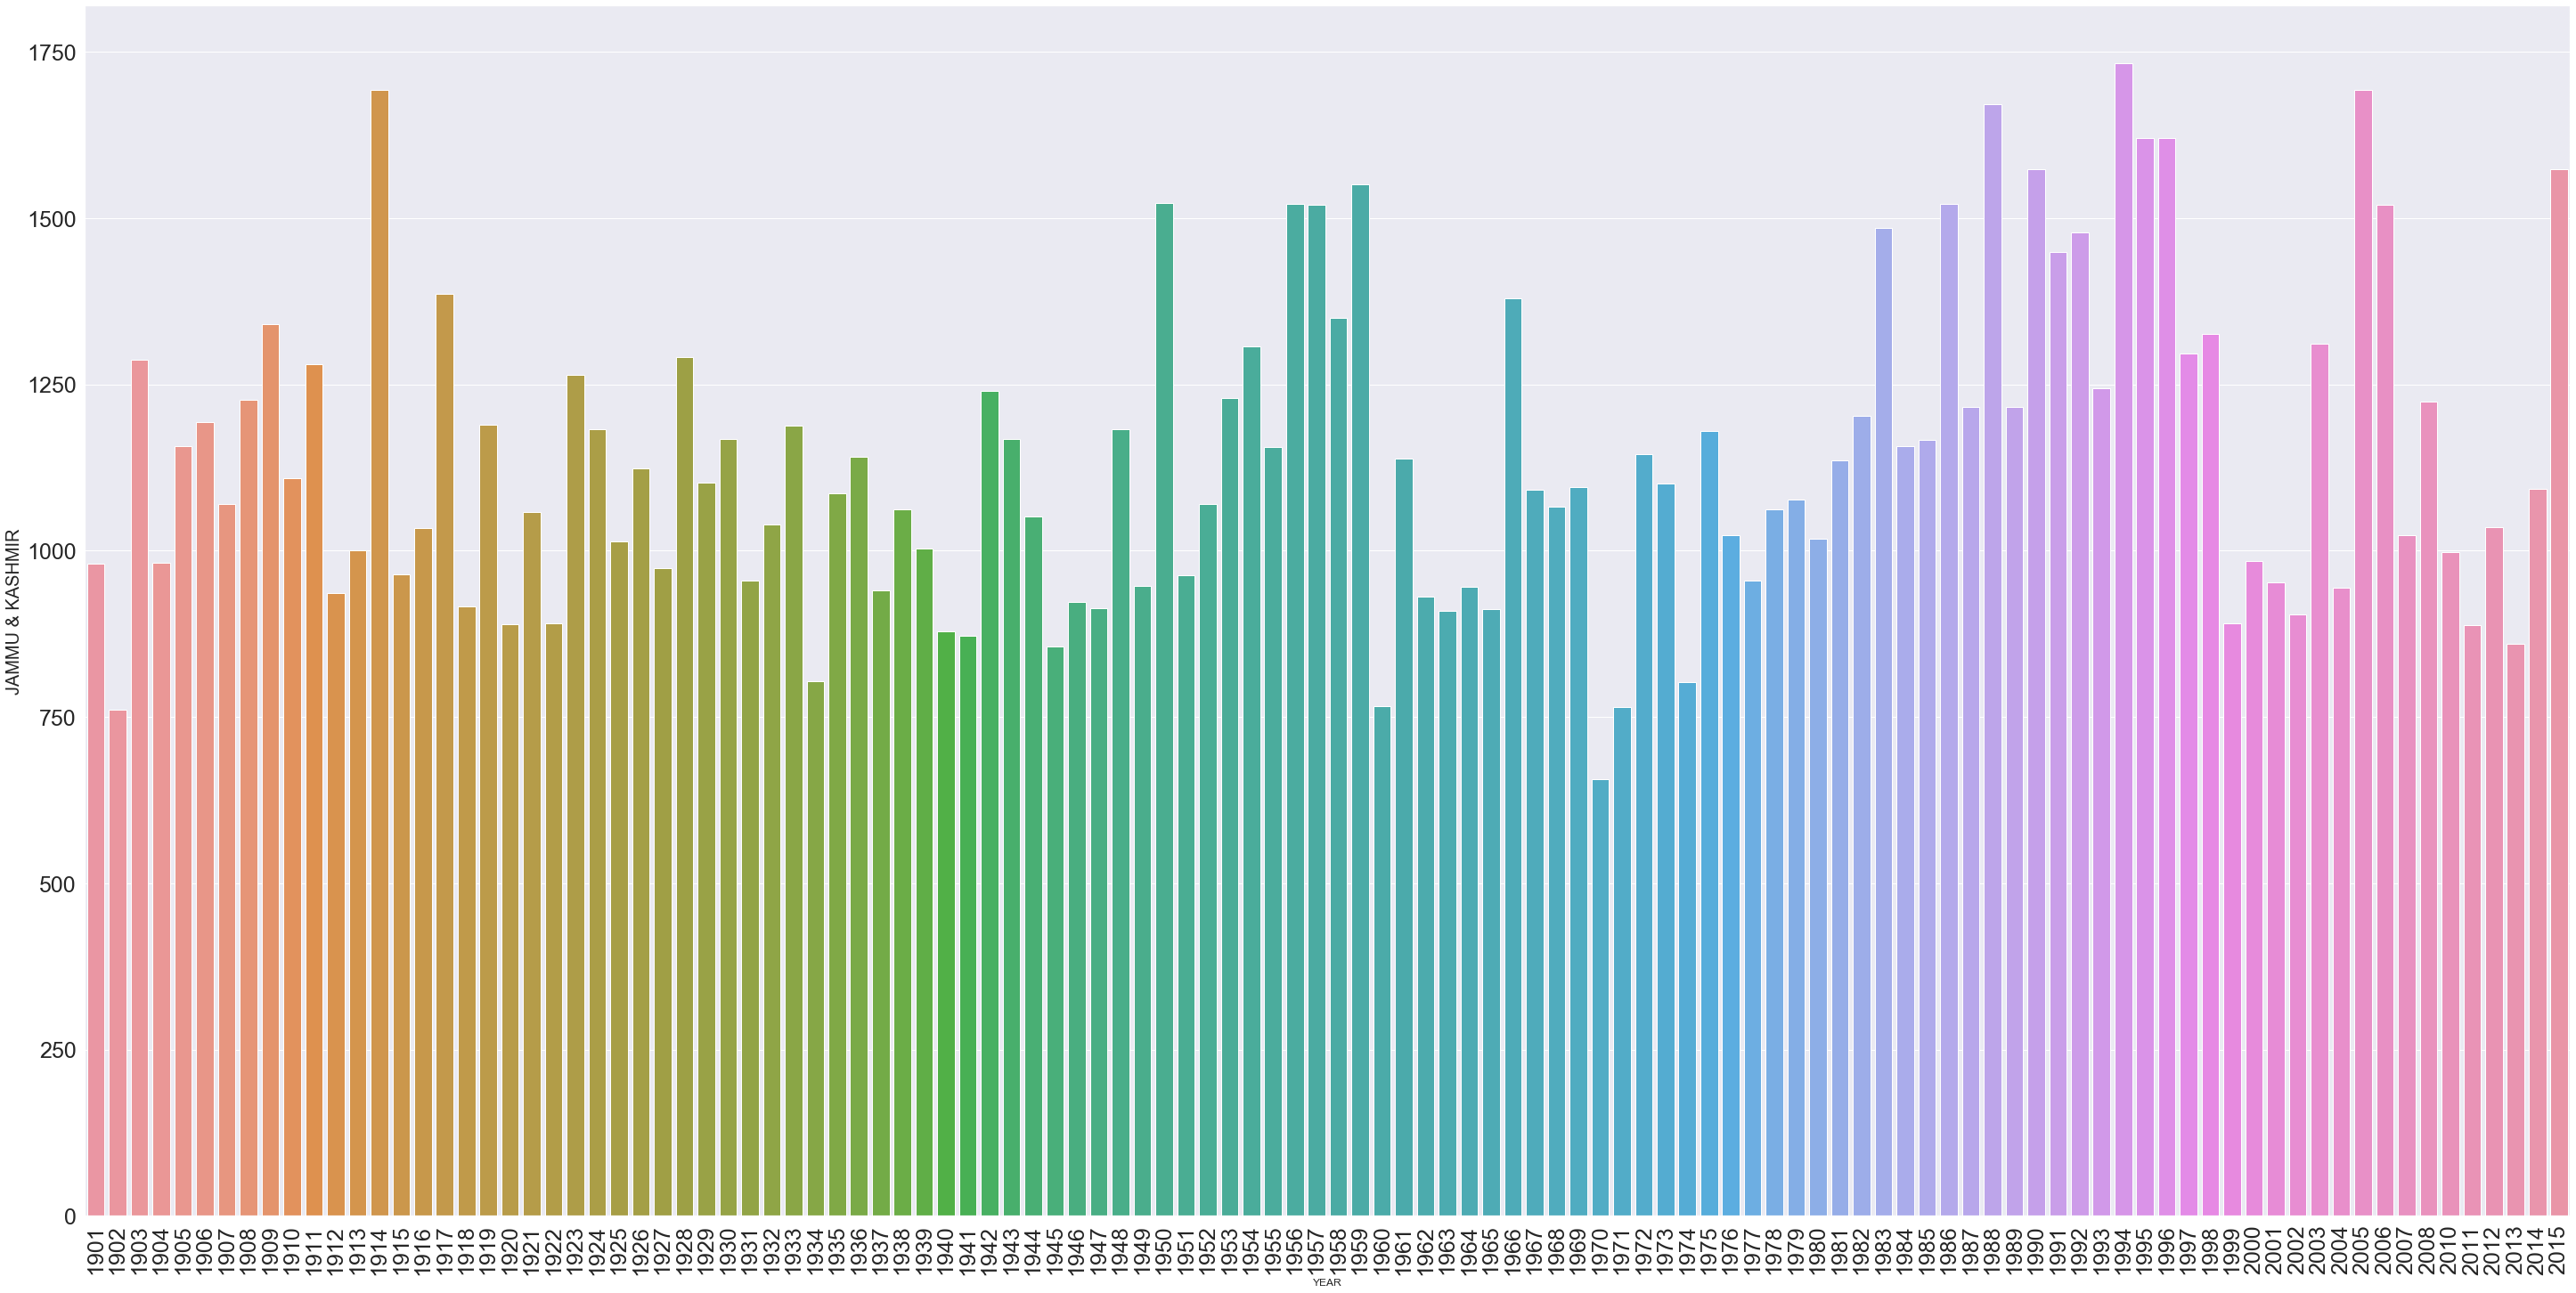

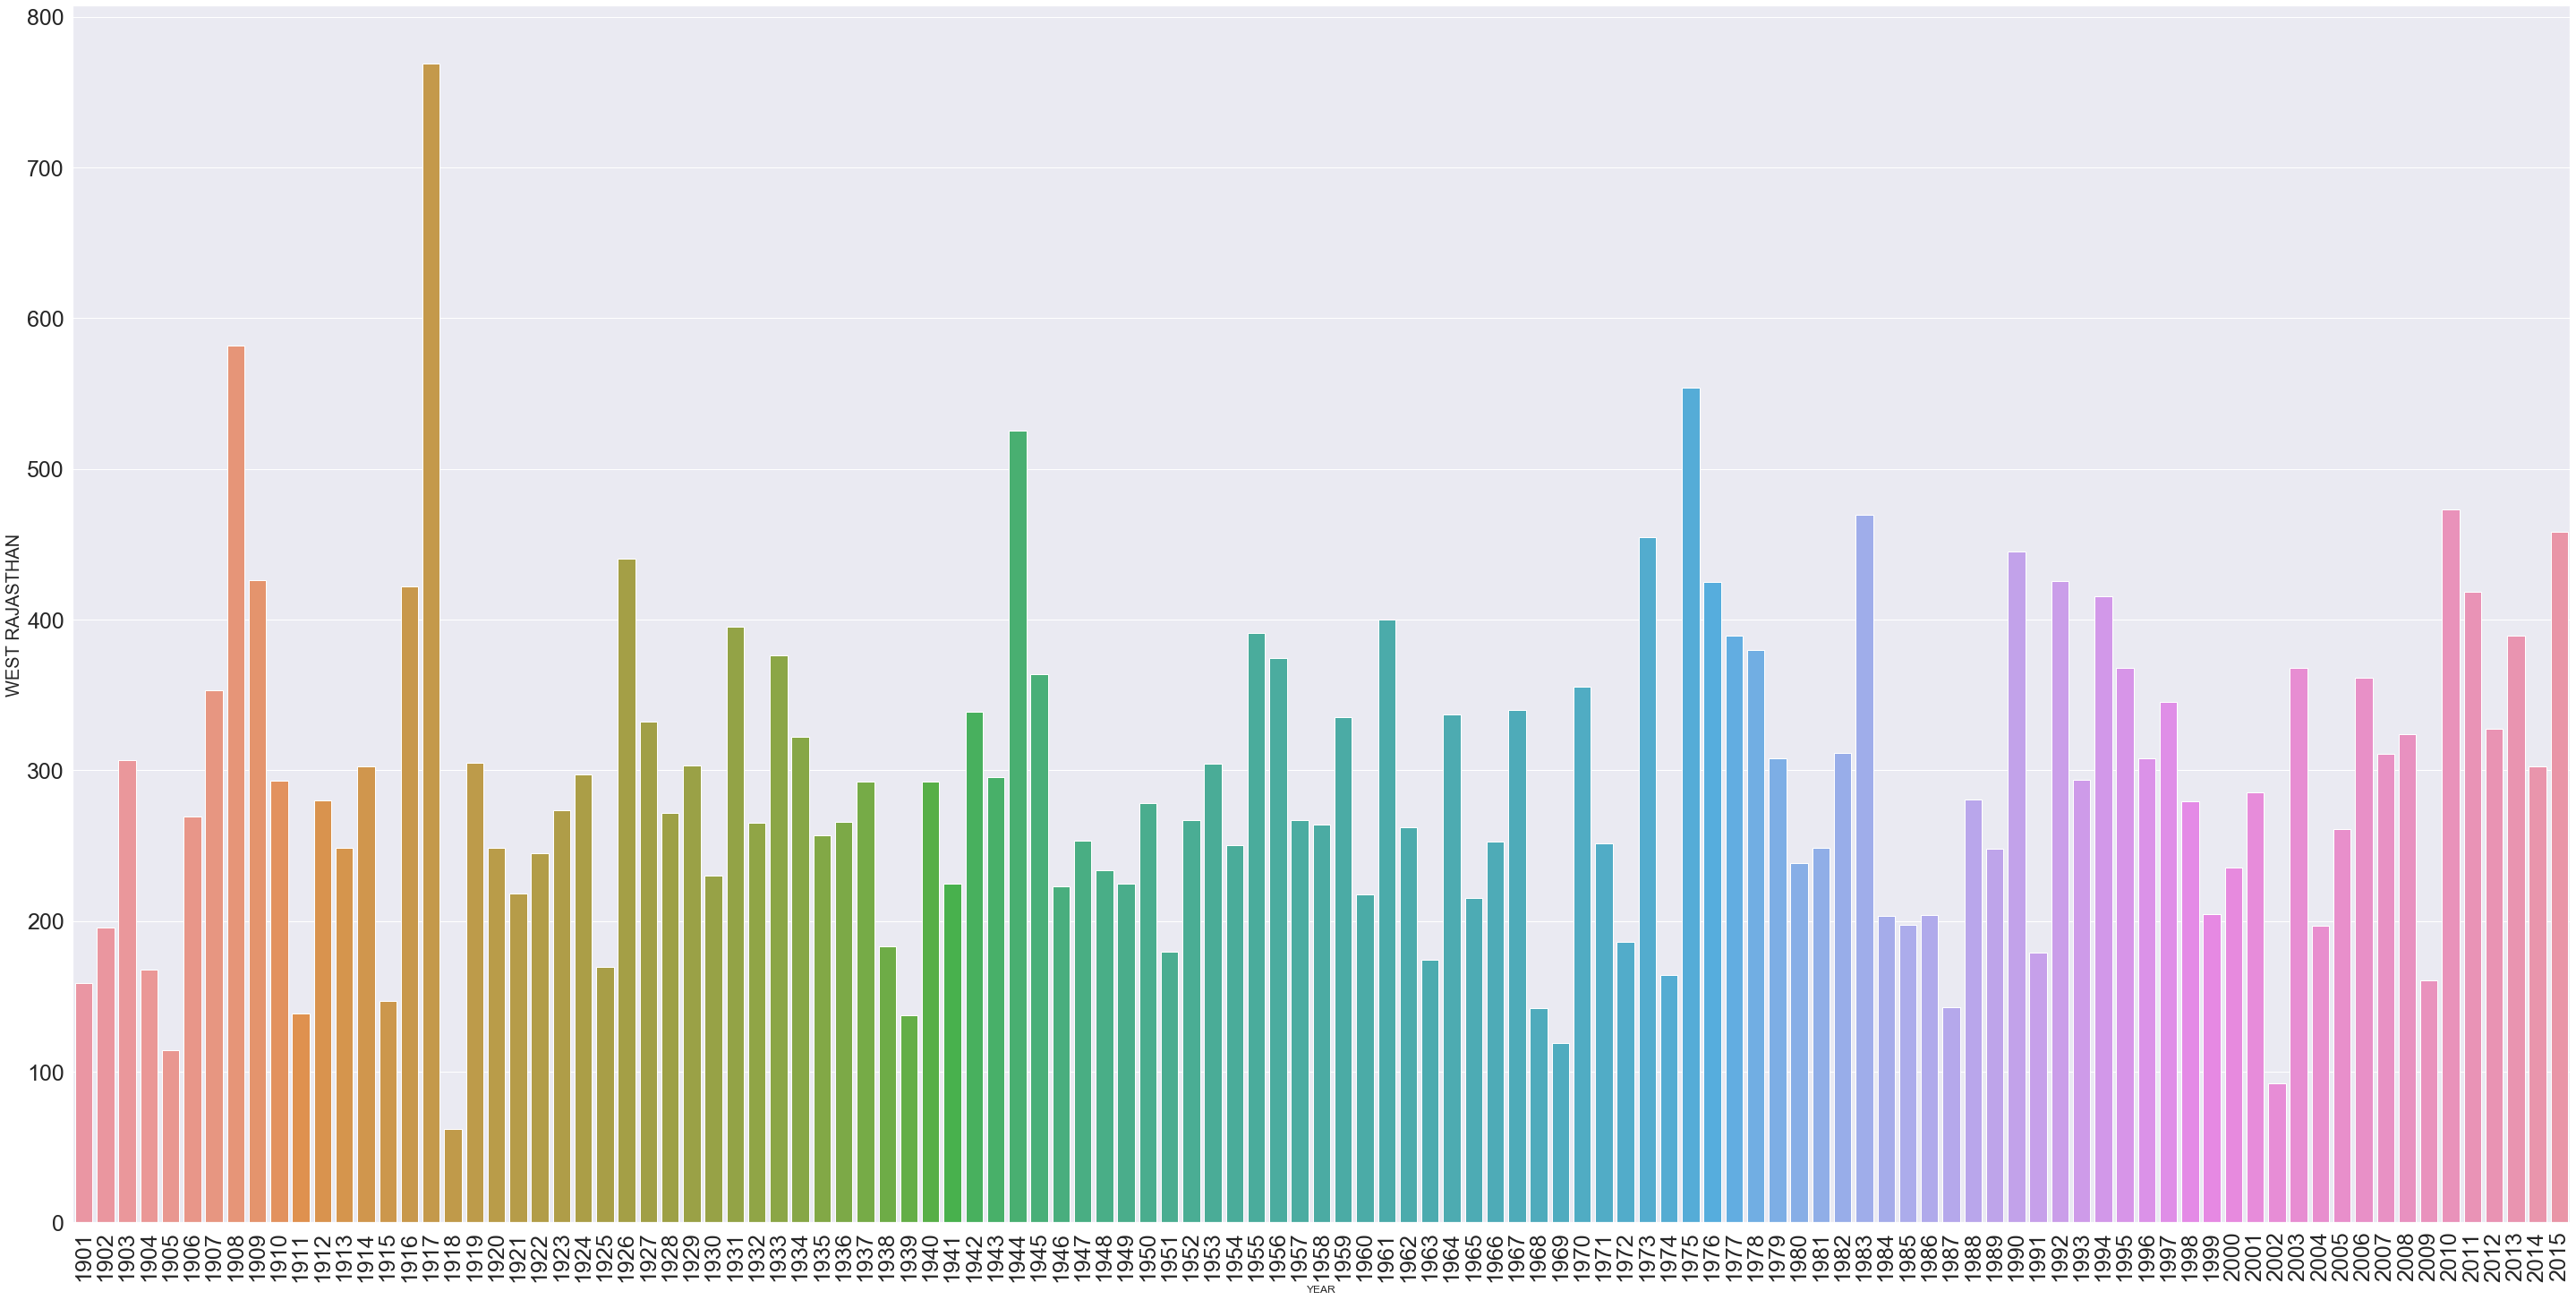

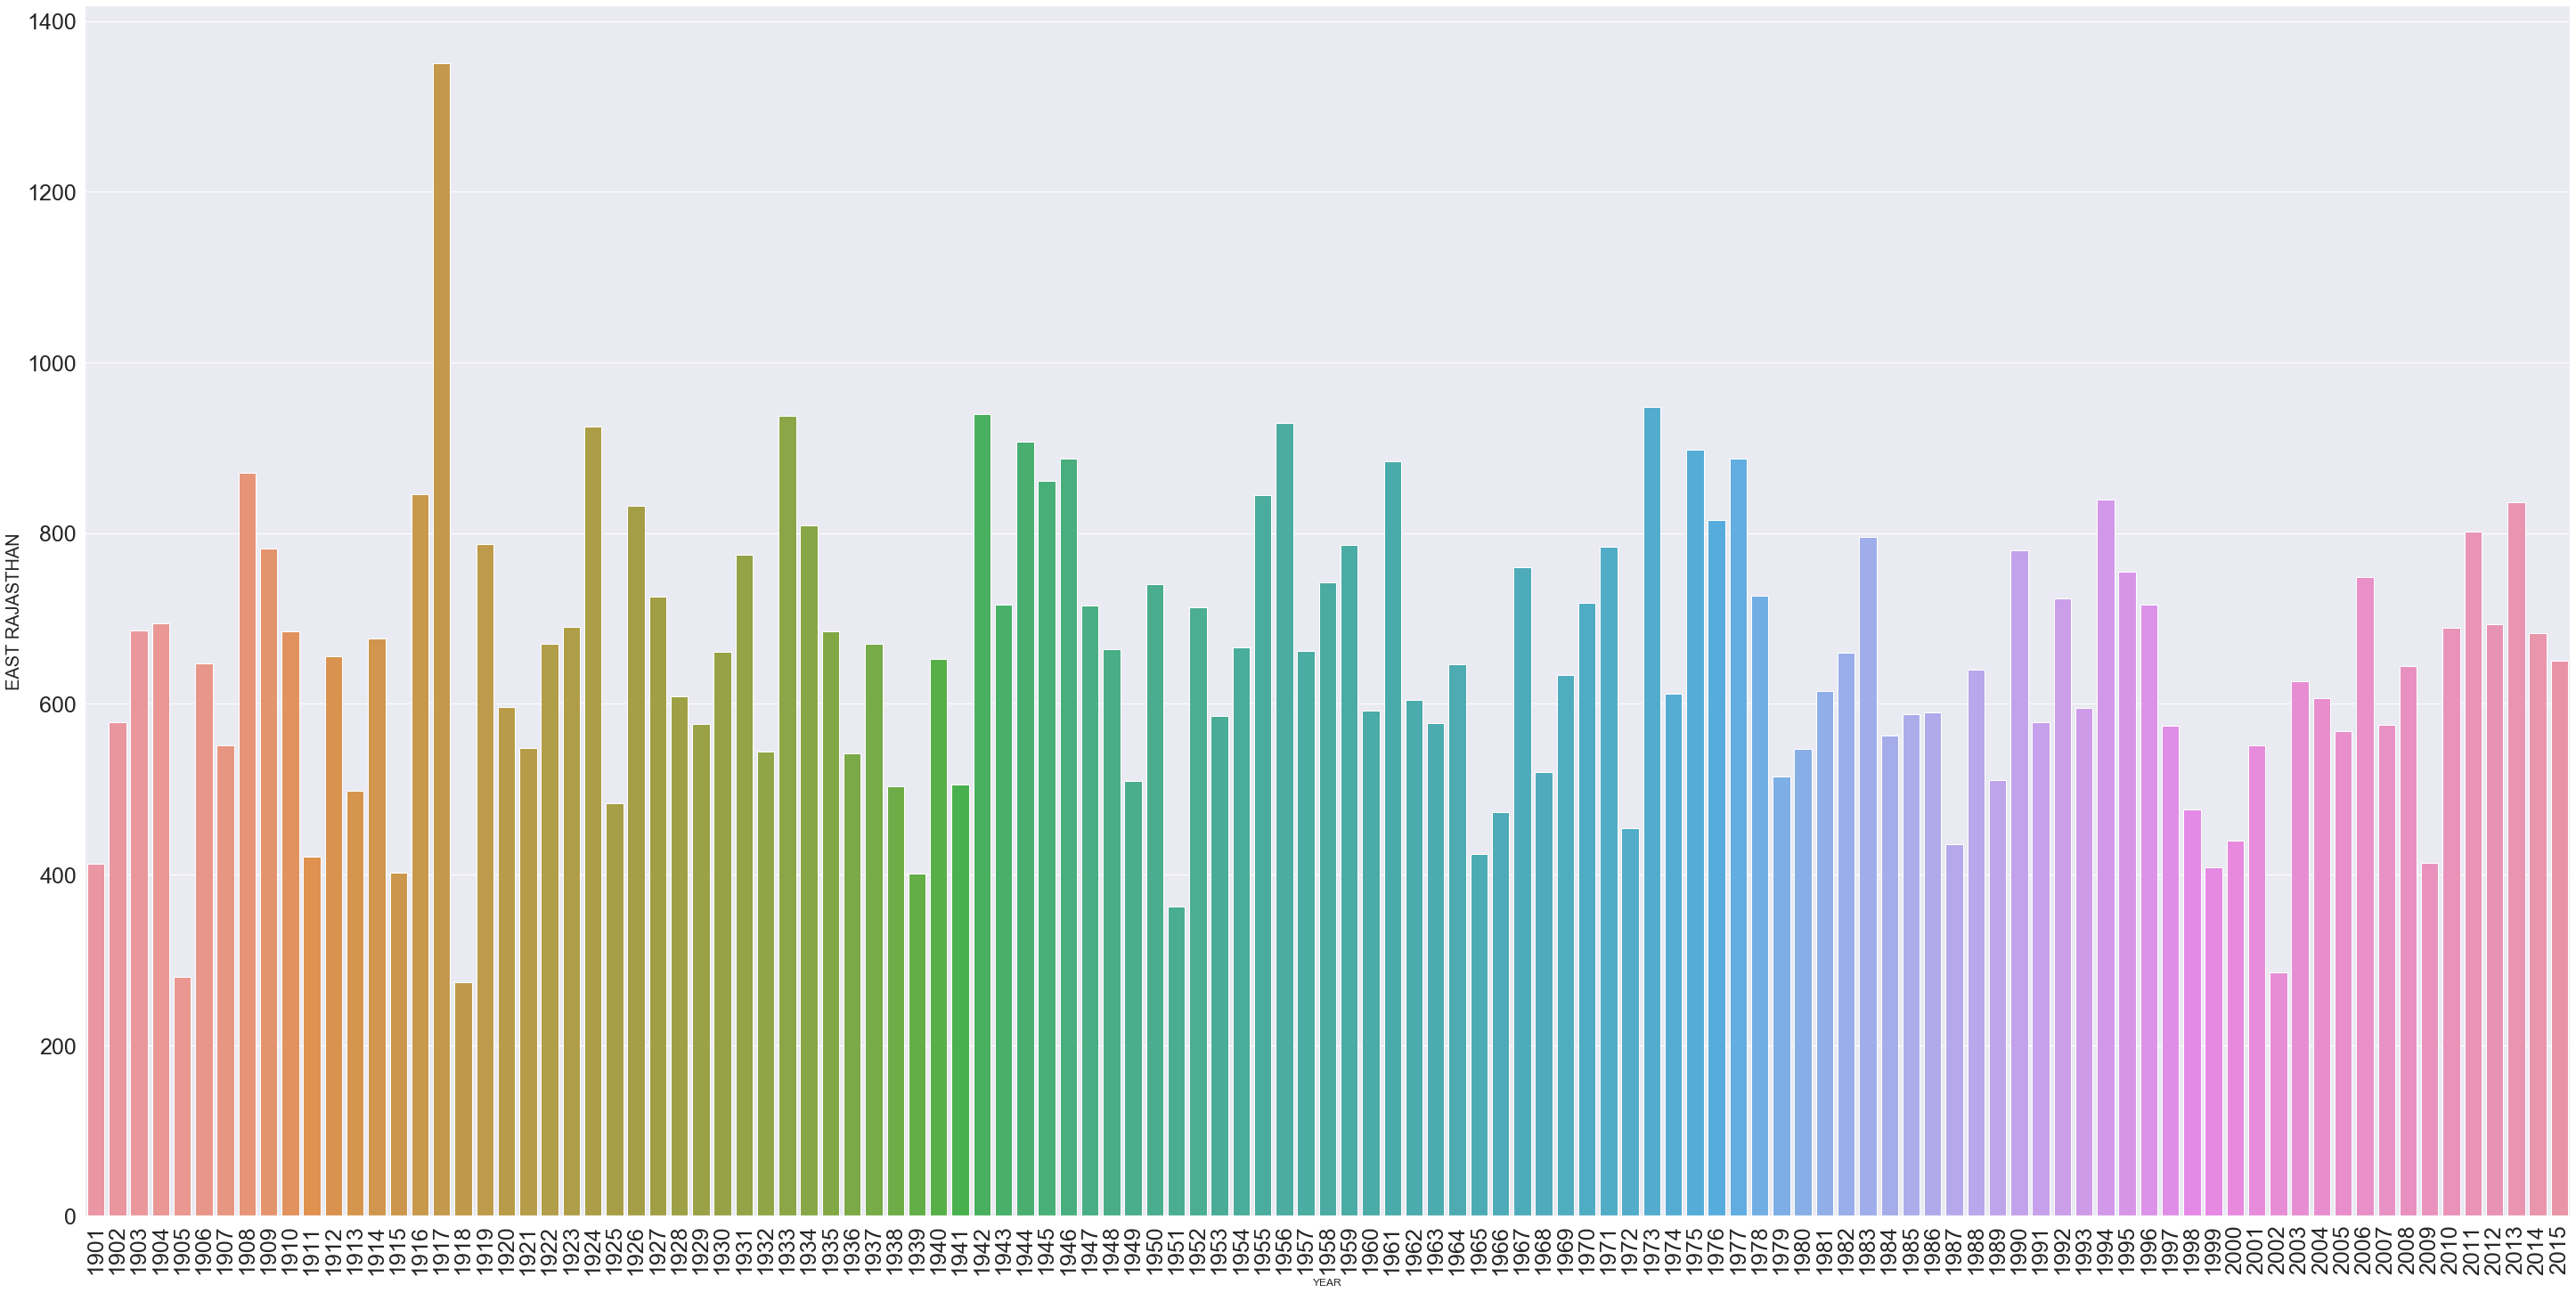

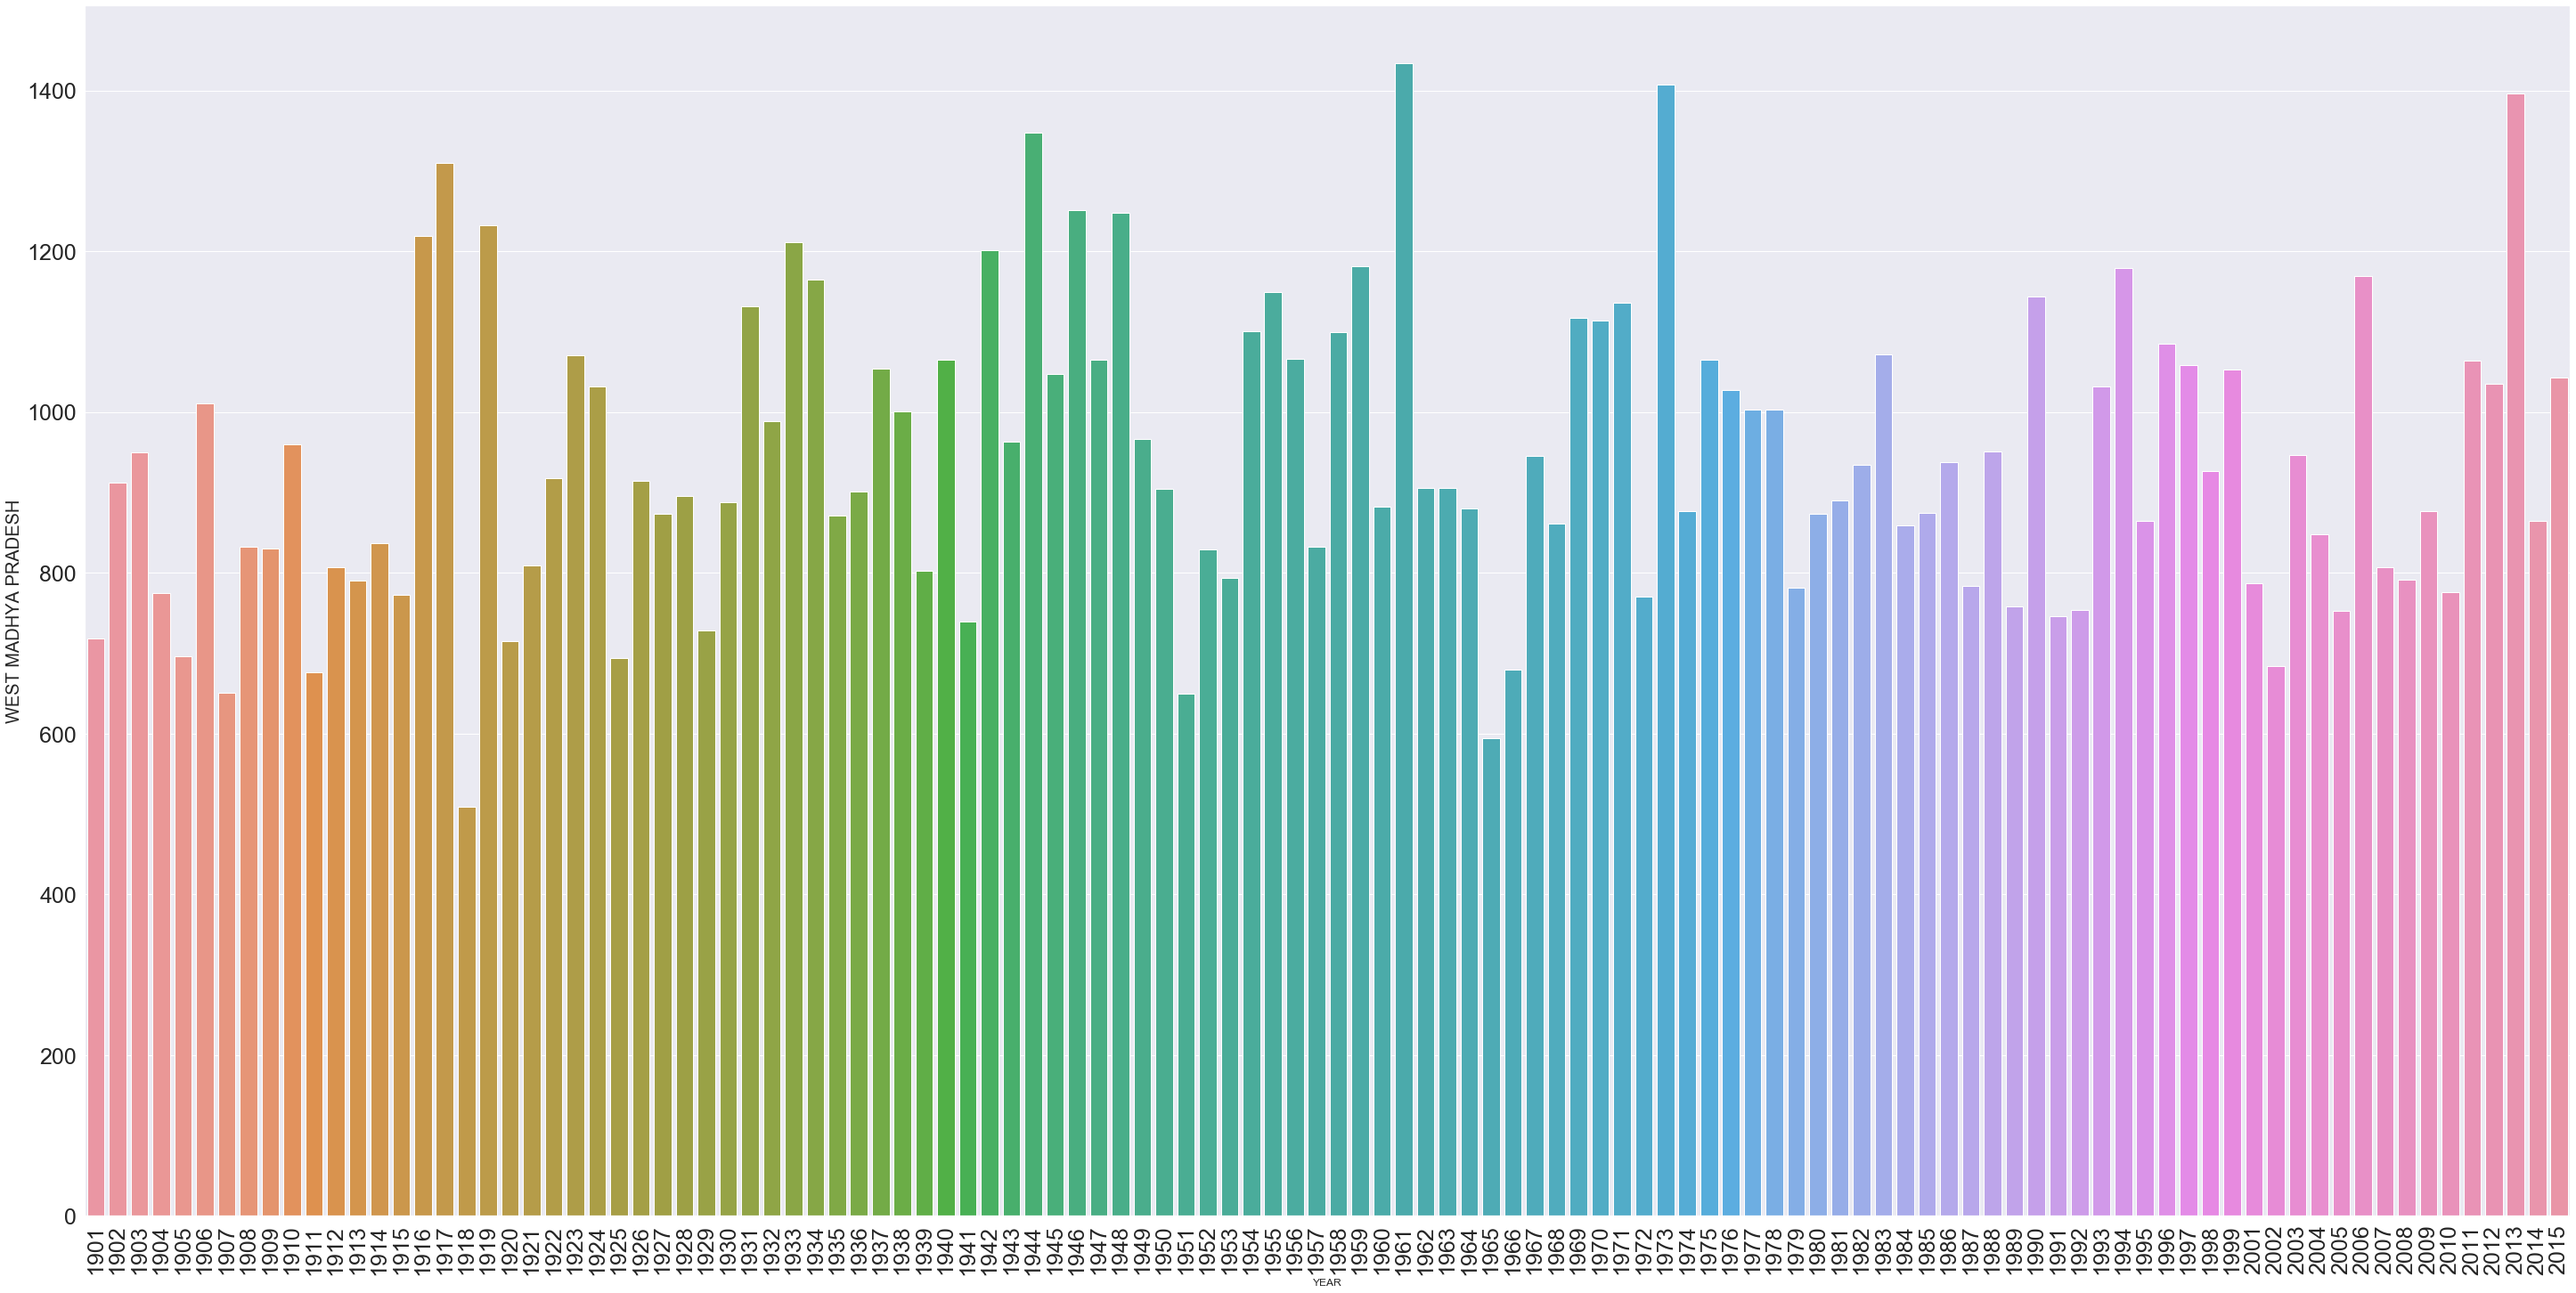

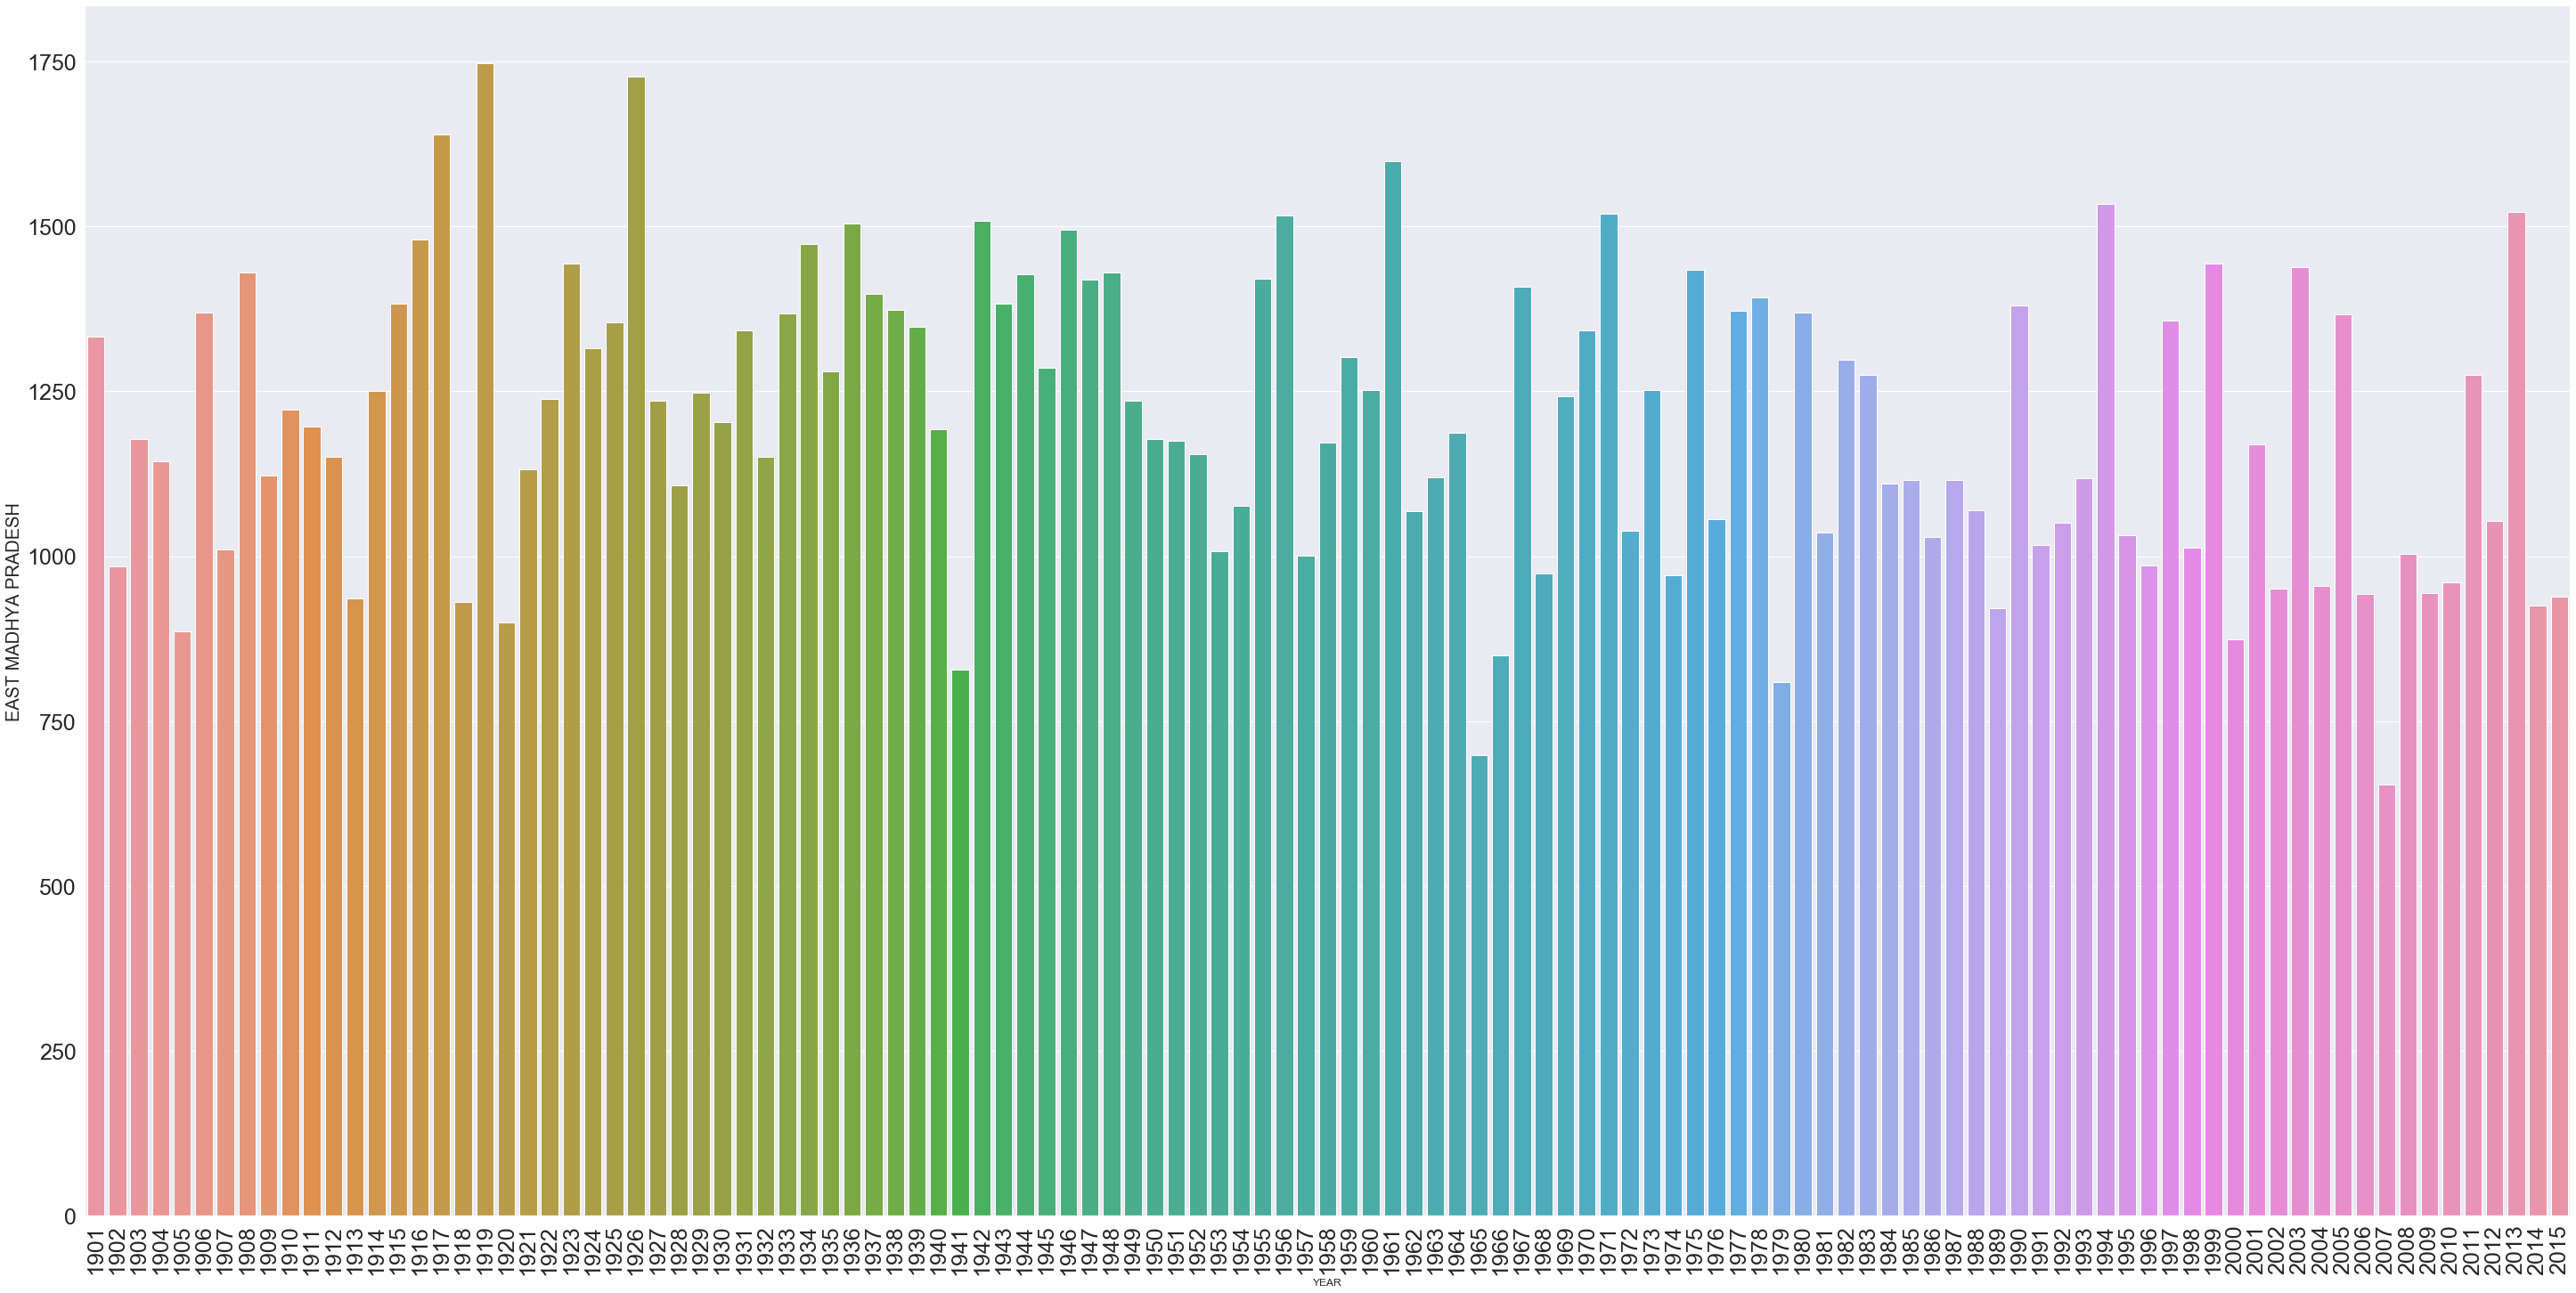

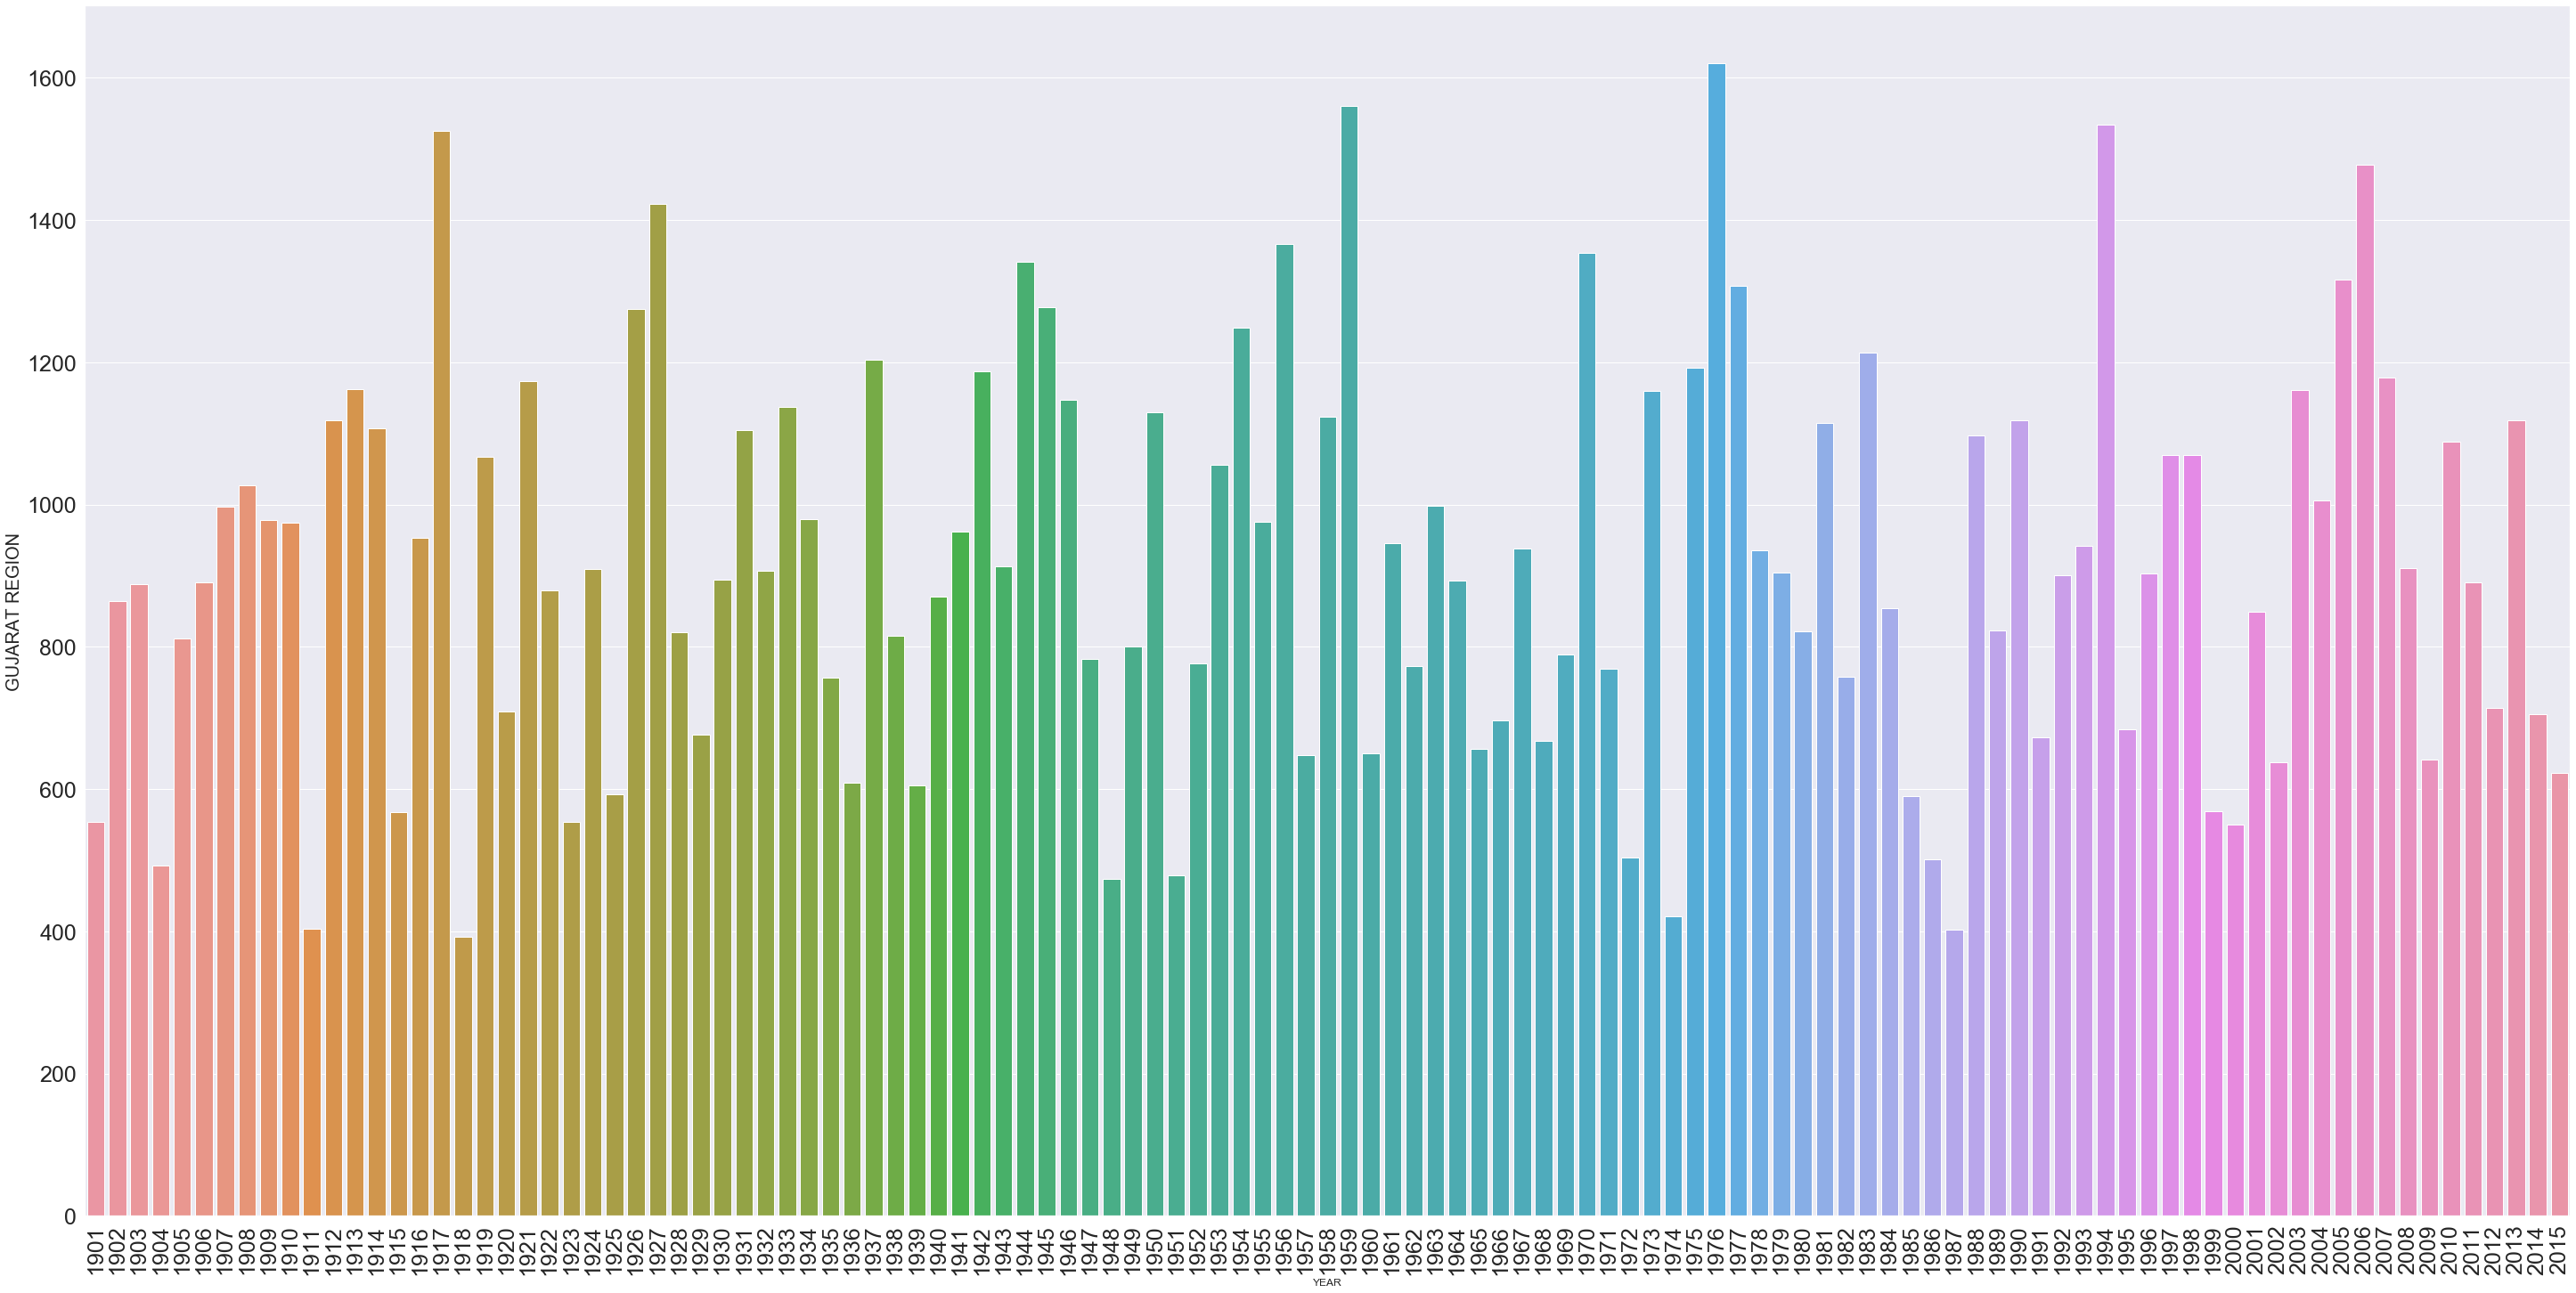

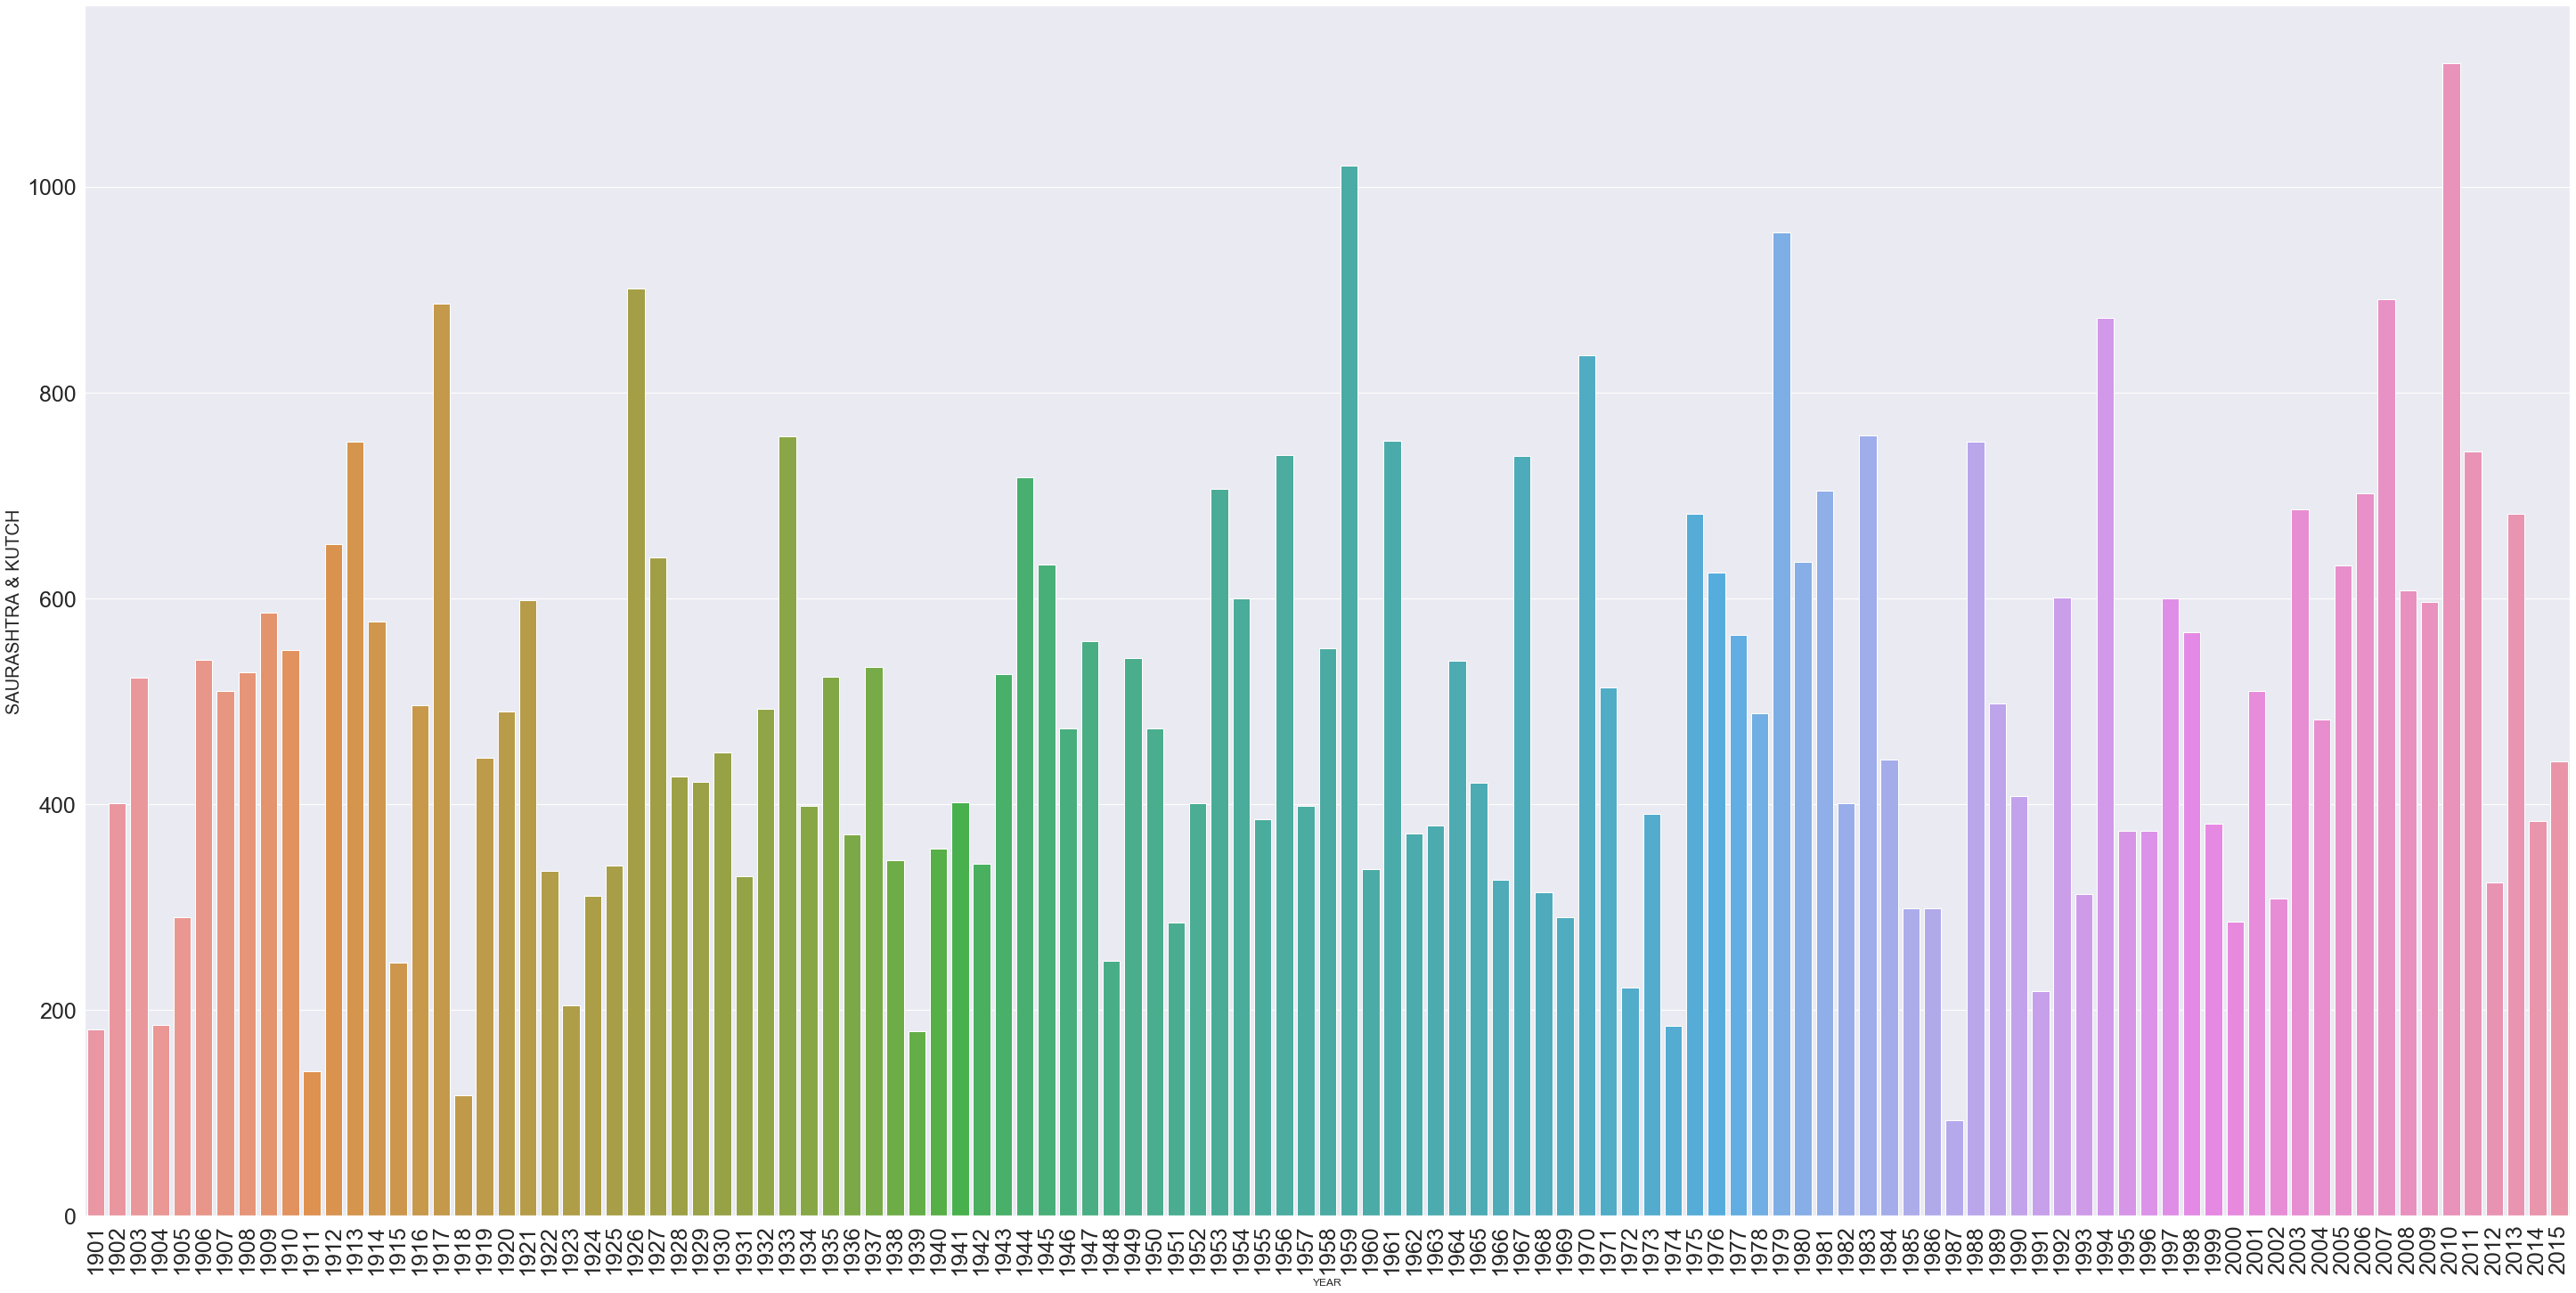

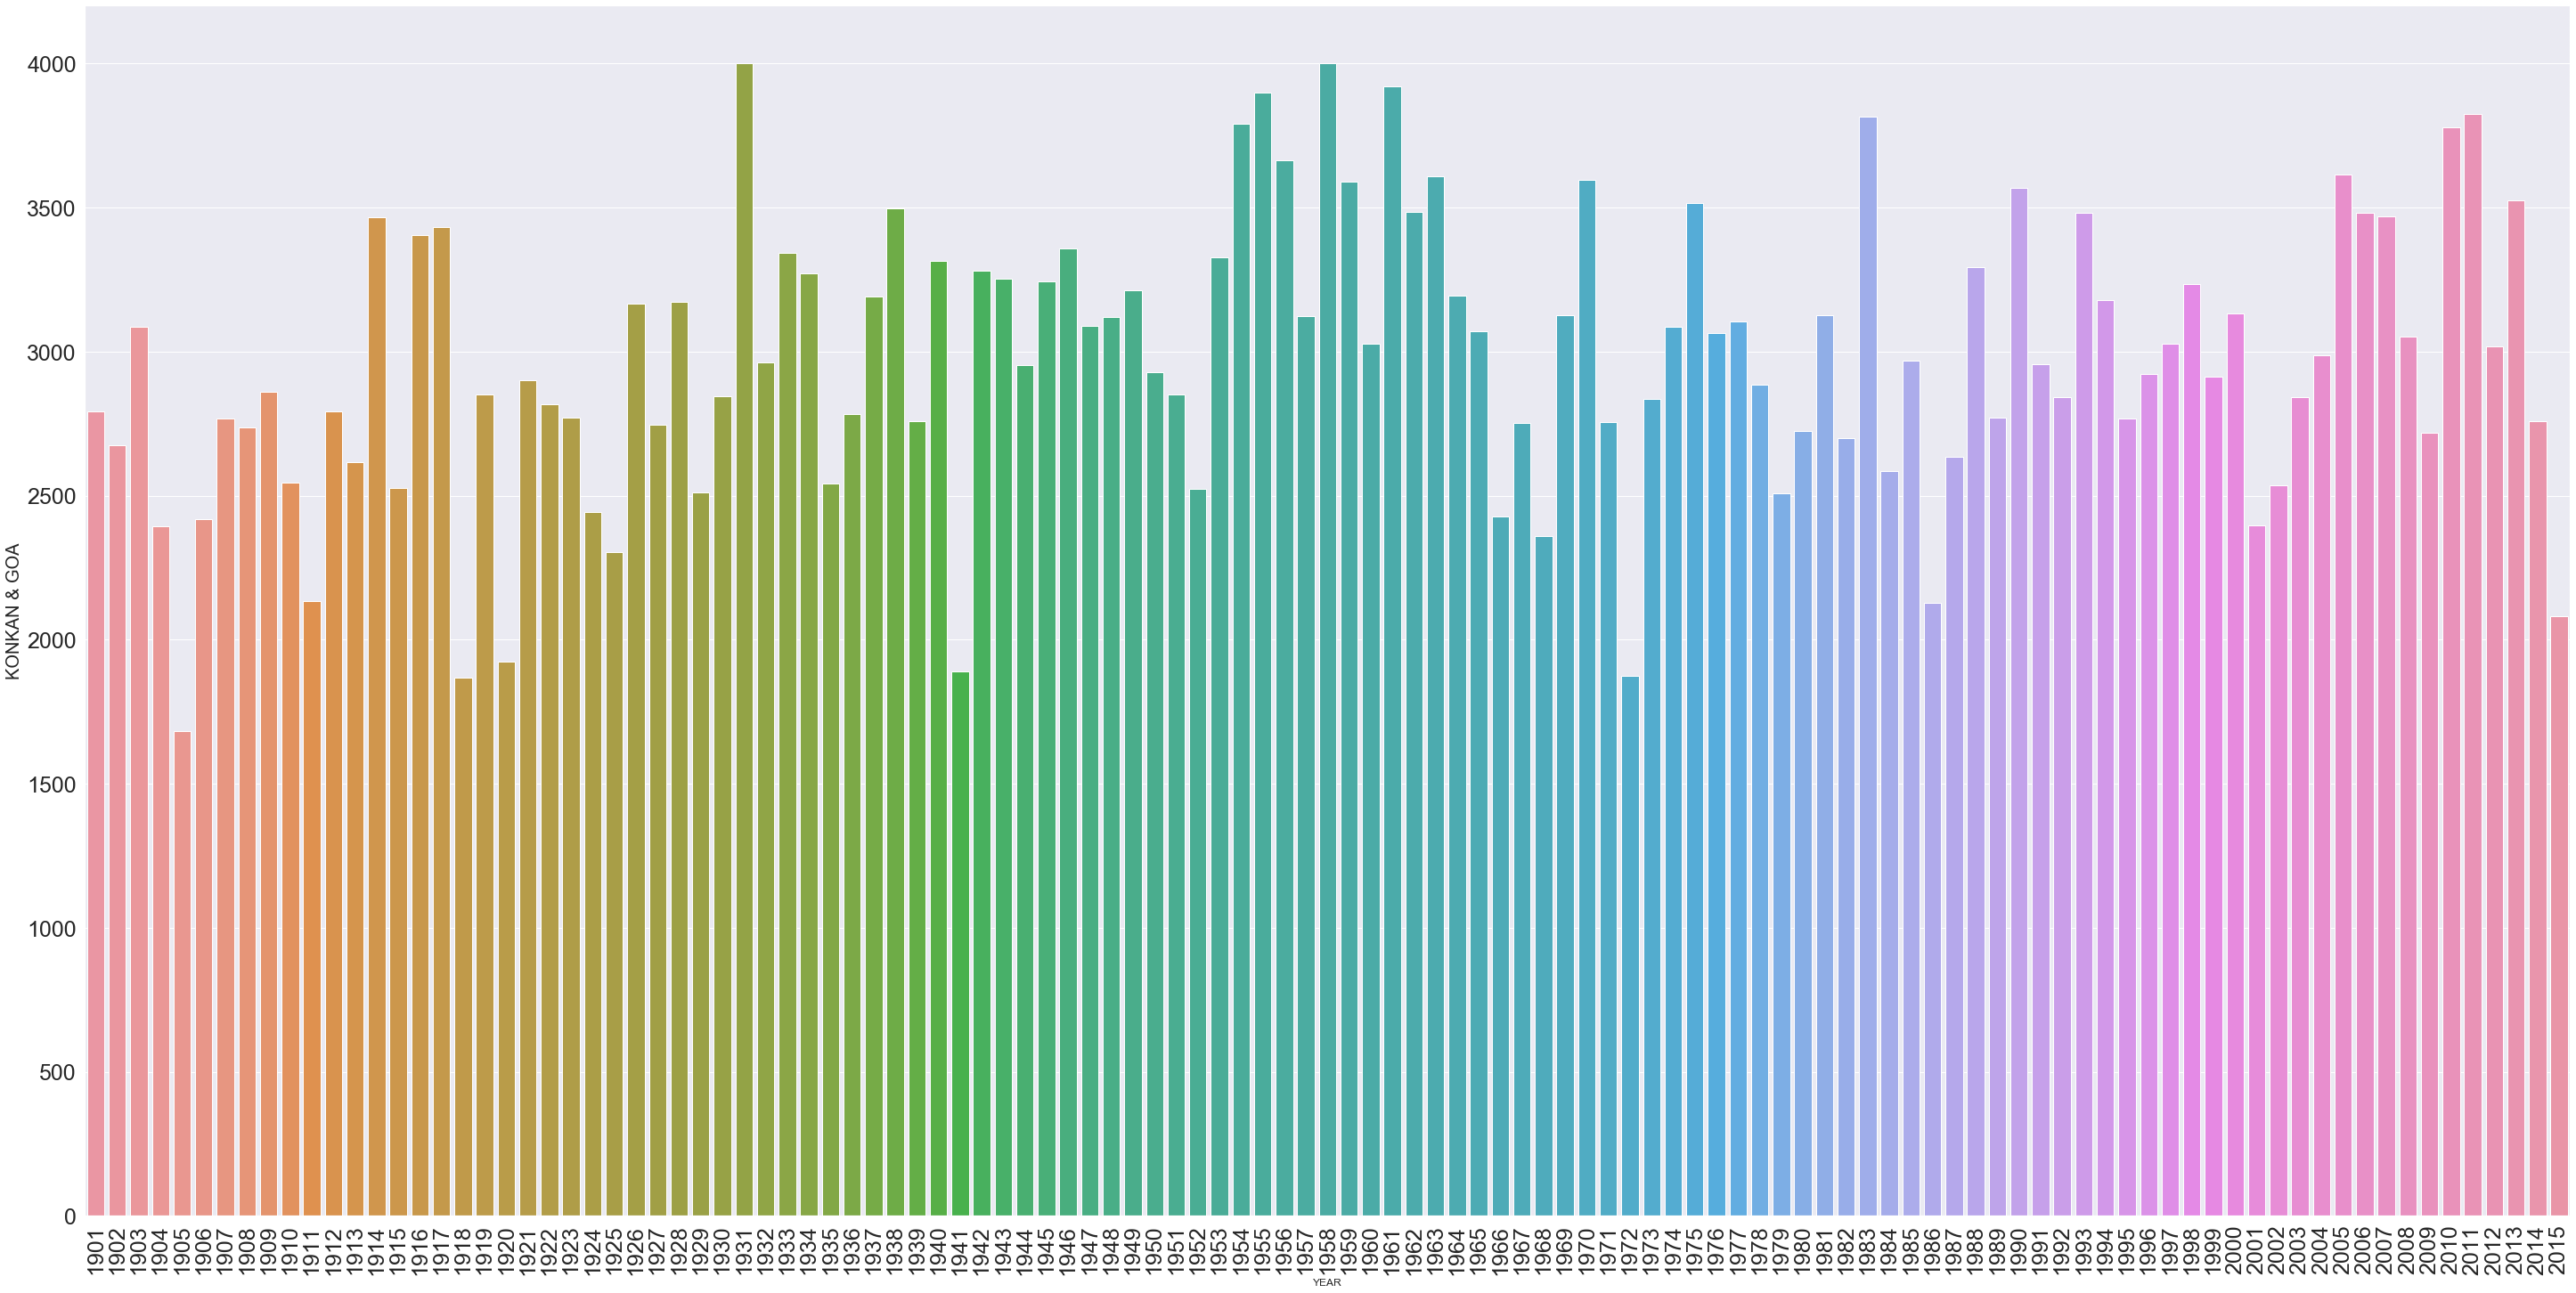

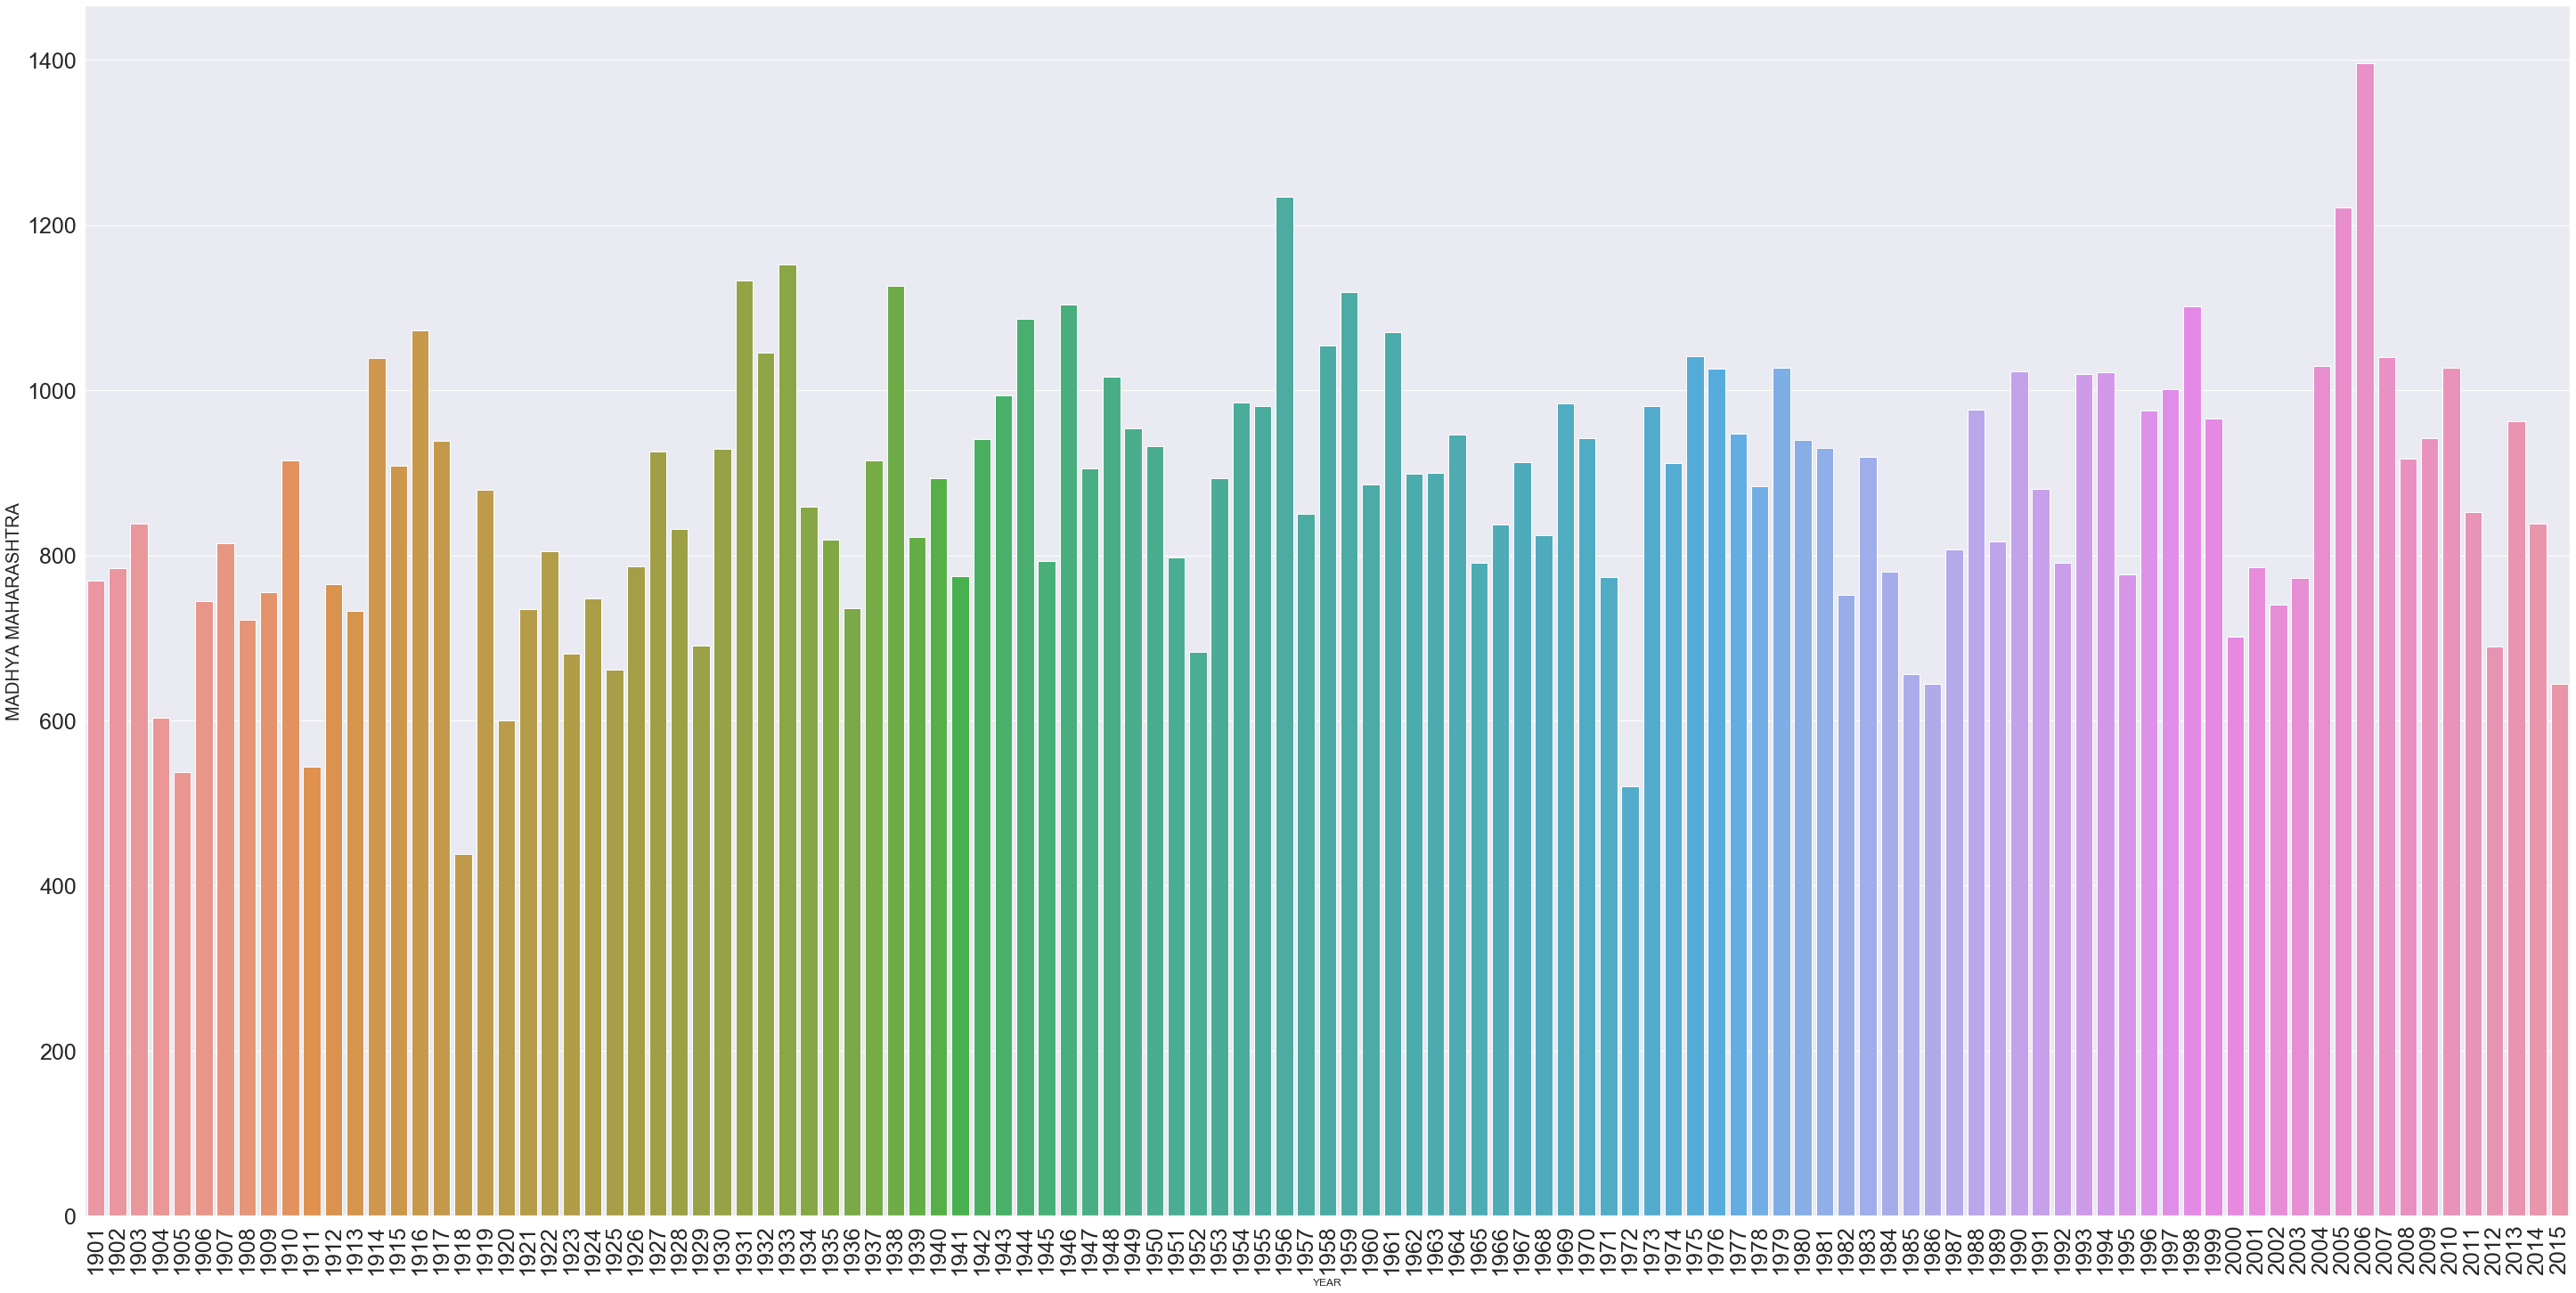

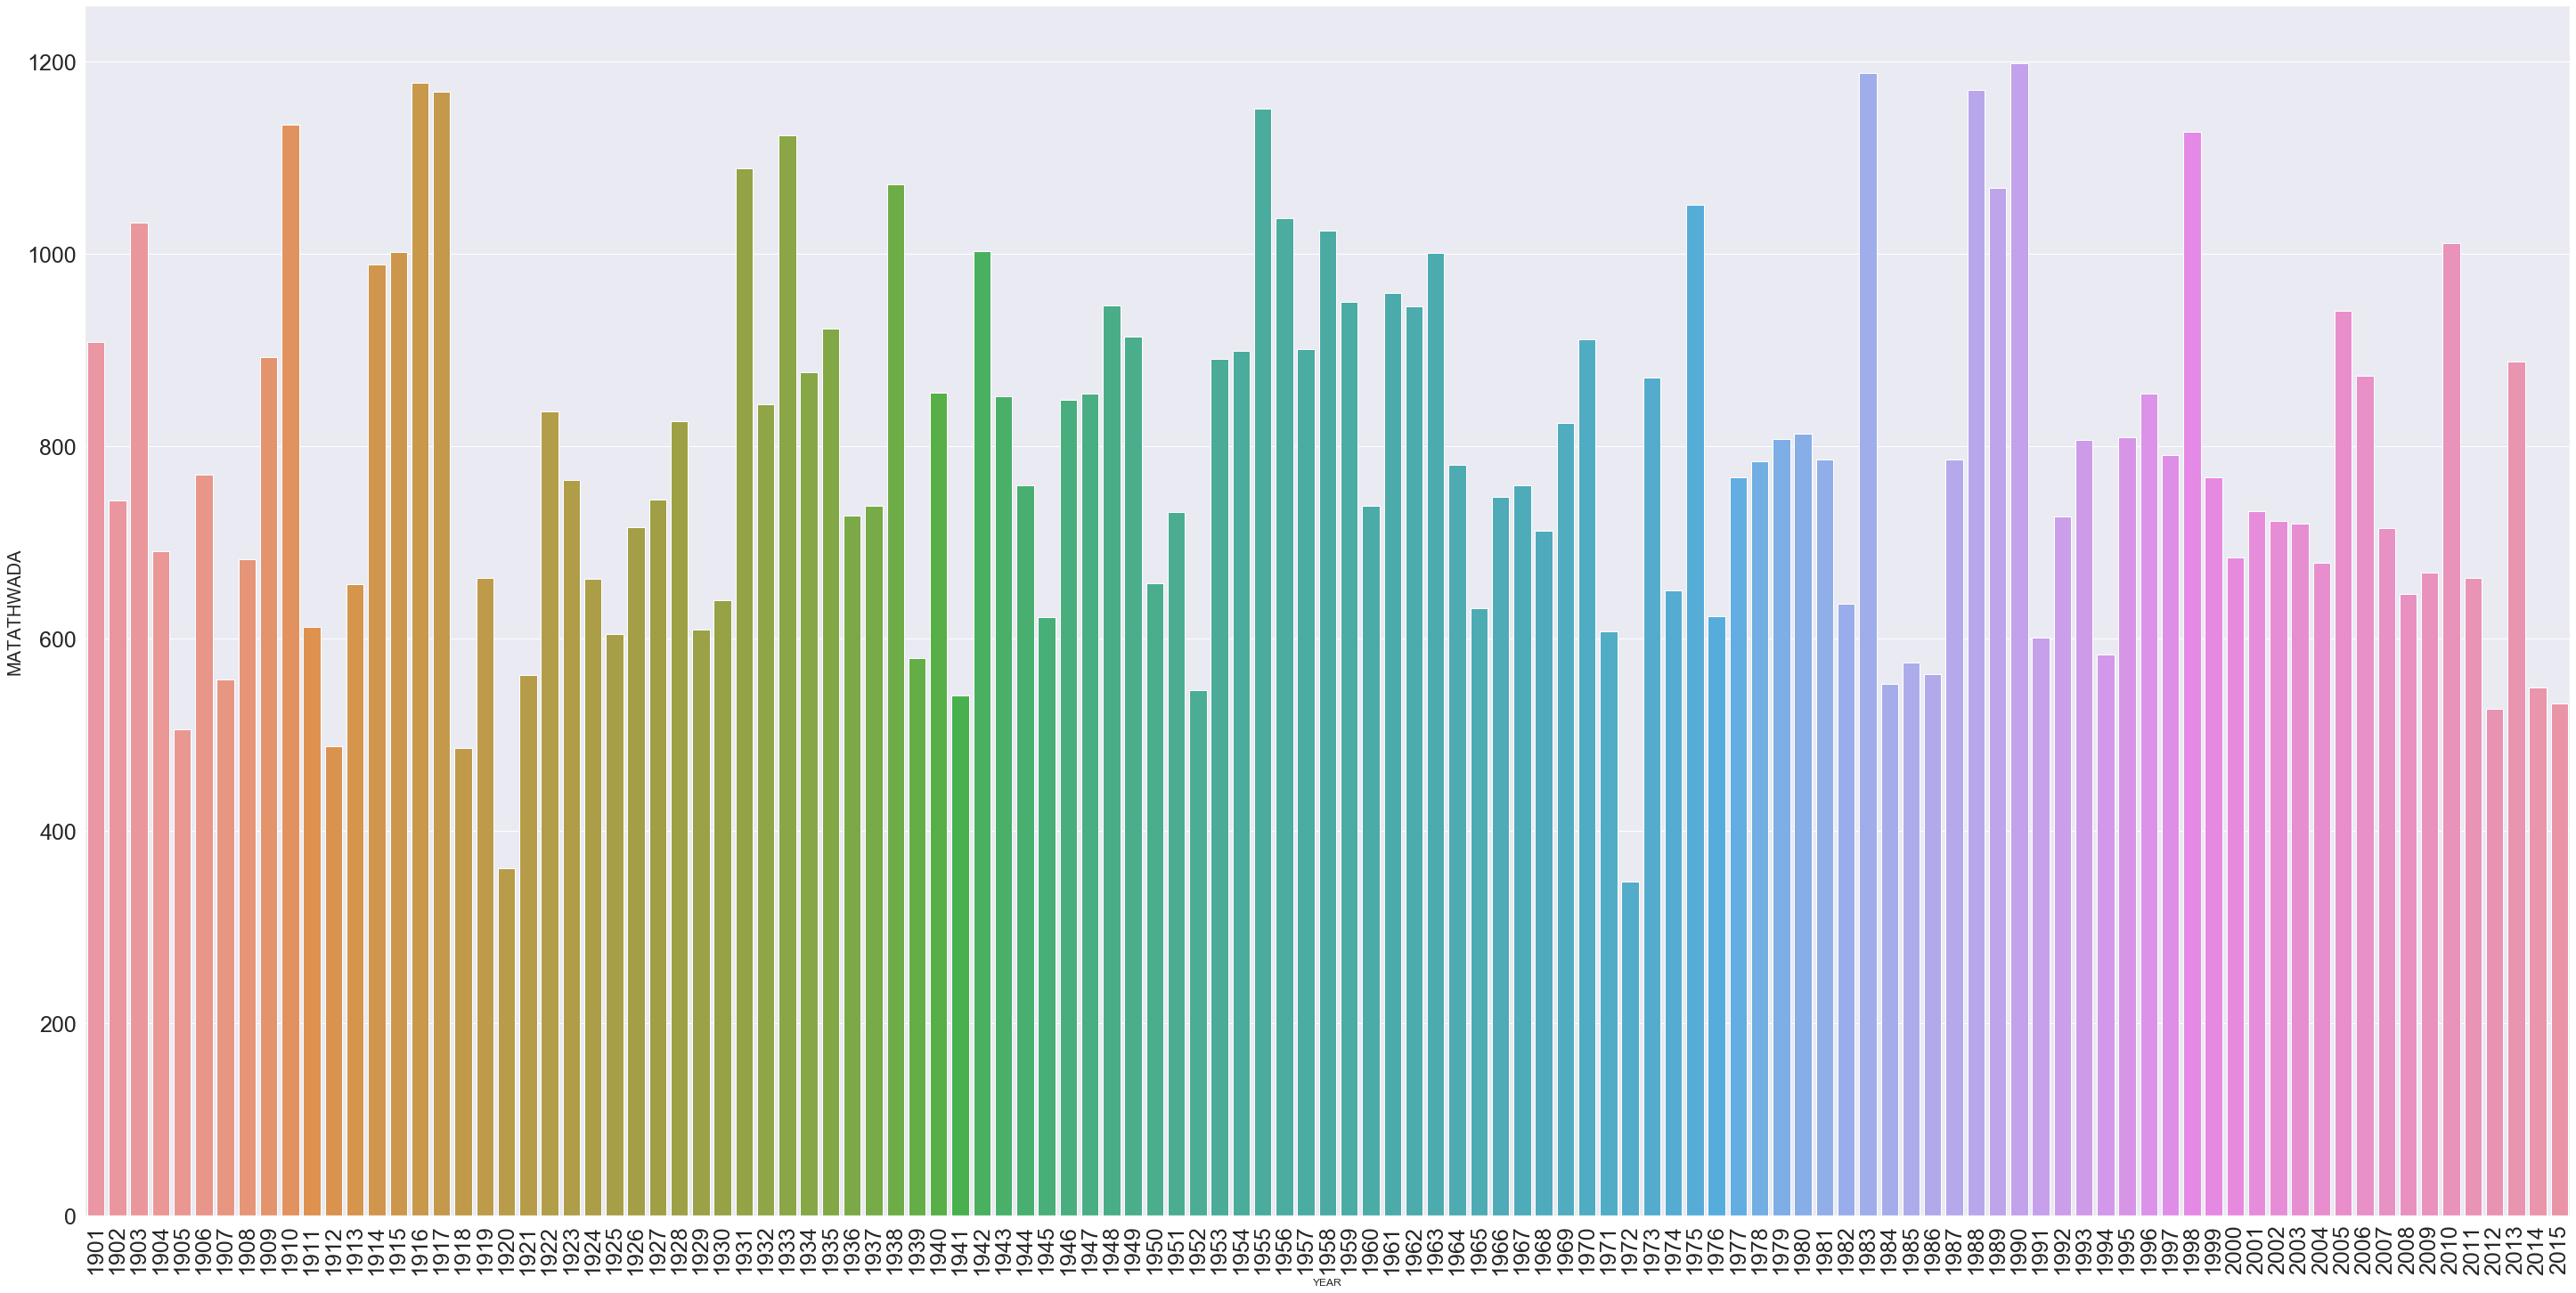

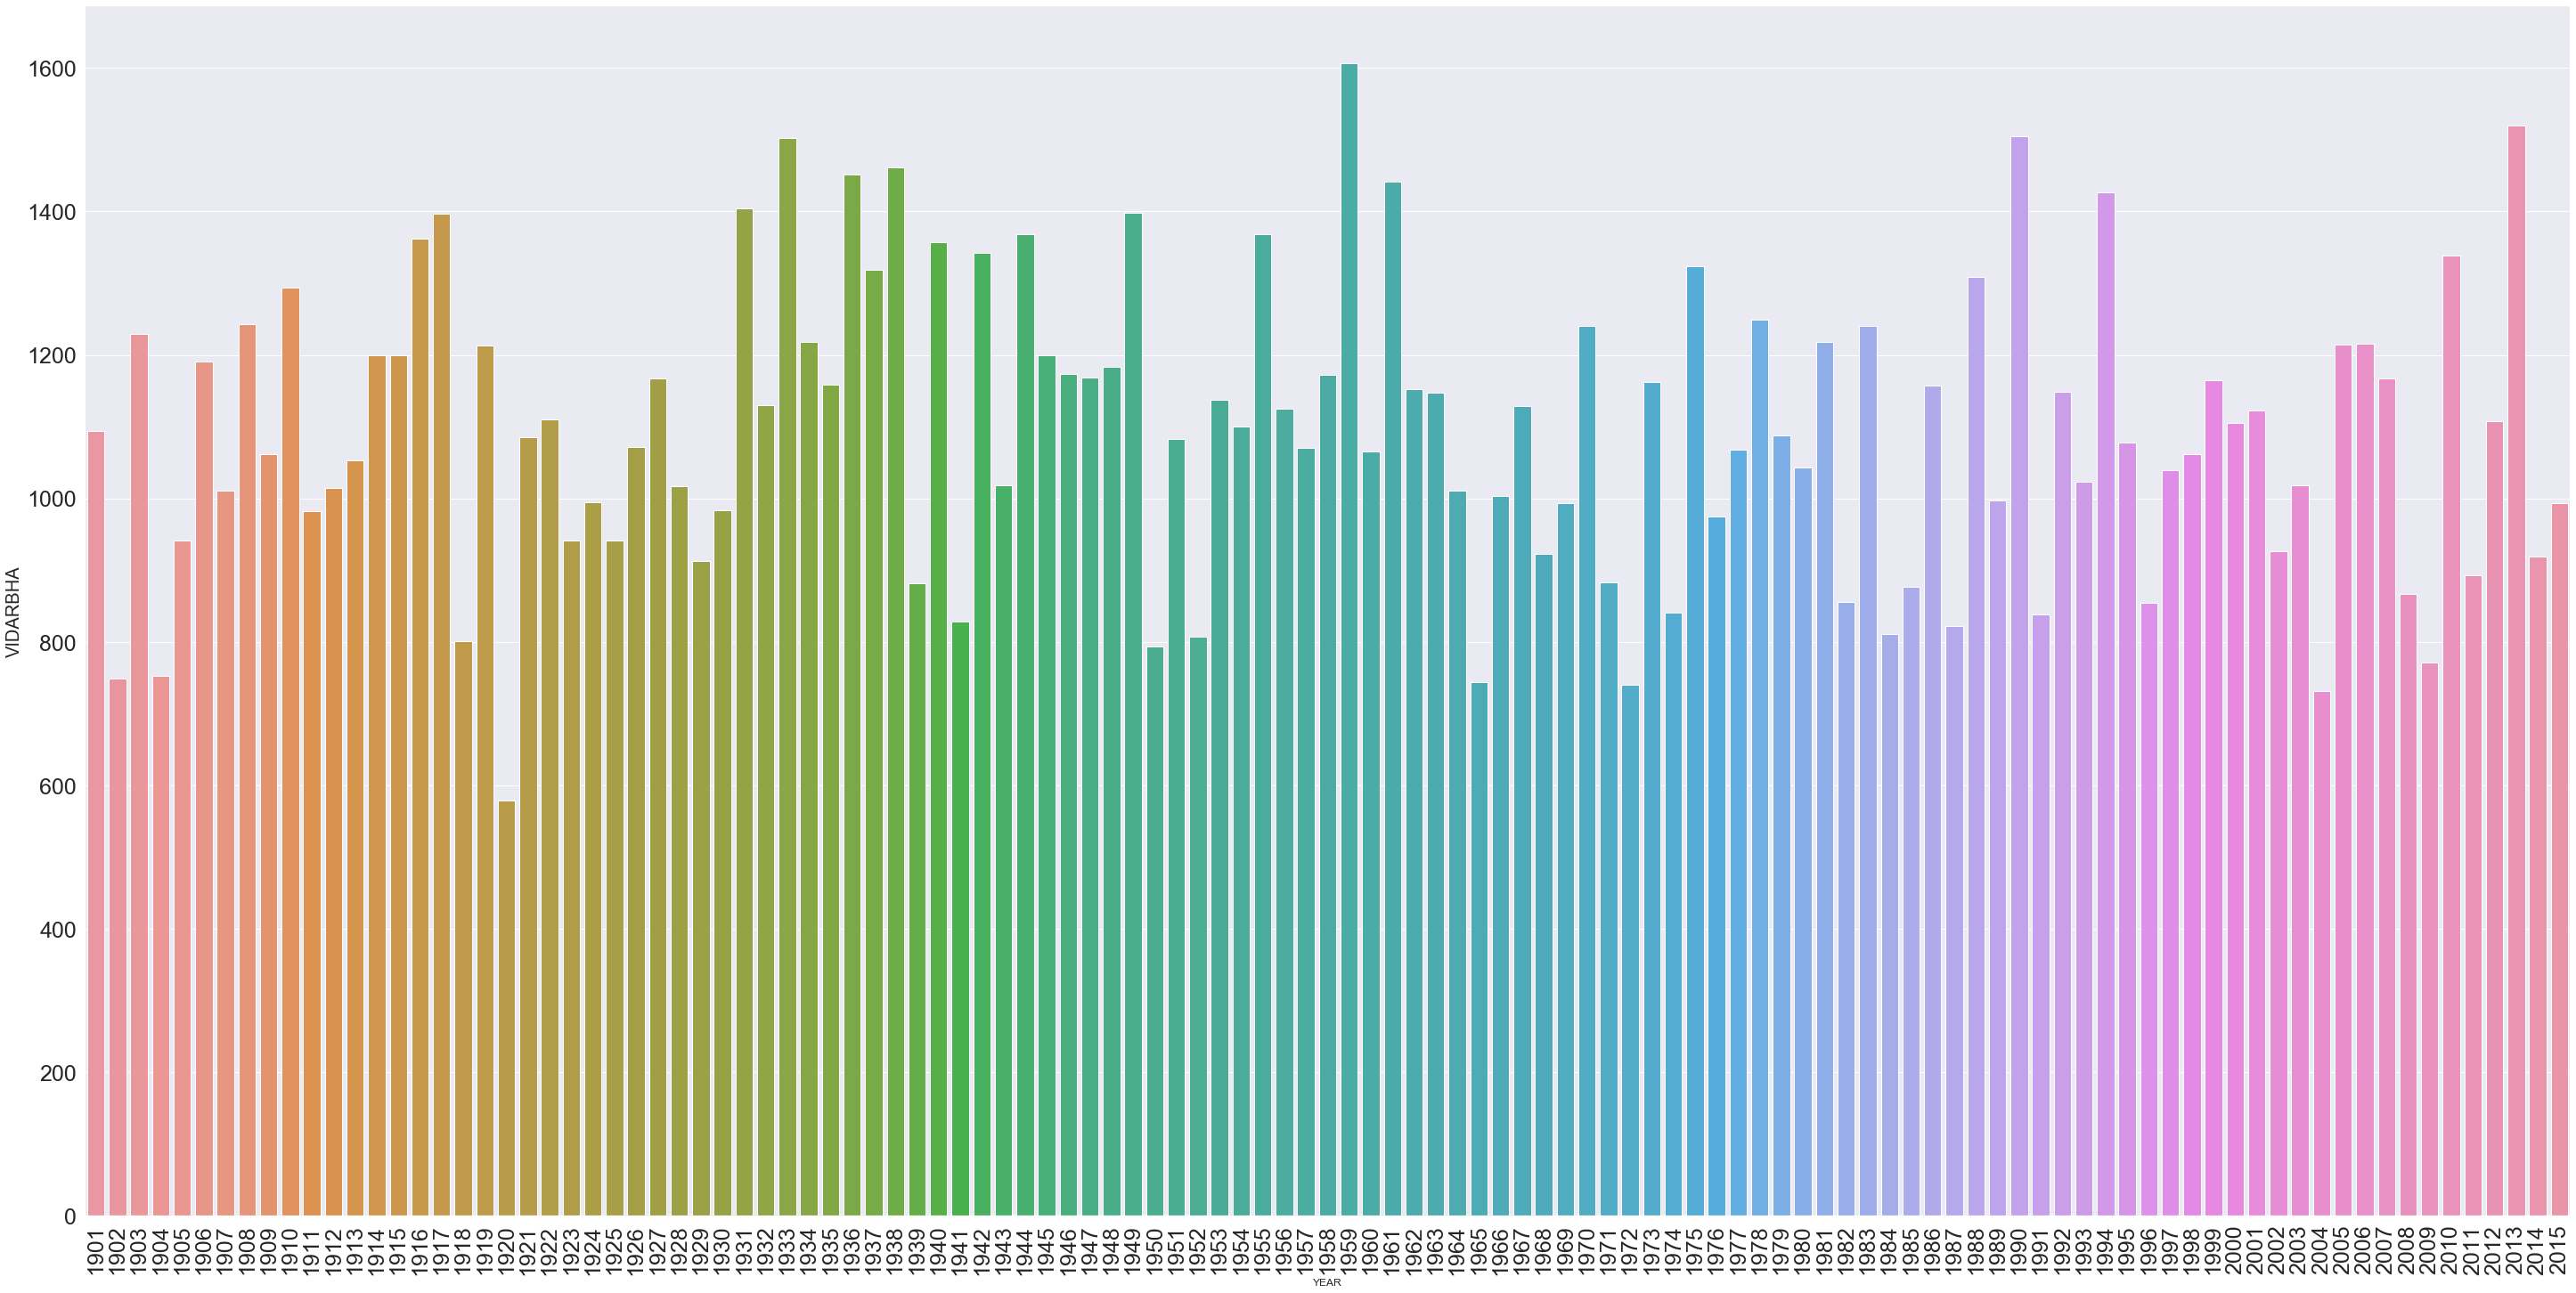

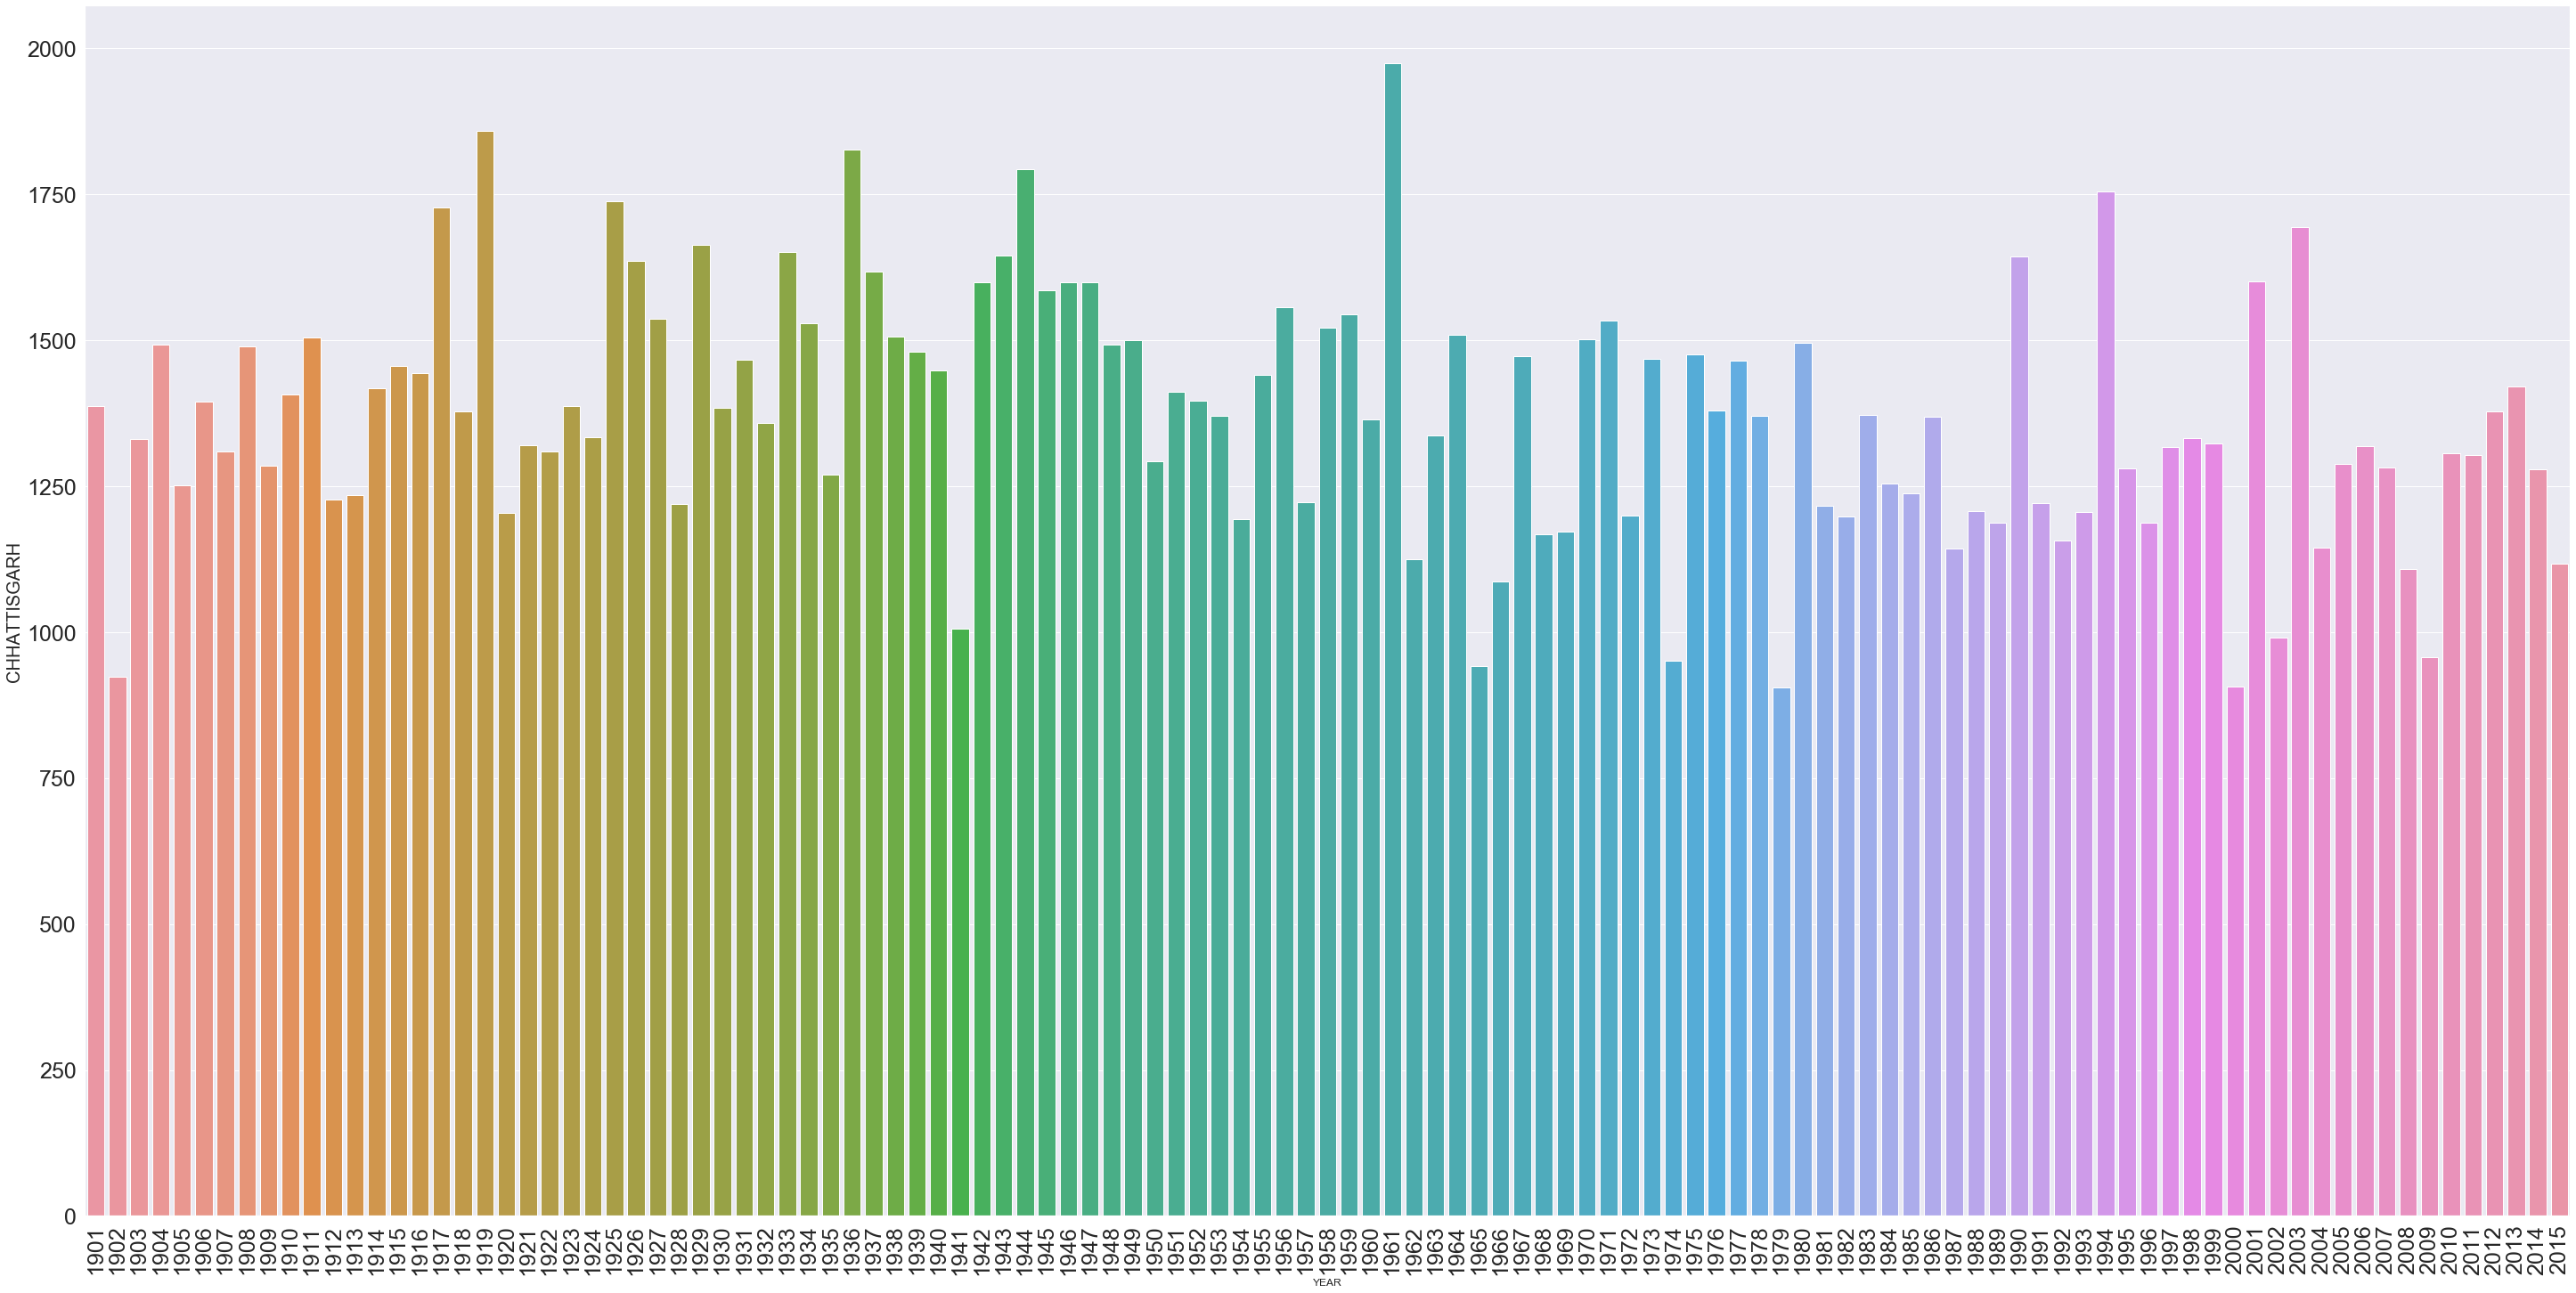

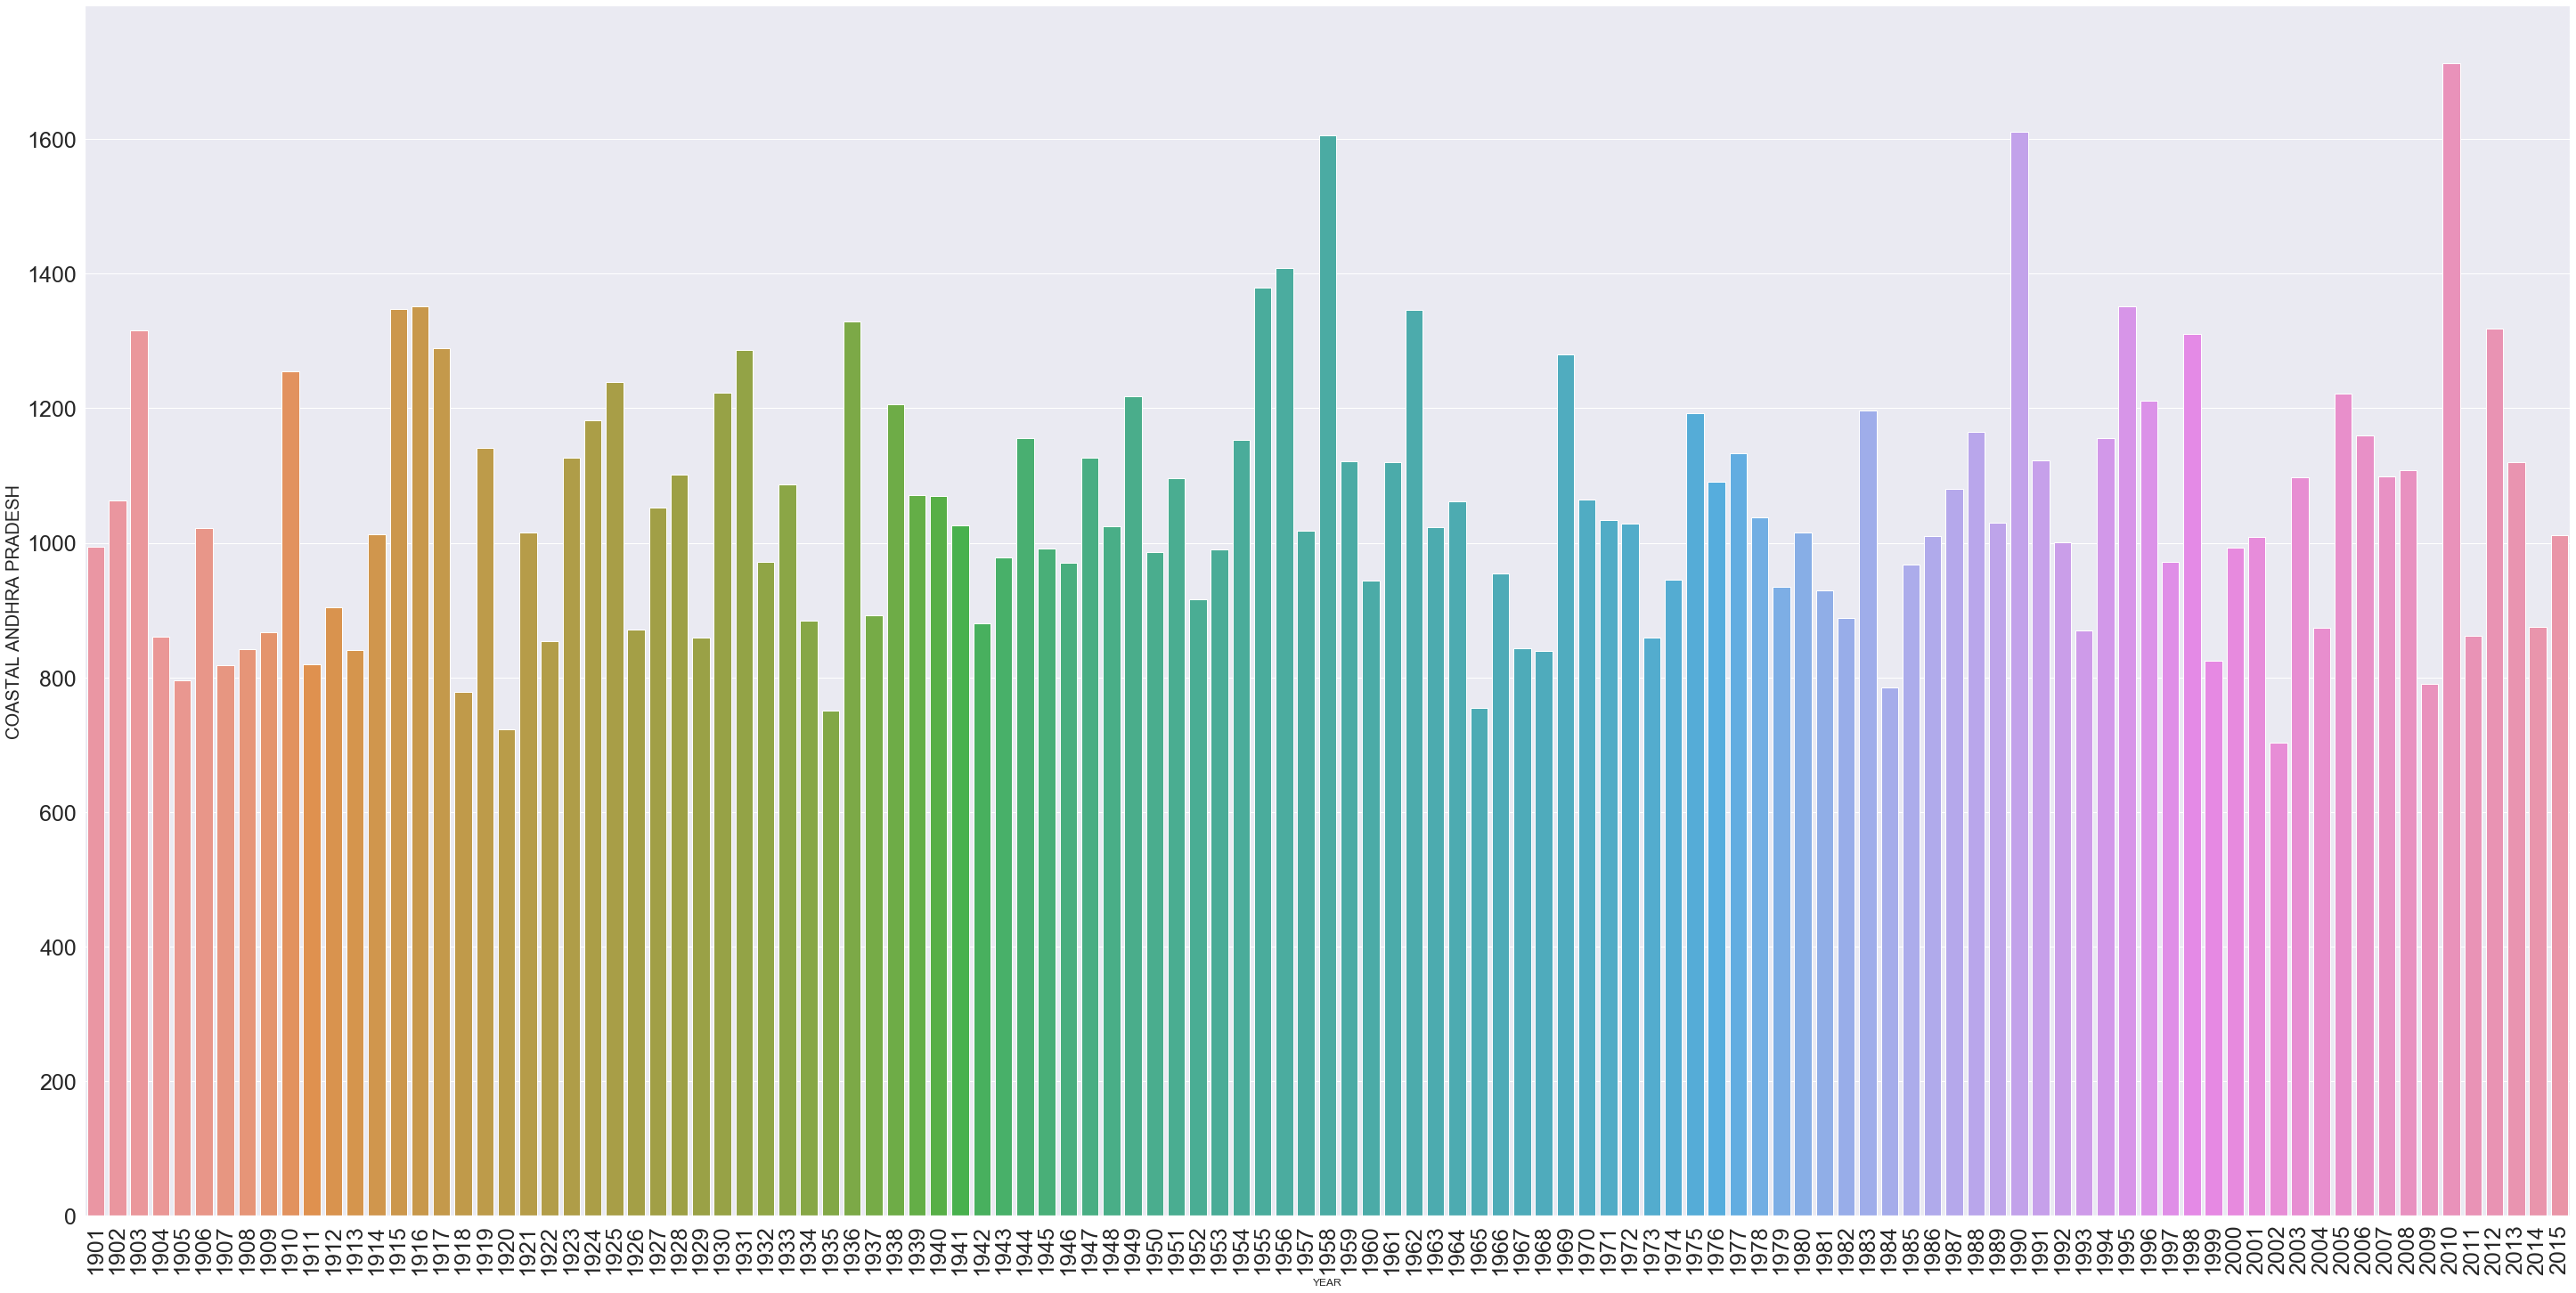

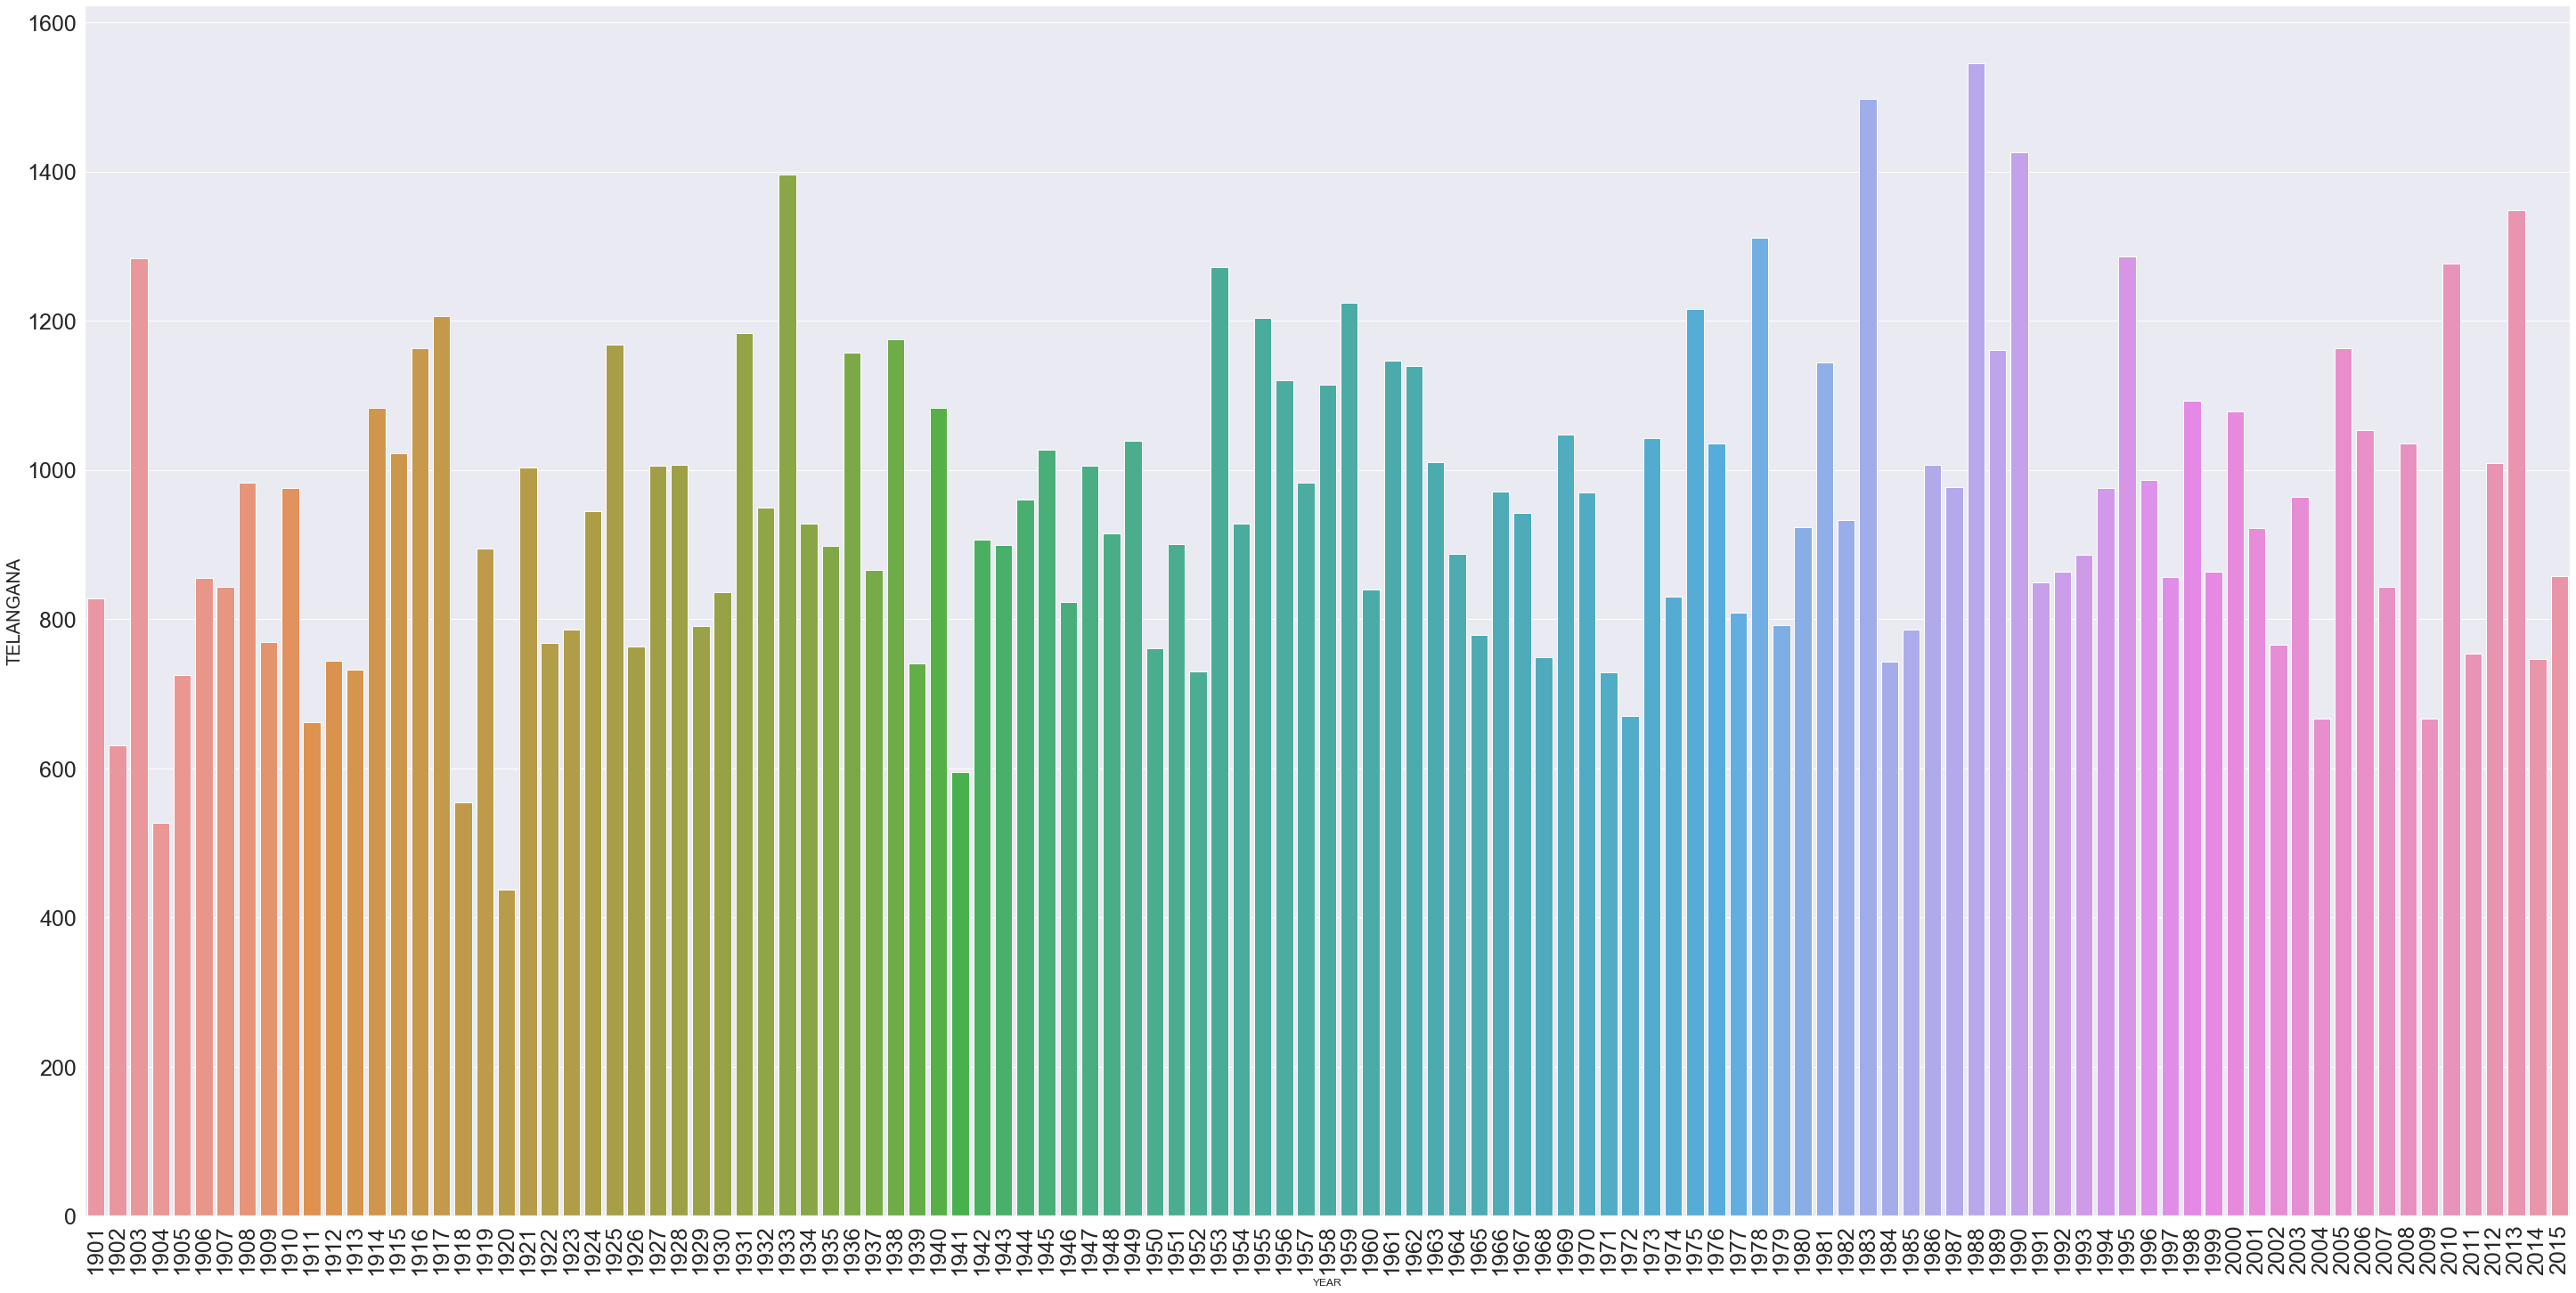

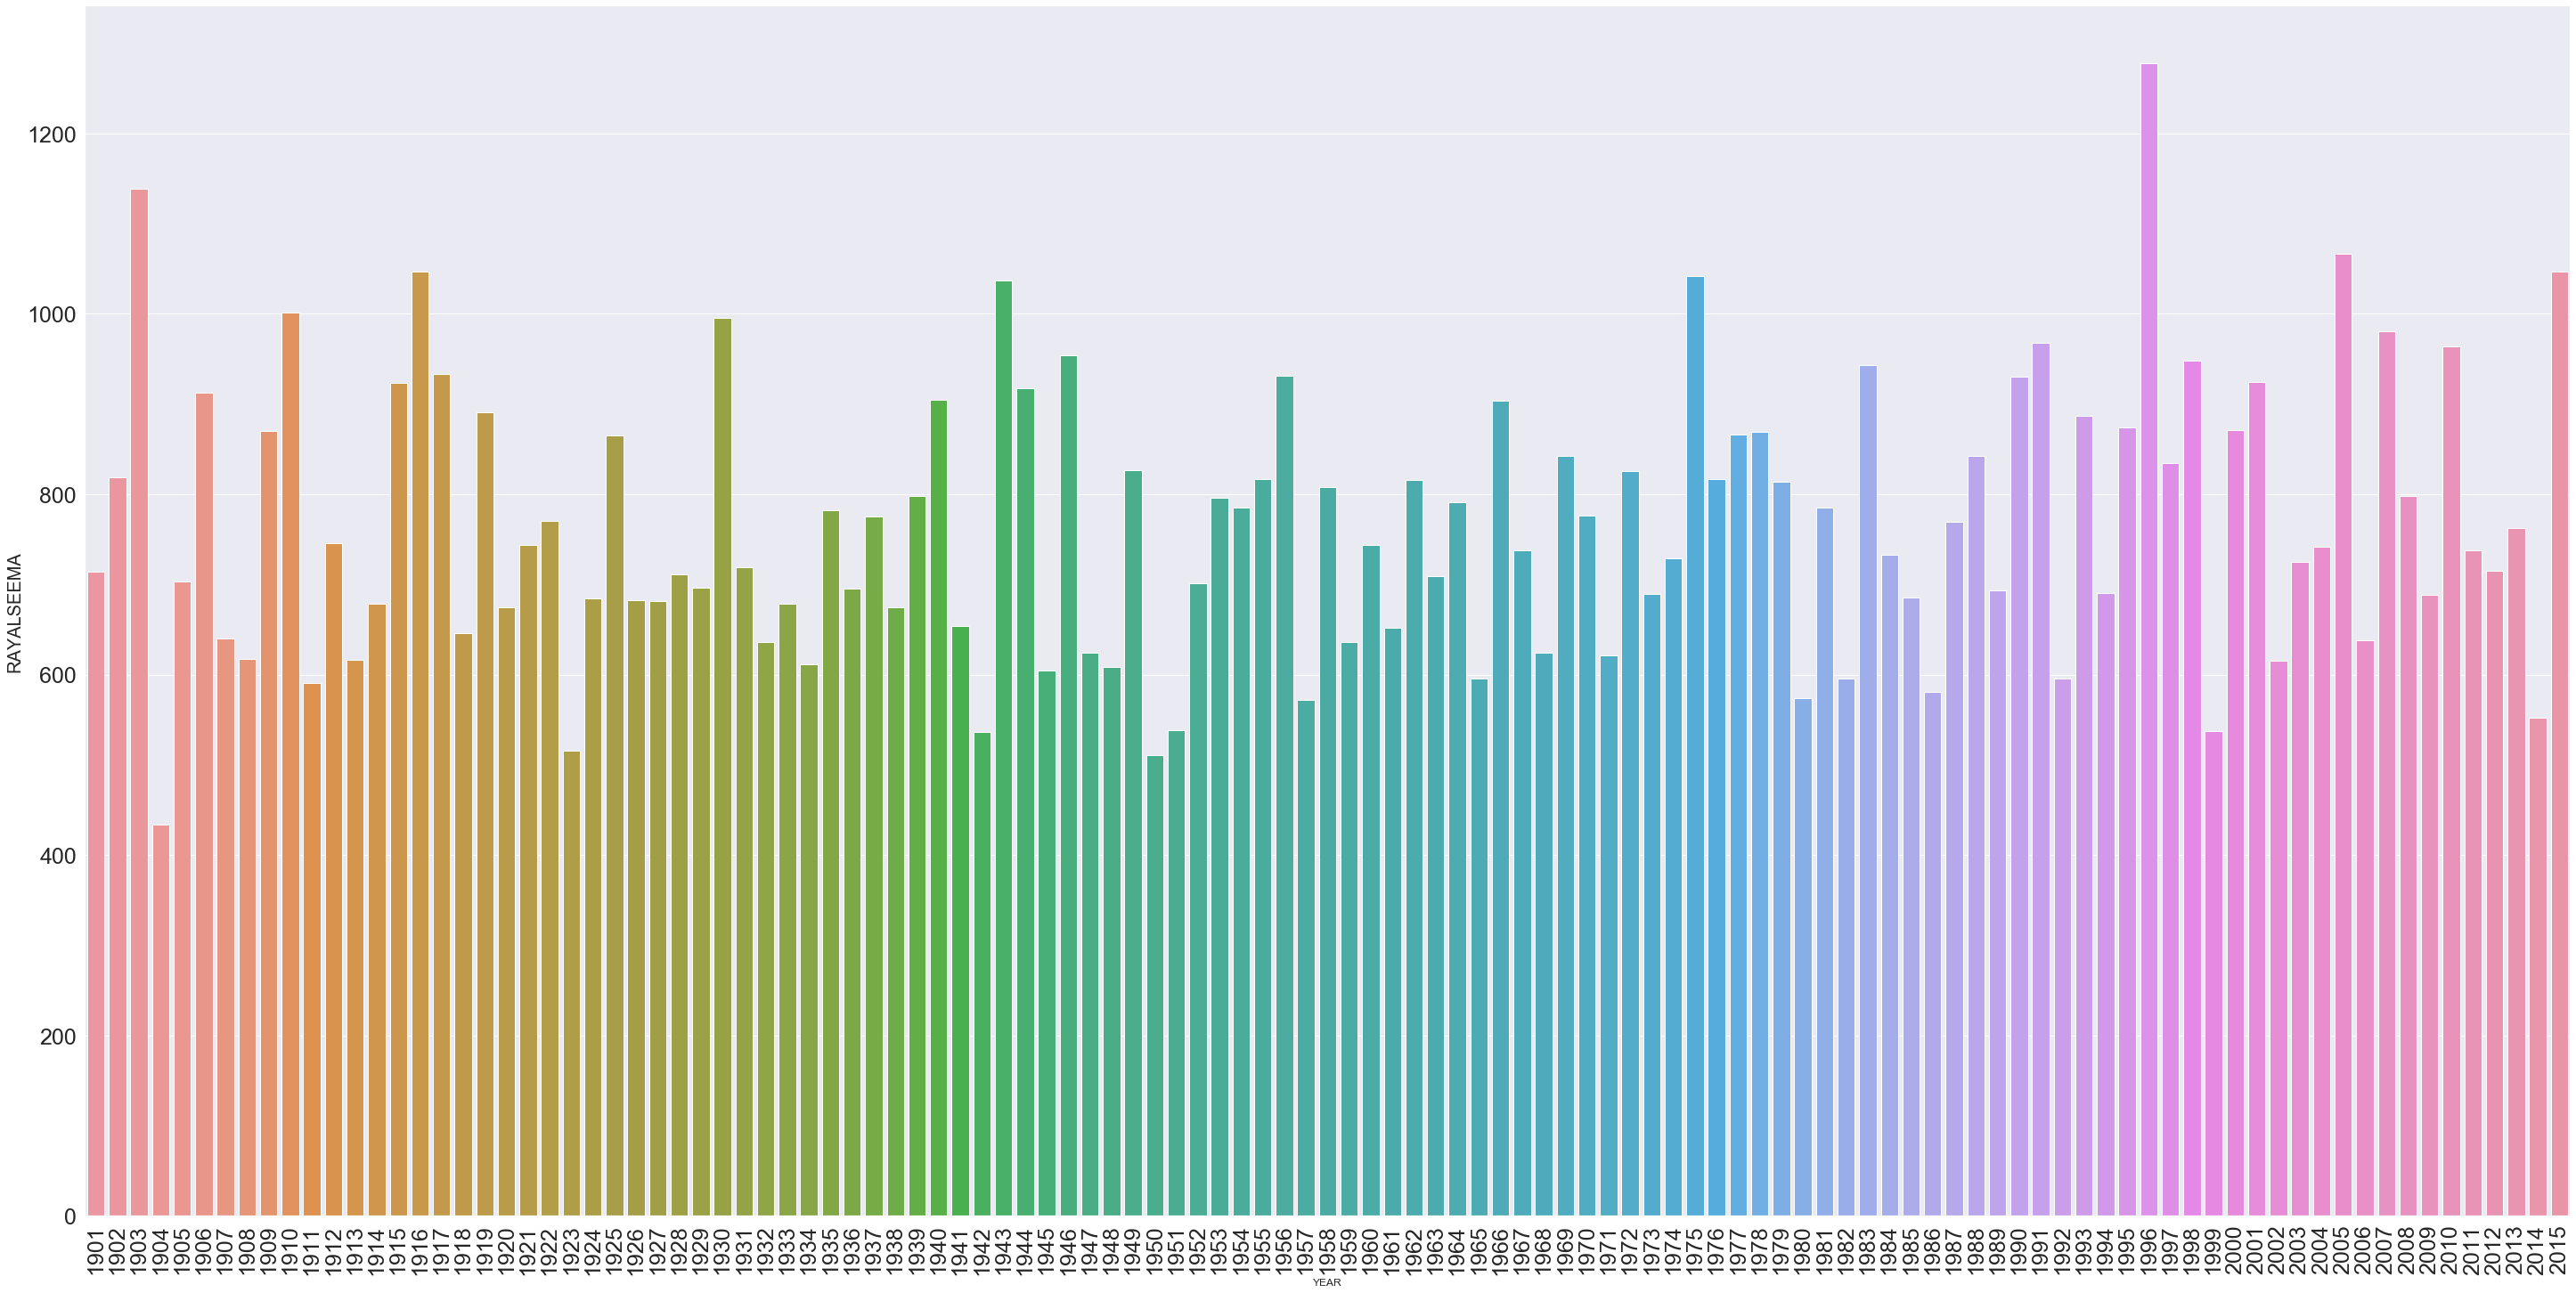

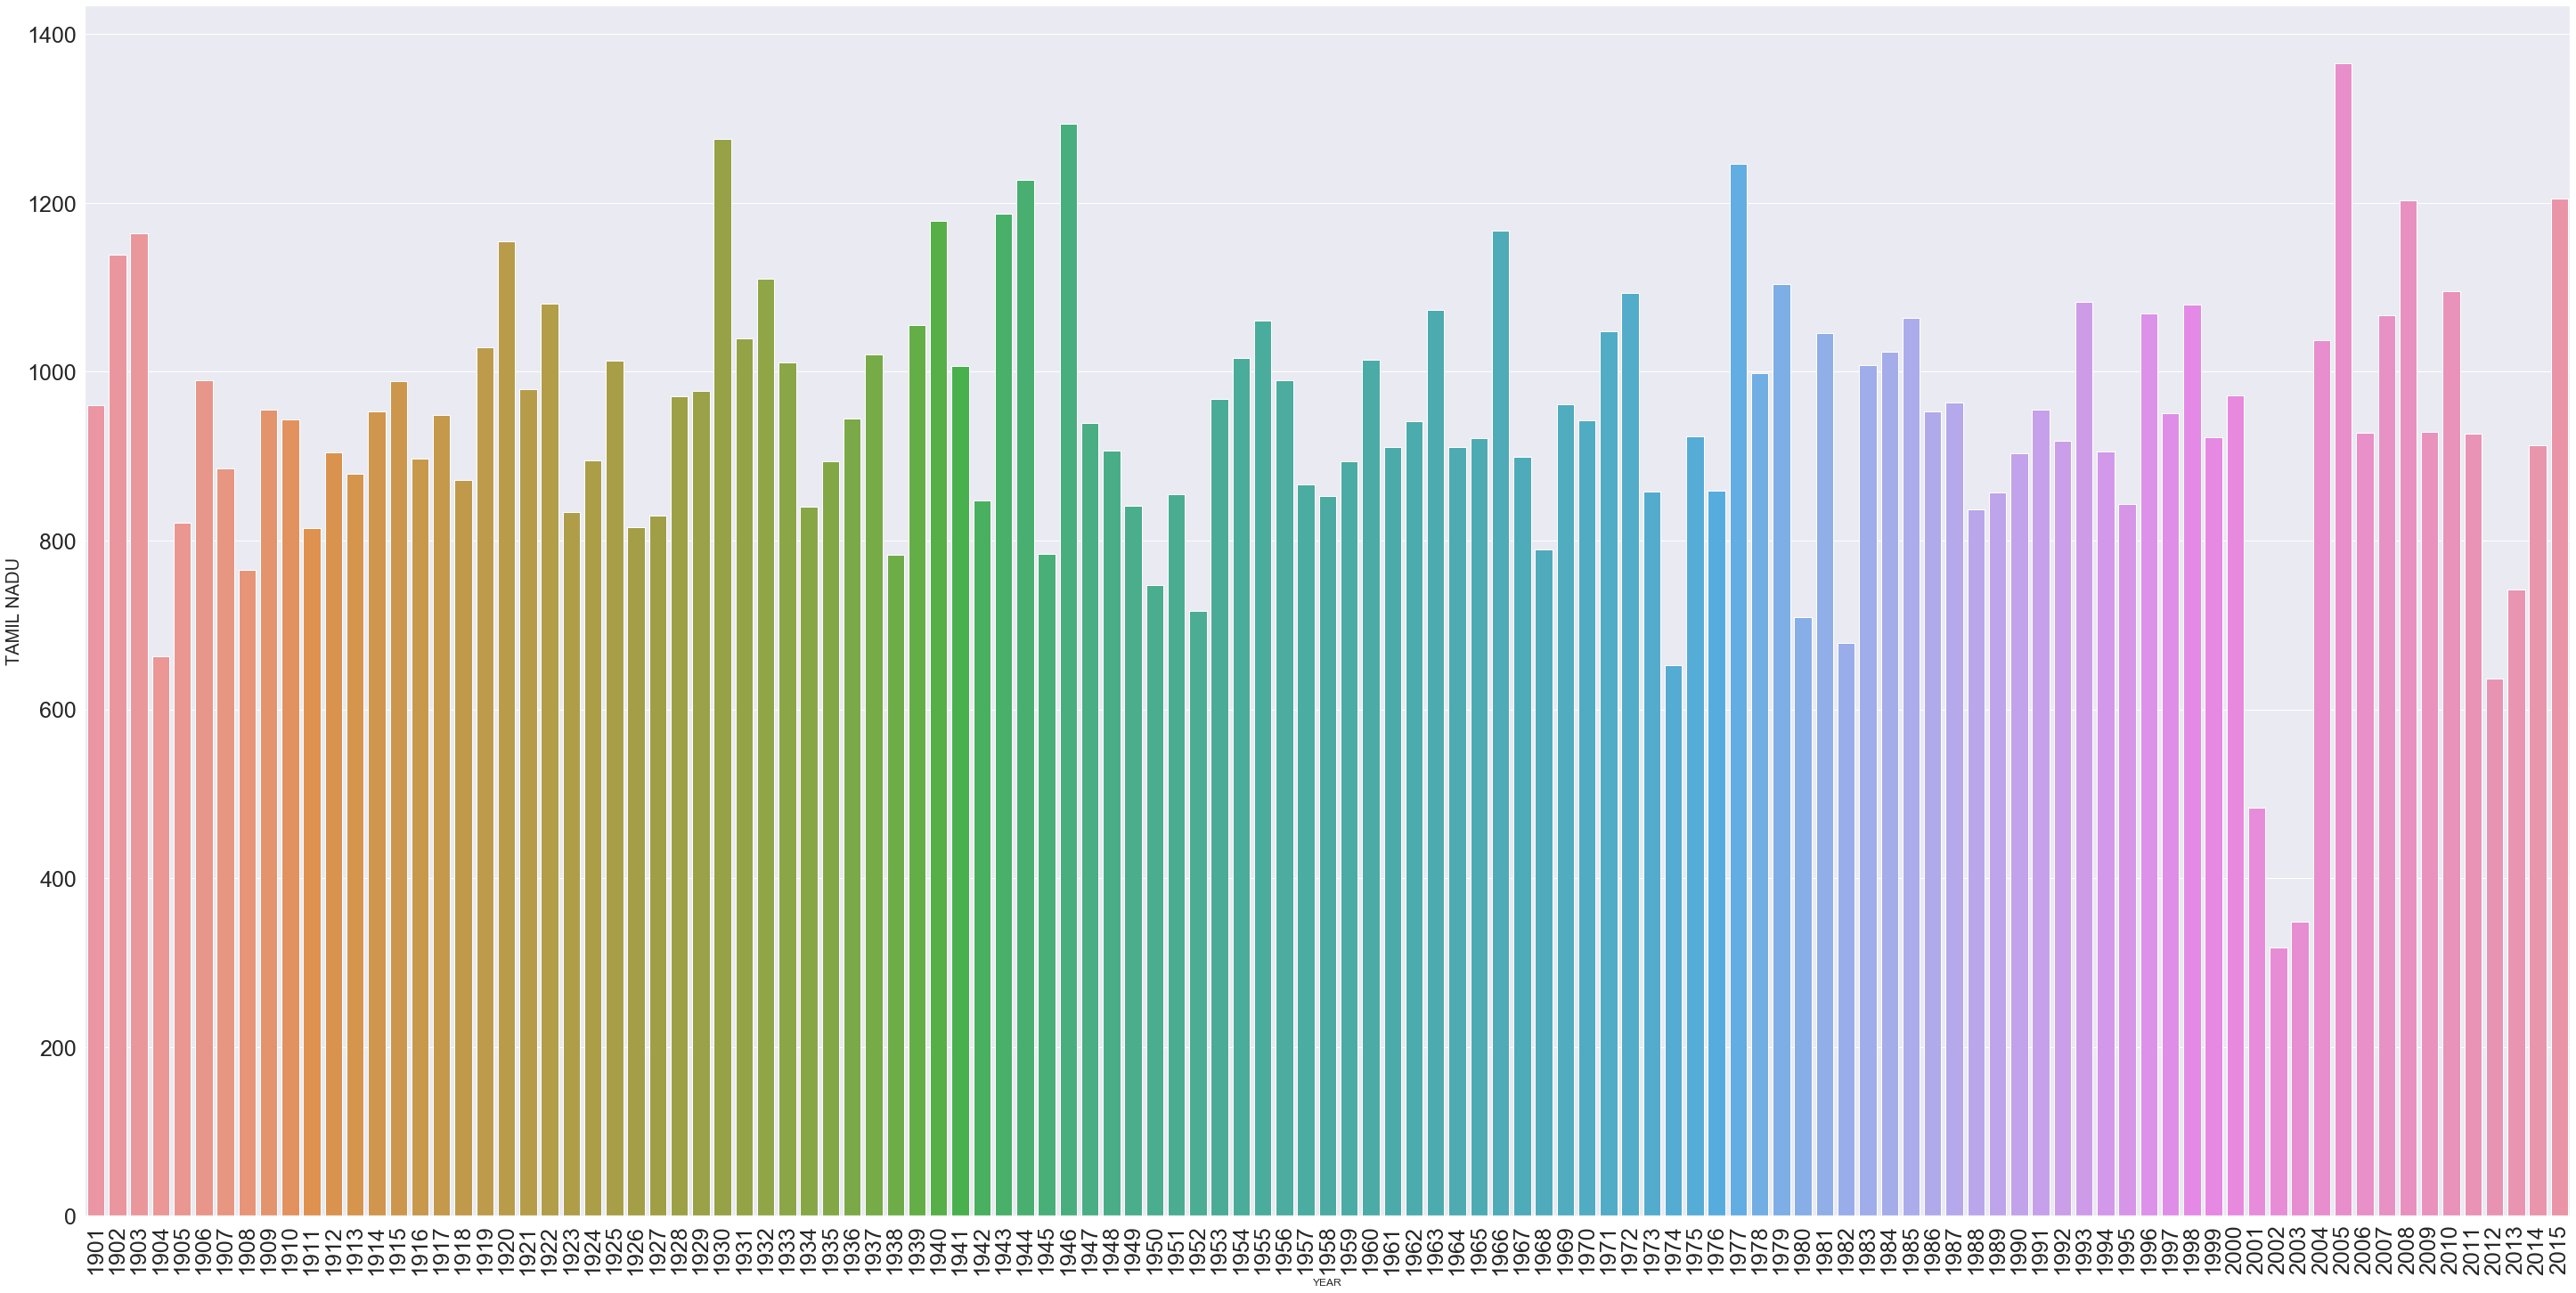

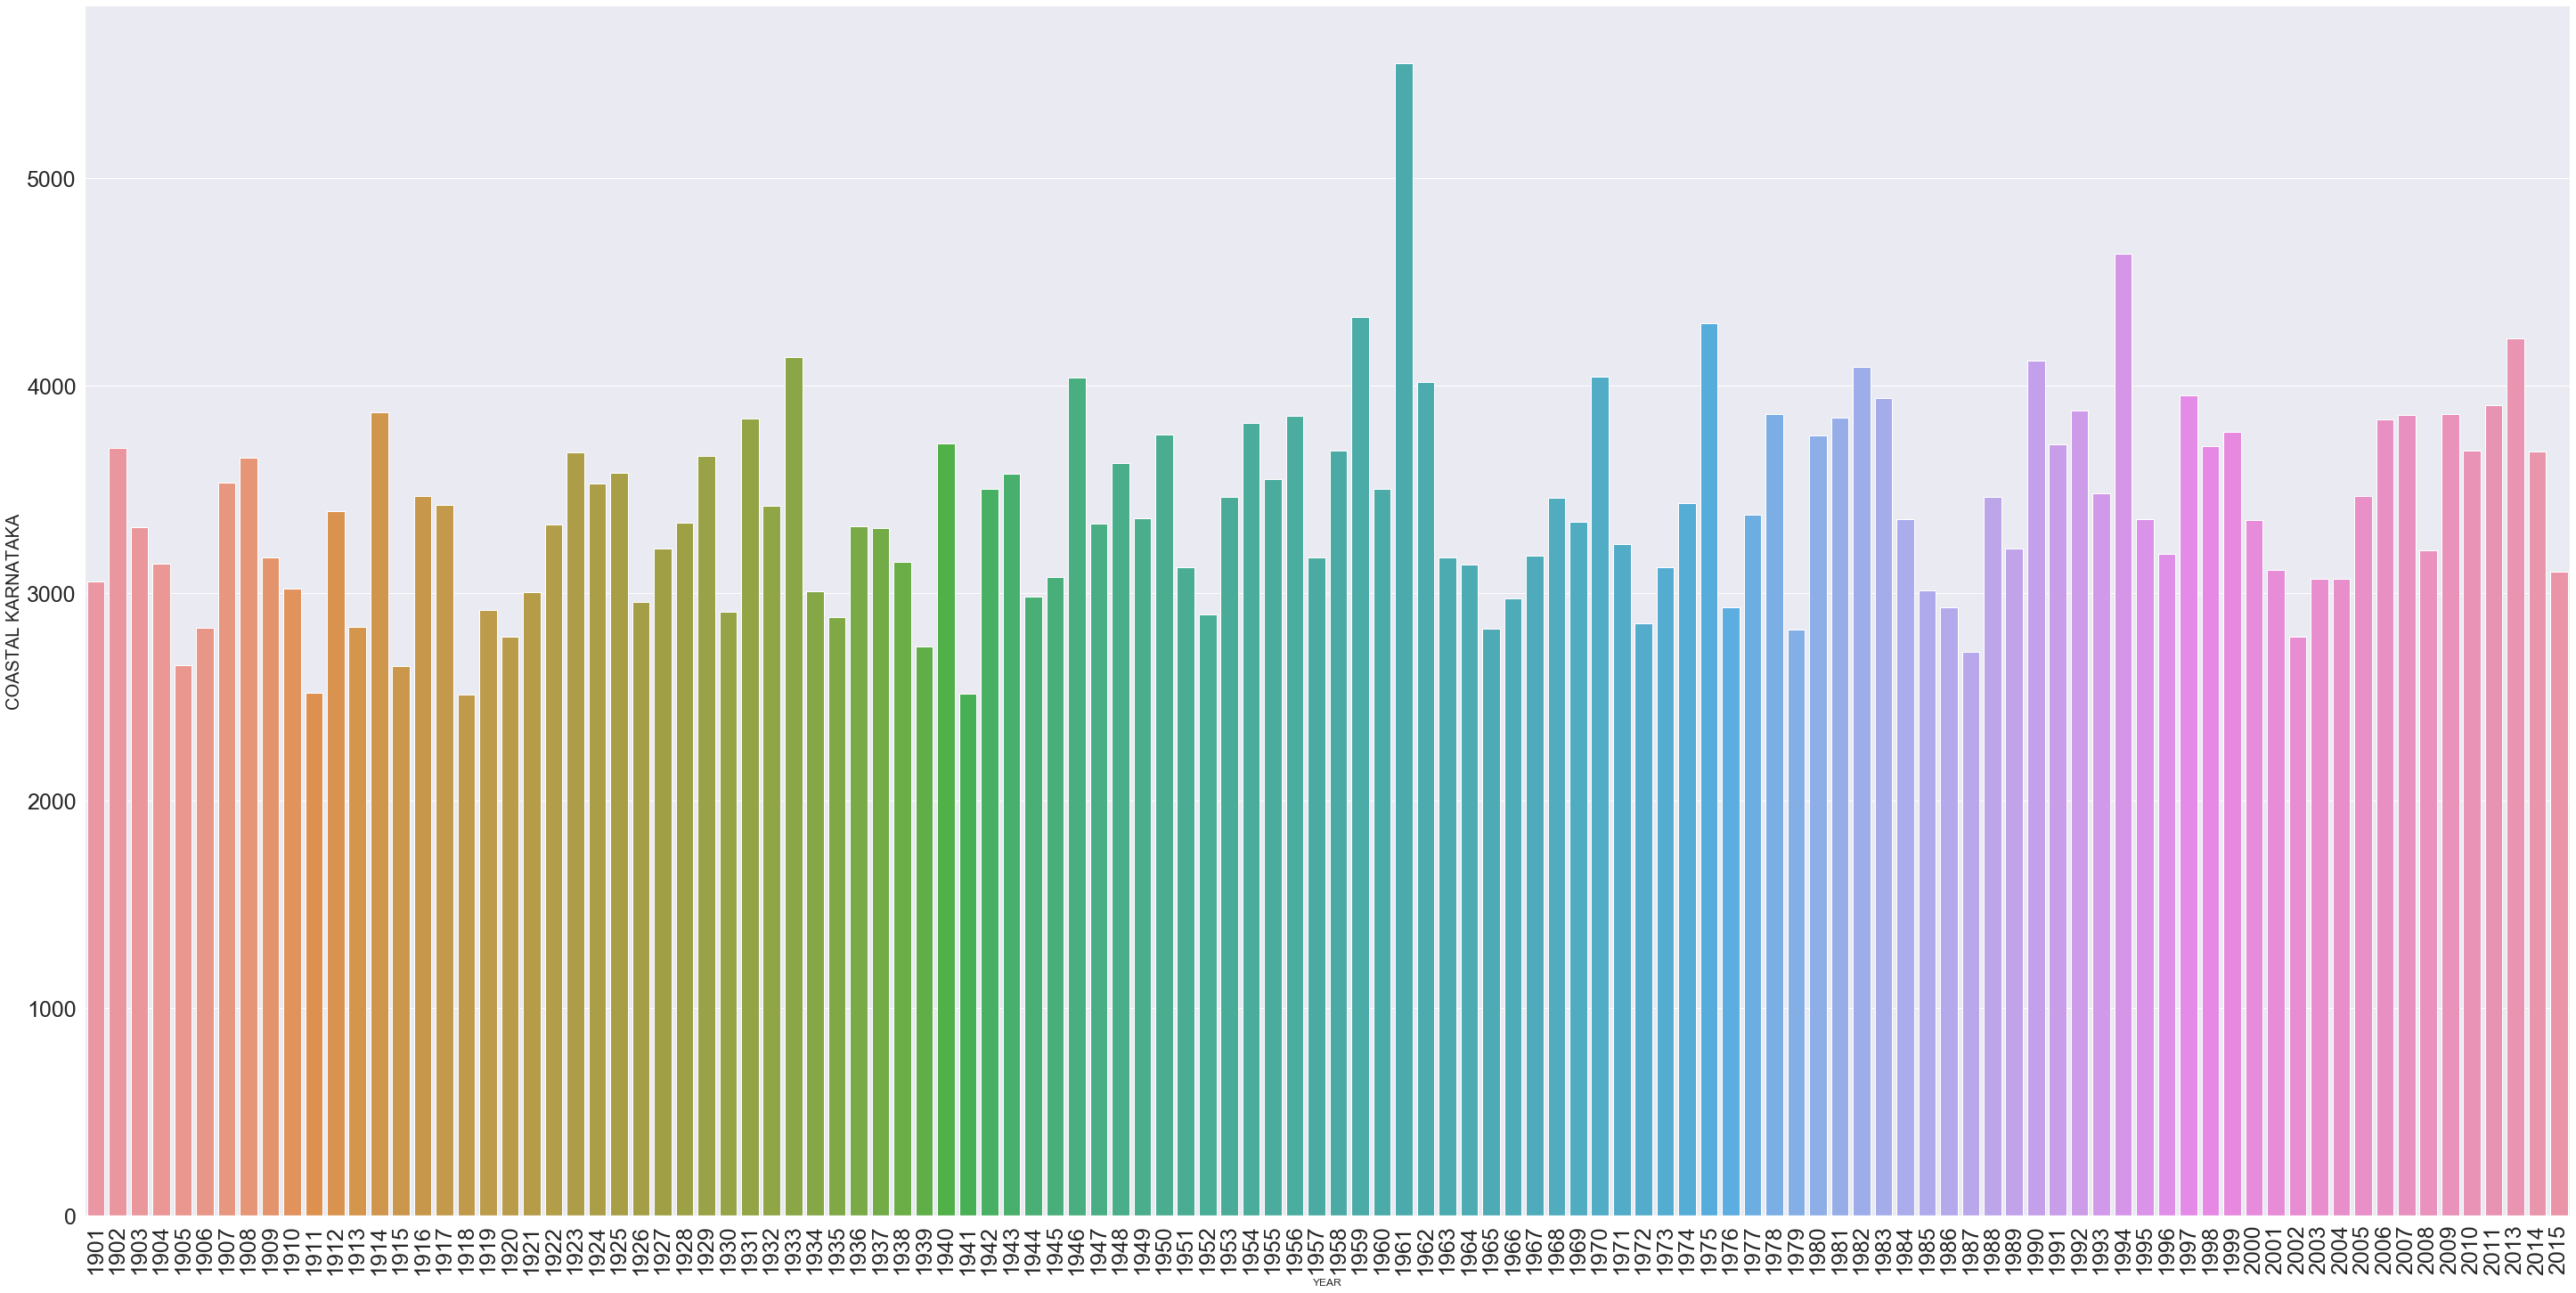

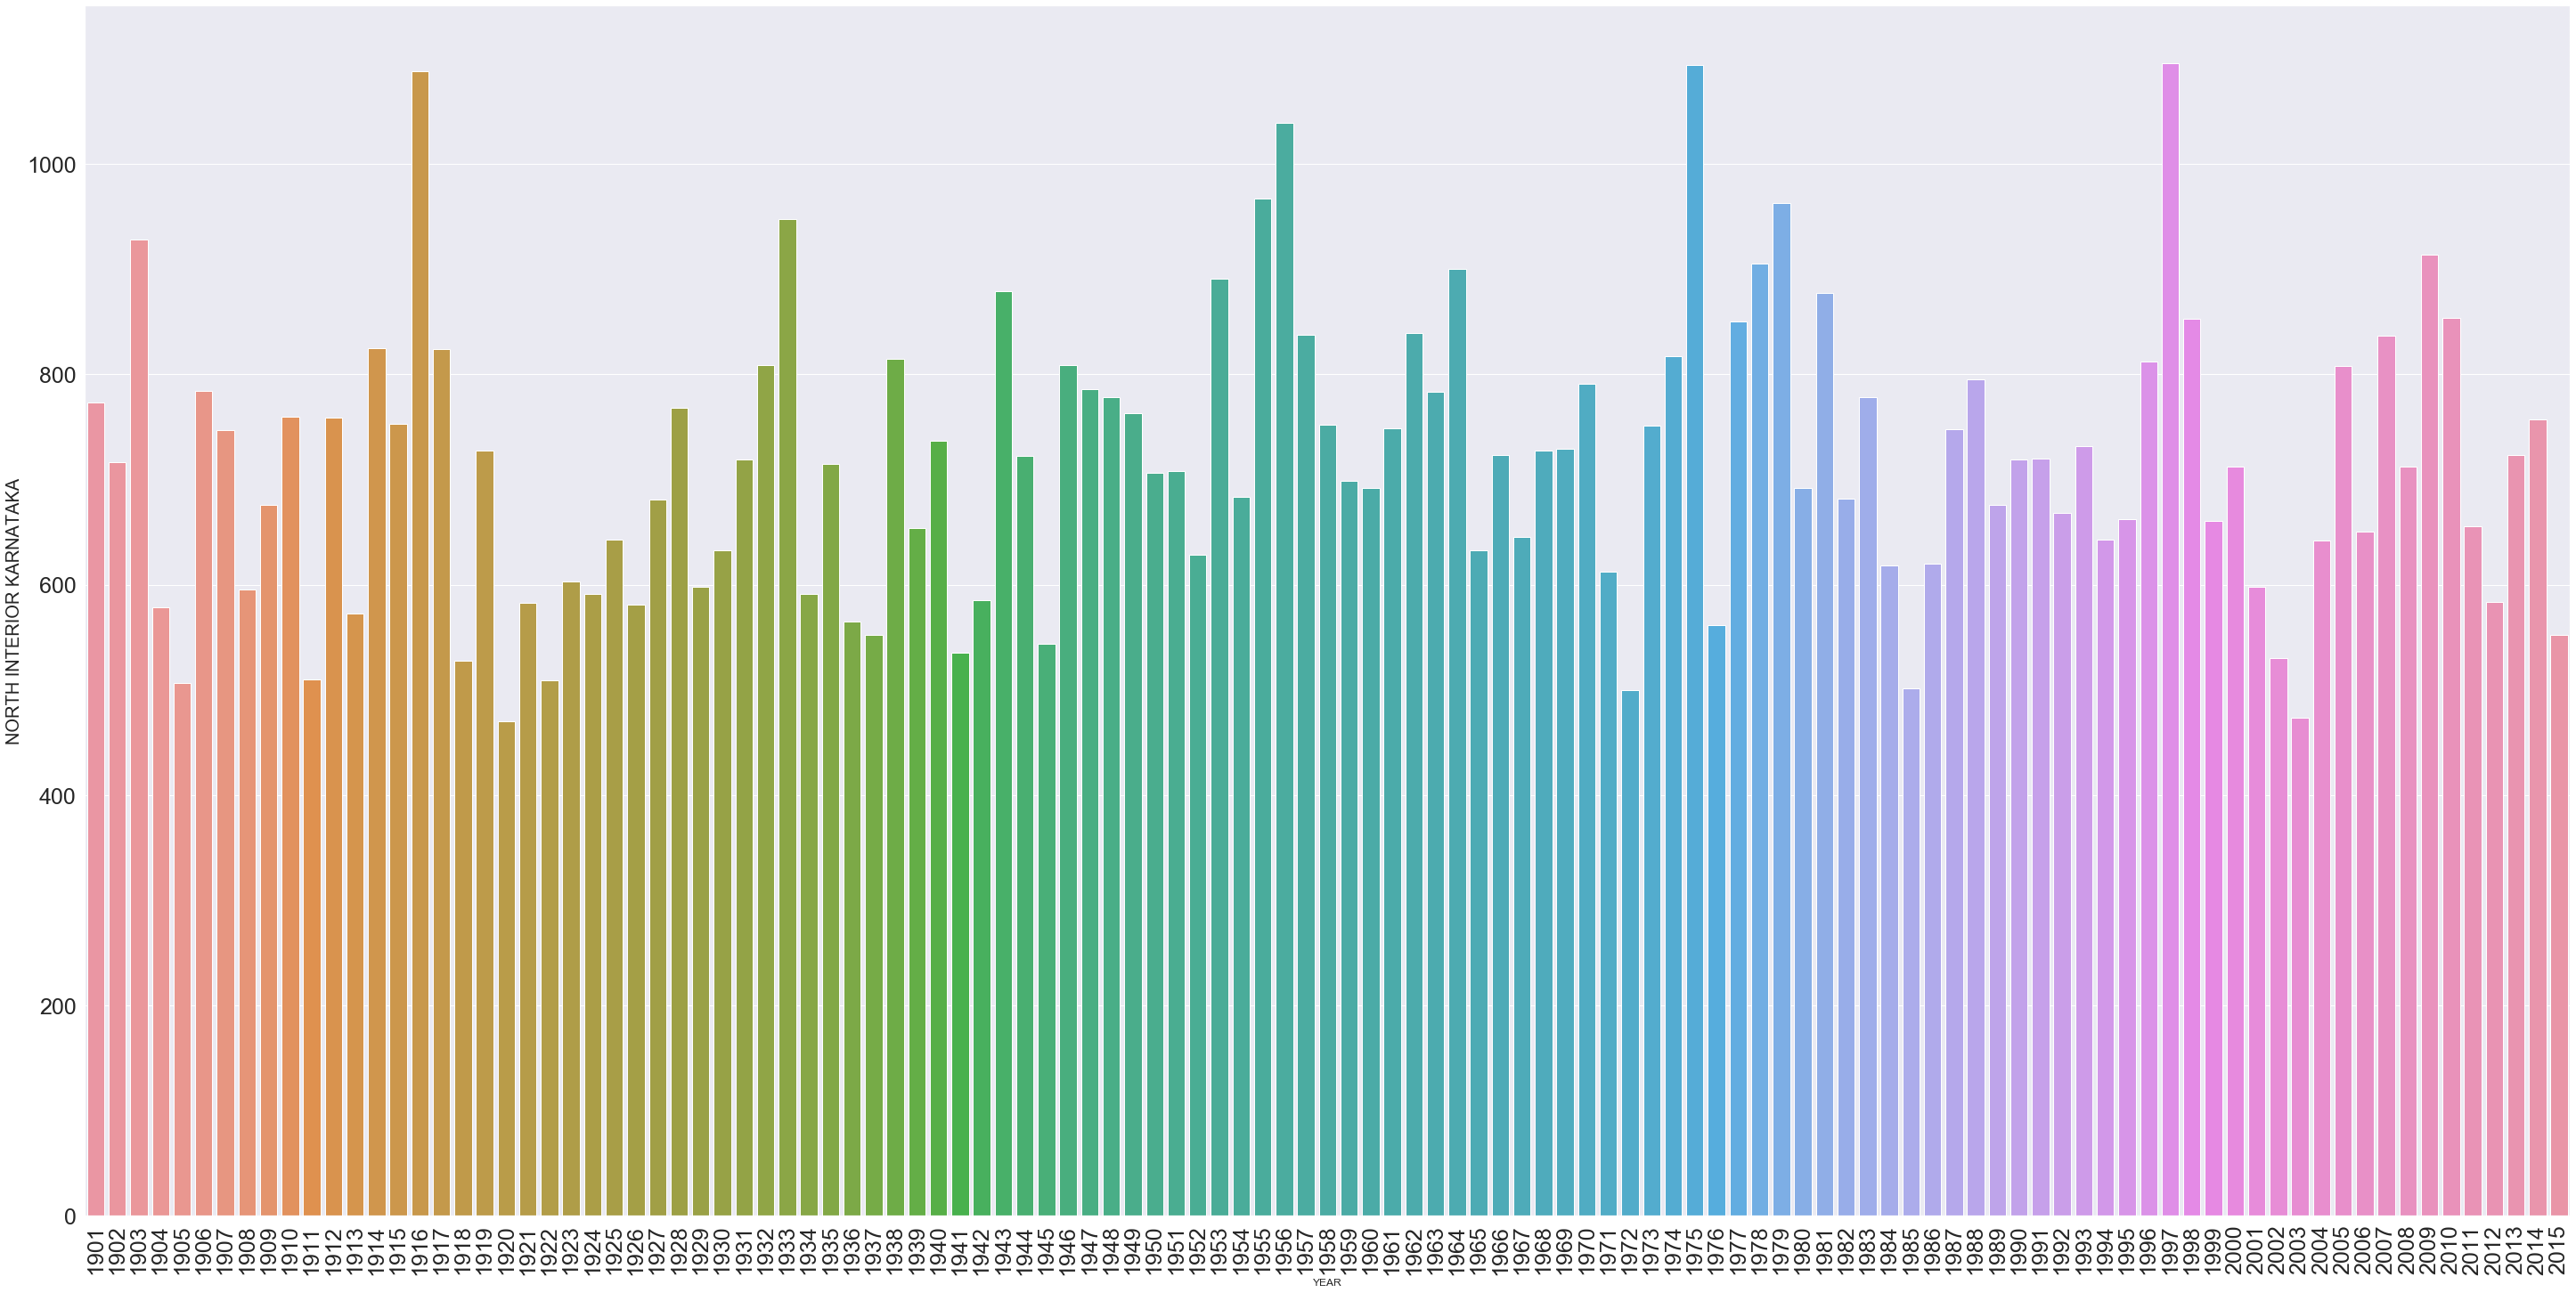

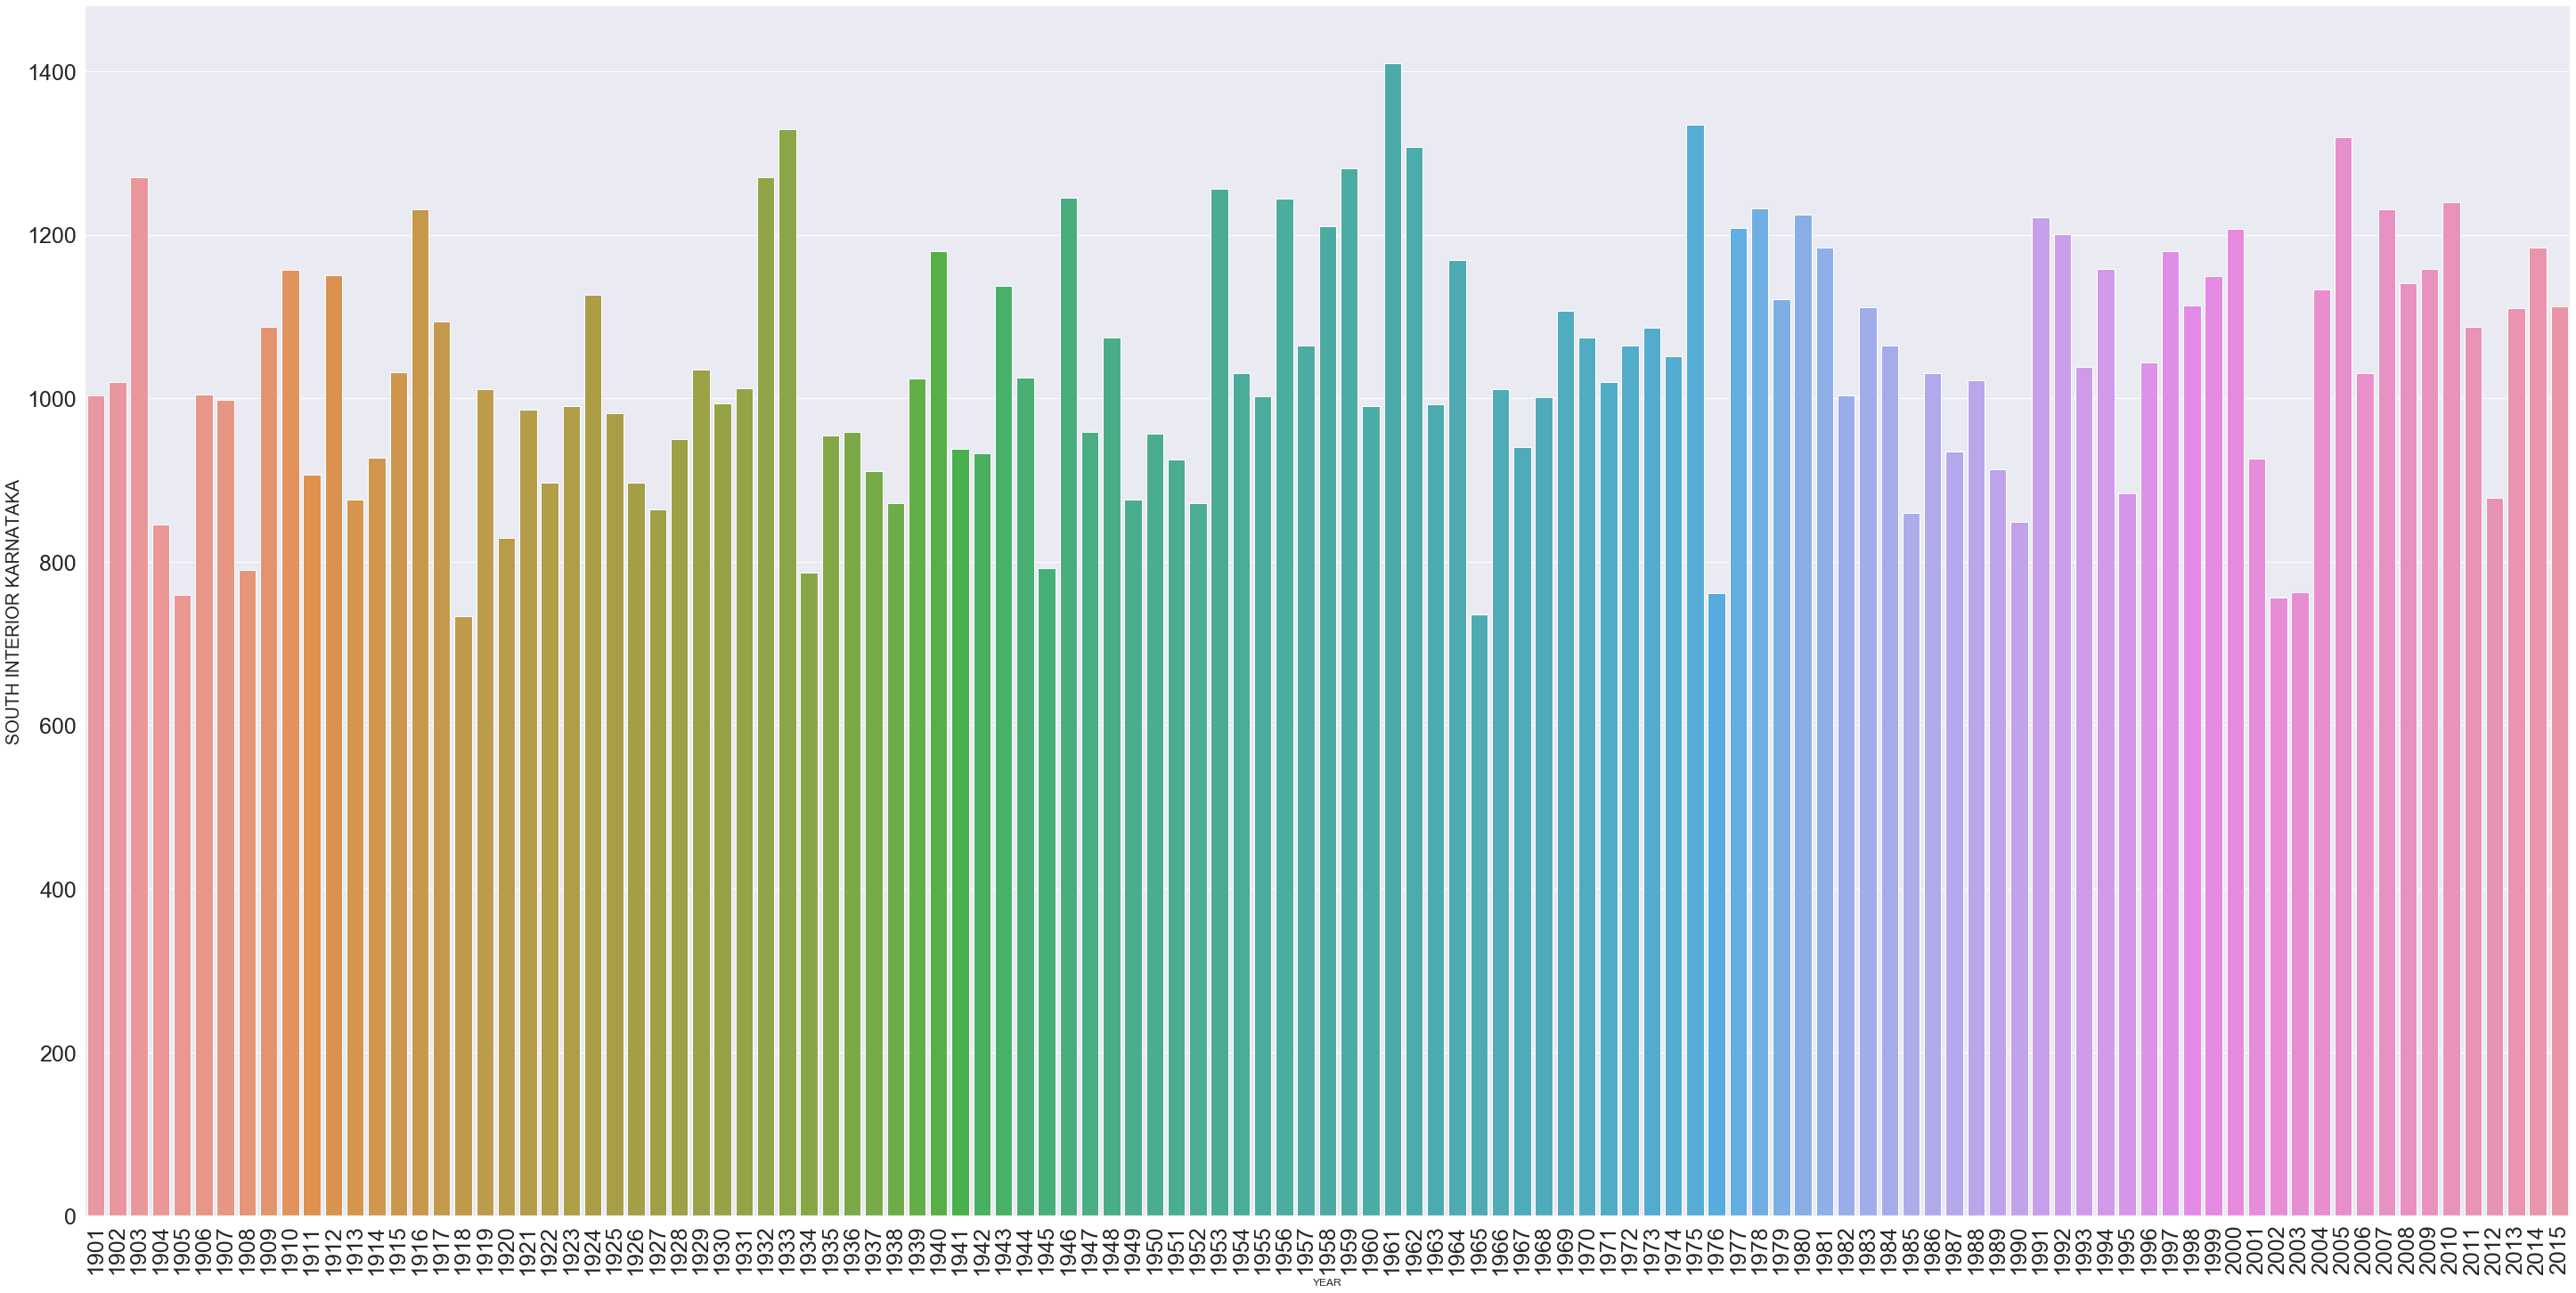

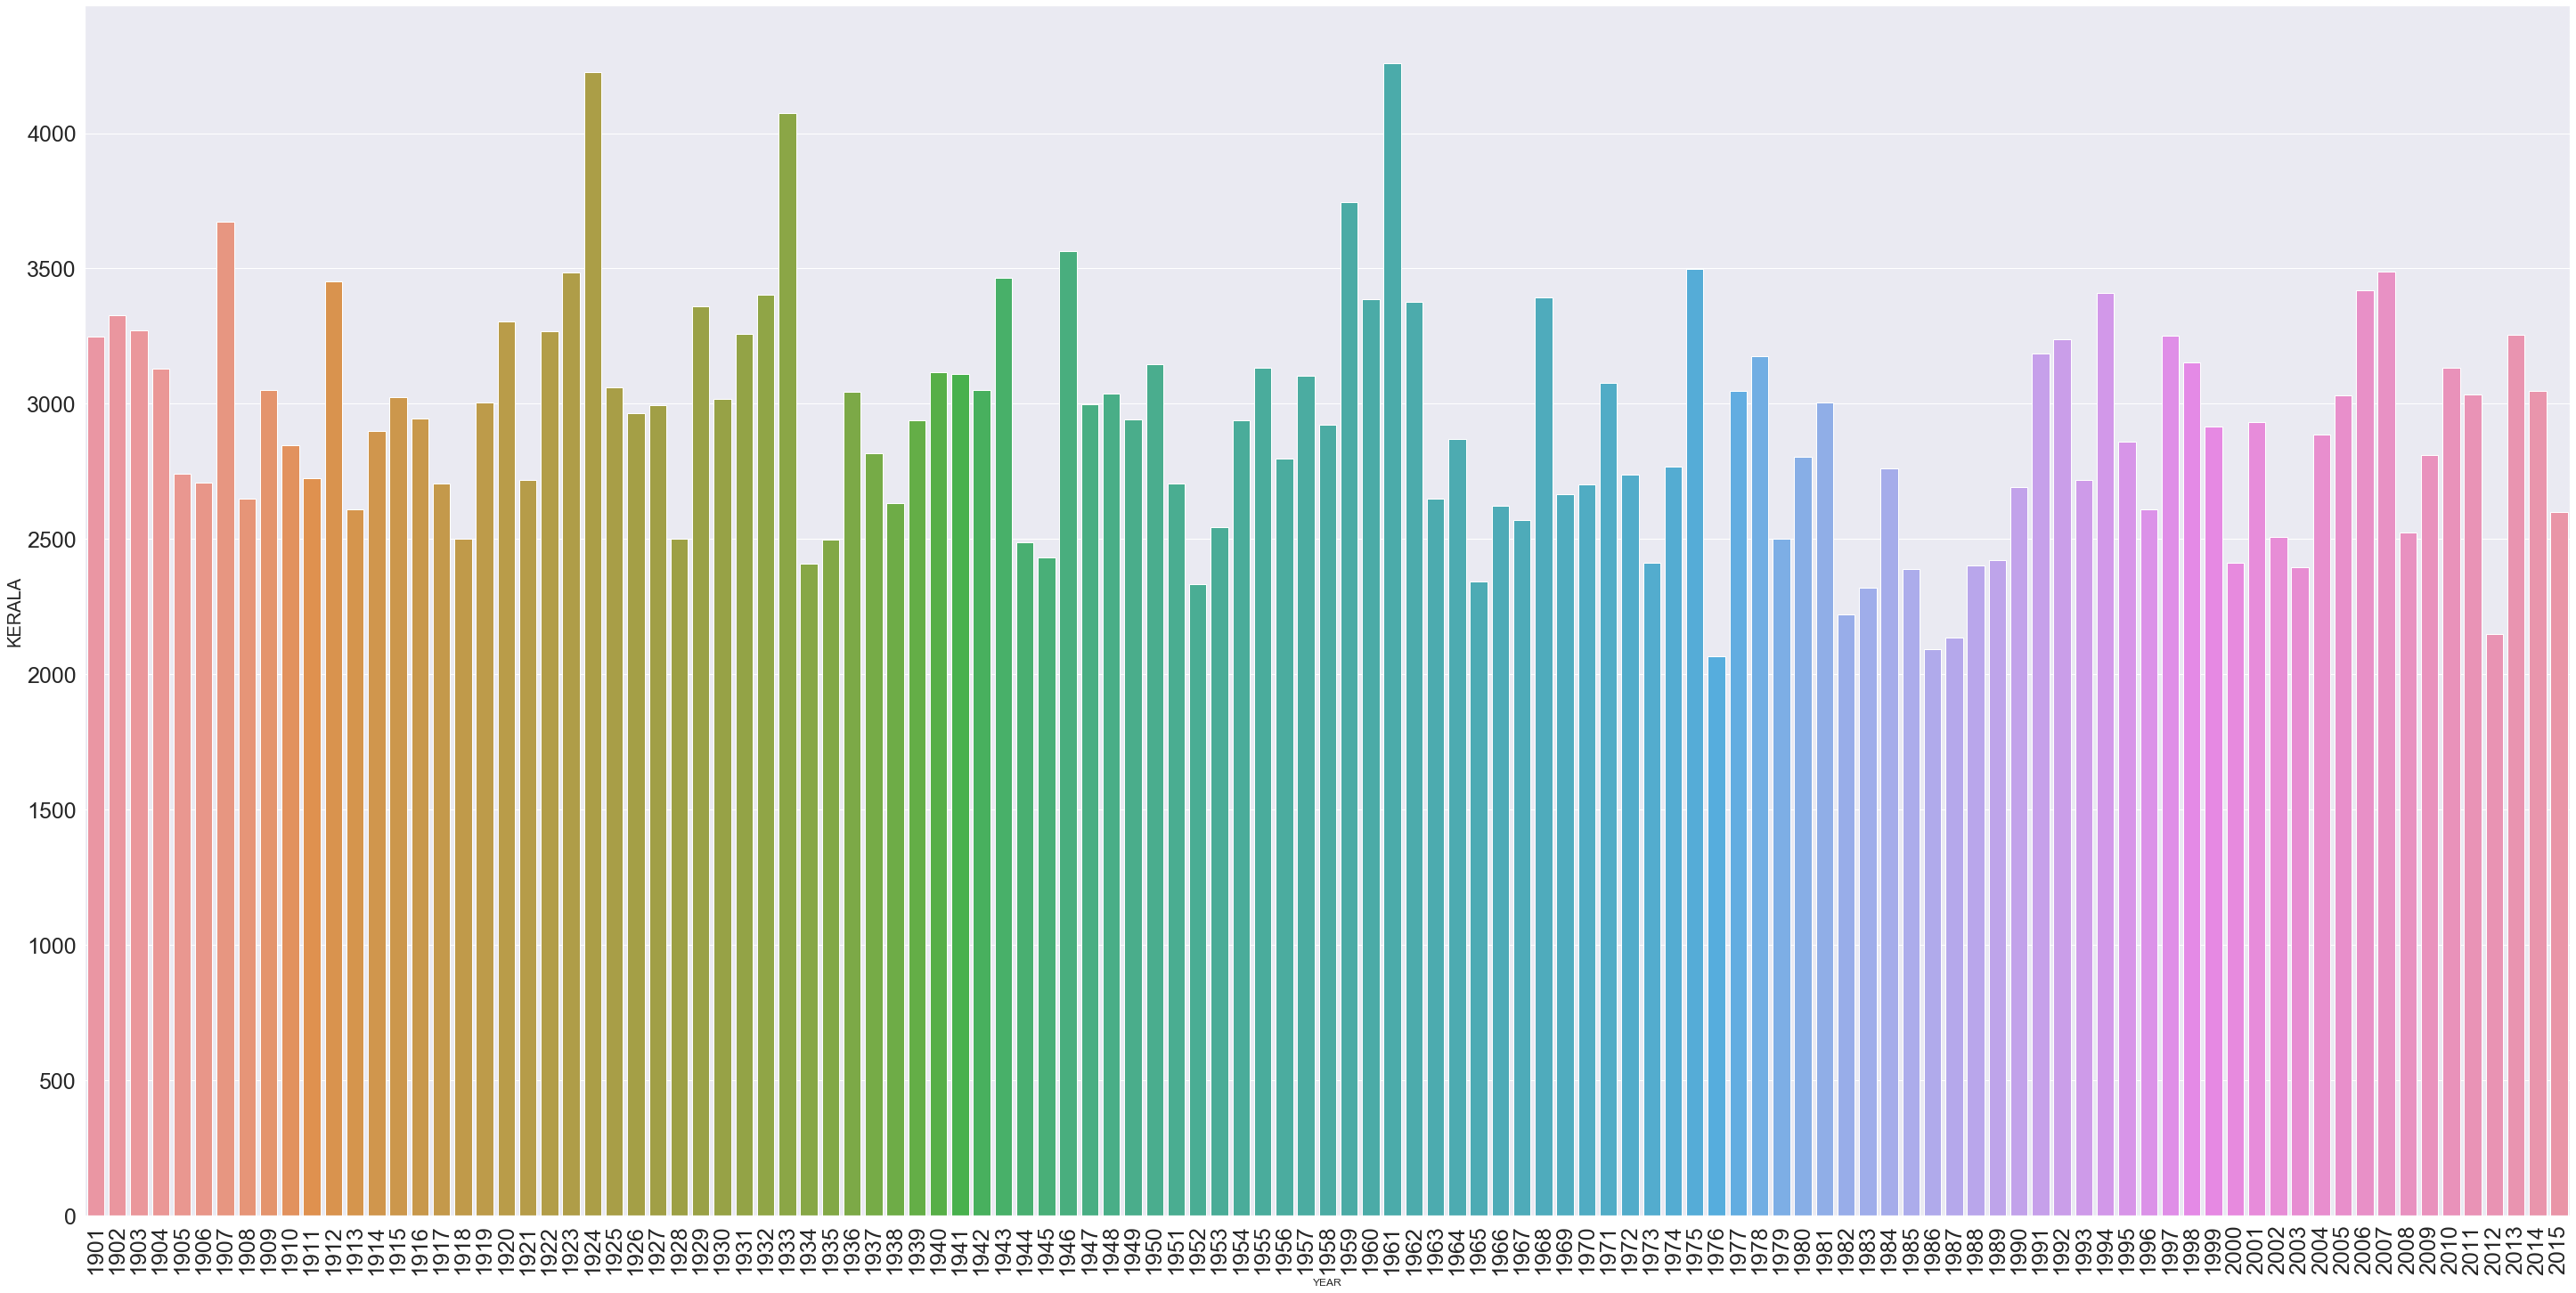

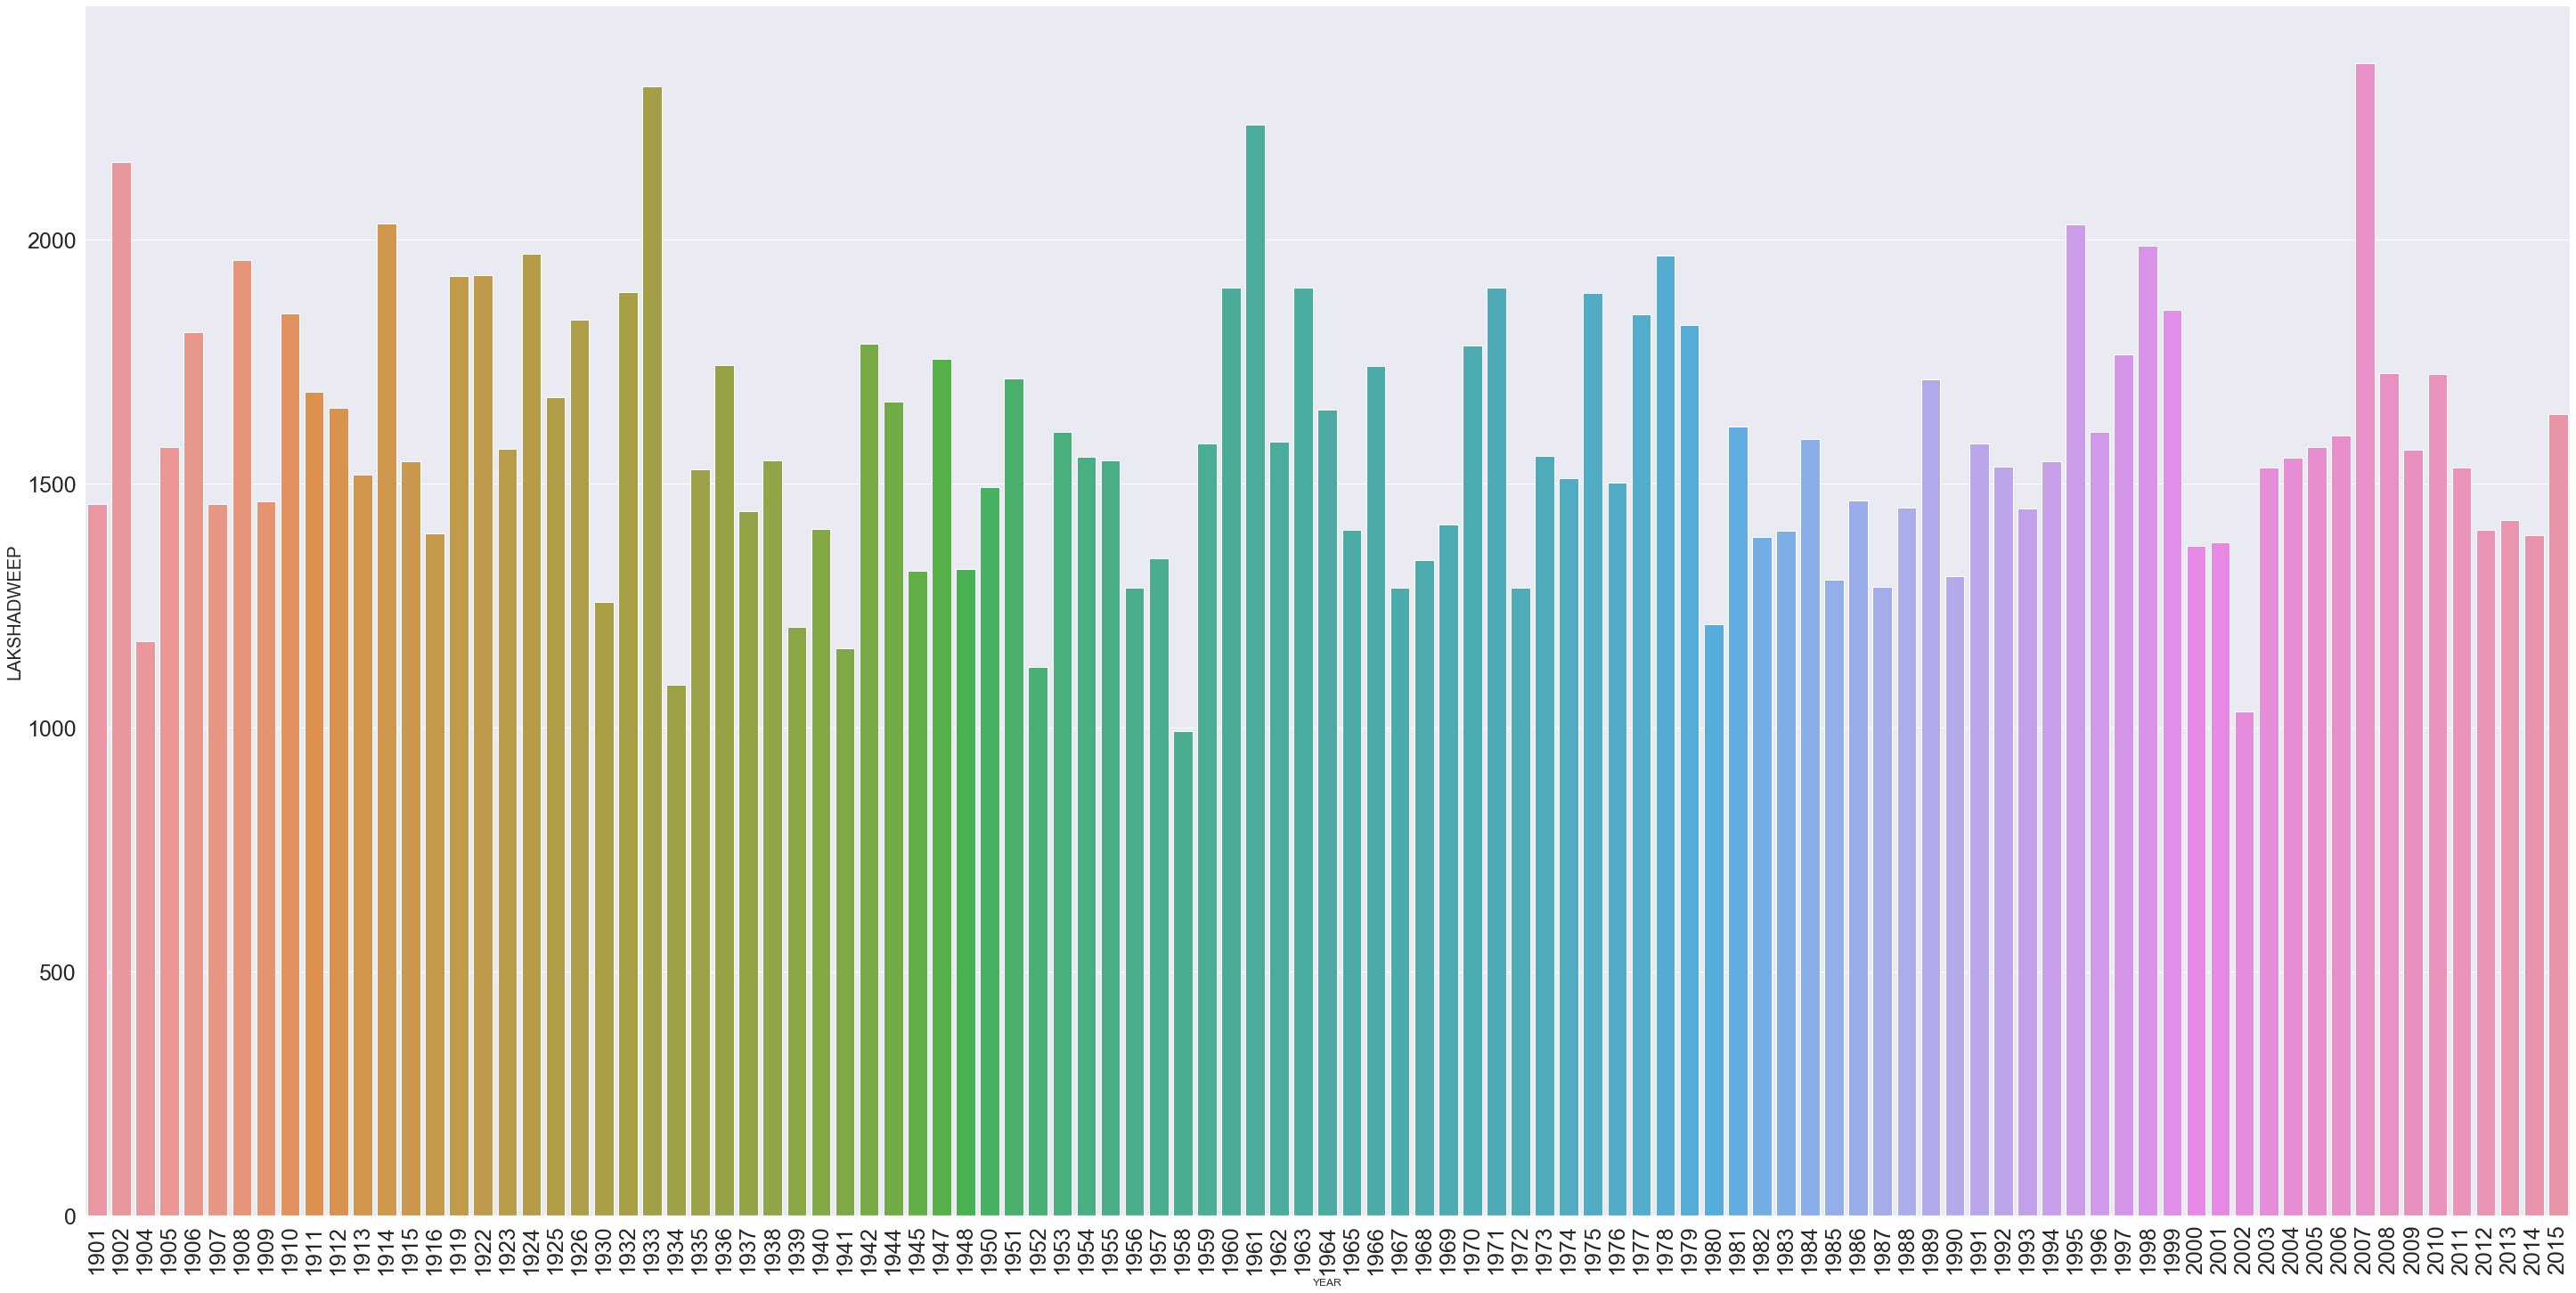

In [20]:
#now i have created a loop in which i have subsetted the data according to unique names i found out in the subdivision section.
#and i have plotted the annual rainfall from the year (1901-2015) for each state.
for i in range(0,36):
  subset_data = data_cleaned[data_cleaned.SUBDIVISION==x_names[i]]
  plt.figure(figsize=(50,25))
  sns.barplot(subset_data['YEAR'],subset_data['ANNUAL'])
  plt.ylabel(x_names[i],fontsize=20)
  plt.rcParams.update({'font.size': 22})
  plt.xticks(rotation=90,fontsize=25)
  plt.yticks(fontsize=25)
  #plt.savefig('x[0].png')
  print(x_names[i])
    


# Data Findings
 

In [21]:
#From this analysis it is pretty clear that the states which are experiencing rapid development , their rainfall has subtainally
#decreased in comparison to other states which are not developing so fast. There is a strong corelation between Decreasing 
#rainfall and rapid development.

In [22]:
#Now i have put all the unique years in a array
alltheyears =data_cleaned.YEAR.unique()

In [23]:
#Here i have the sorted the array using sort function. And i created a Empty pandas dataframe with columns of Statename ,
#annual yearfall and the year corresponding to it.
alltheyears.sort()
df1=pd.DataFrame(columns=['SUBDIVISION','ANNUAL','YEAR'])
alltheyears

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [24]:
#In this loop i have a excrated maximum annual rainfall from each year and put it in the empty dataframe created earlier.
for i in range(len(alltheyears)):
 max_data =data_cleaned[data_cleaned.YEAR==alltheyears[i]]
 y=max_data.loc[max_data['ANNUAL'].idxmax()]
 new_data=y[['SUBDIVISION','ANNUAL','YEAR']]
 df=pd.DataFrame([new_data],columns=['SUBDIVISION','ANNUAL','YEAR'])
 df1=df1.append(df,ignore_index=True)


 

In [26]:
#AS you can see dataframe is sorted according to the years and maximum rainfall.

df1
  


,SUBDIVISION,ANNUAL,YEAR
0,ANDAMAN & NICOBAR ISLANDS,3373.2,1901
1,COASTAL KARNATAKA,3699.2,1902
2,COASTAL KARNATAKA,3317.4,1903
3,COASTAL KARNATAKA,3141.1,1904
4,SUB HIMALAYAN WEST BENGAL & SIKKIM,3005.0,1905
...,...,...,...
110,COASTAL KARNATAKA,3908.6,2011
111,ANDAMAN & NICOBAR ISLANDS,3497.6,2012
112,COASTAL KARNATAKA,4229.4,2013
113,COASTAL KARNATAKA,3684.4,2014


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text yticklabel objects>)

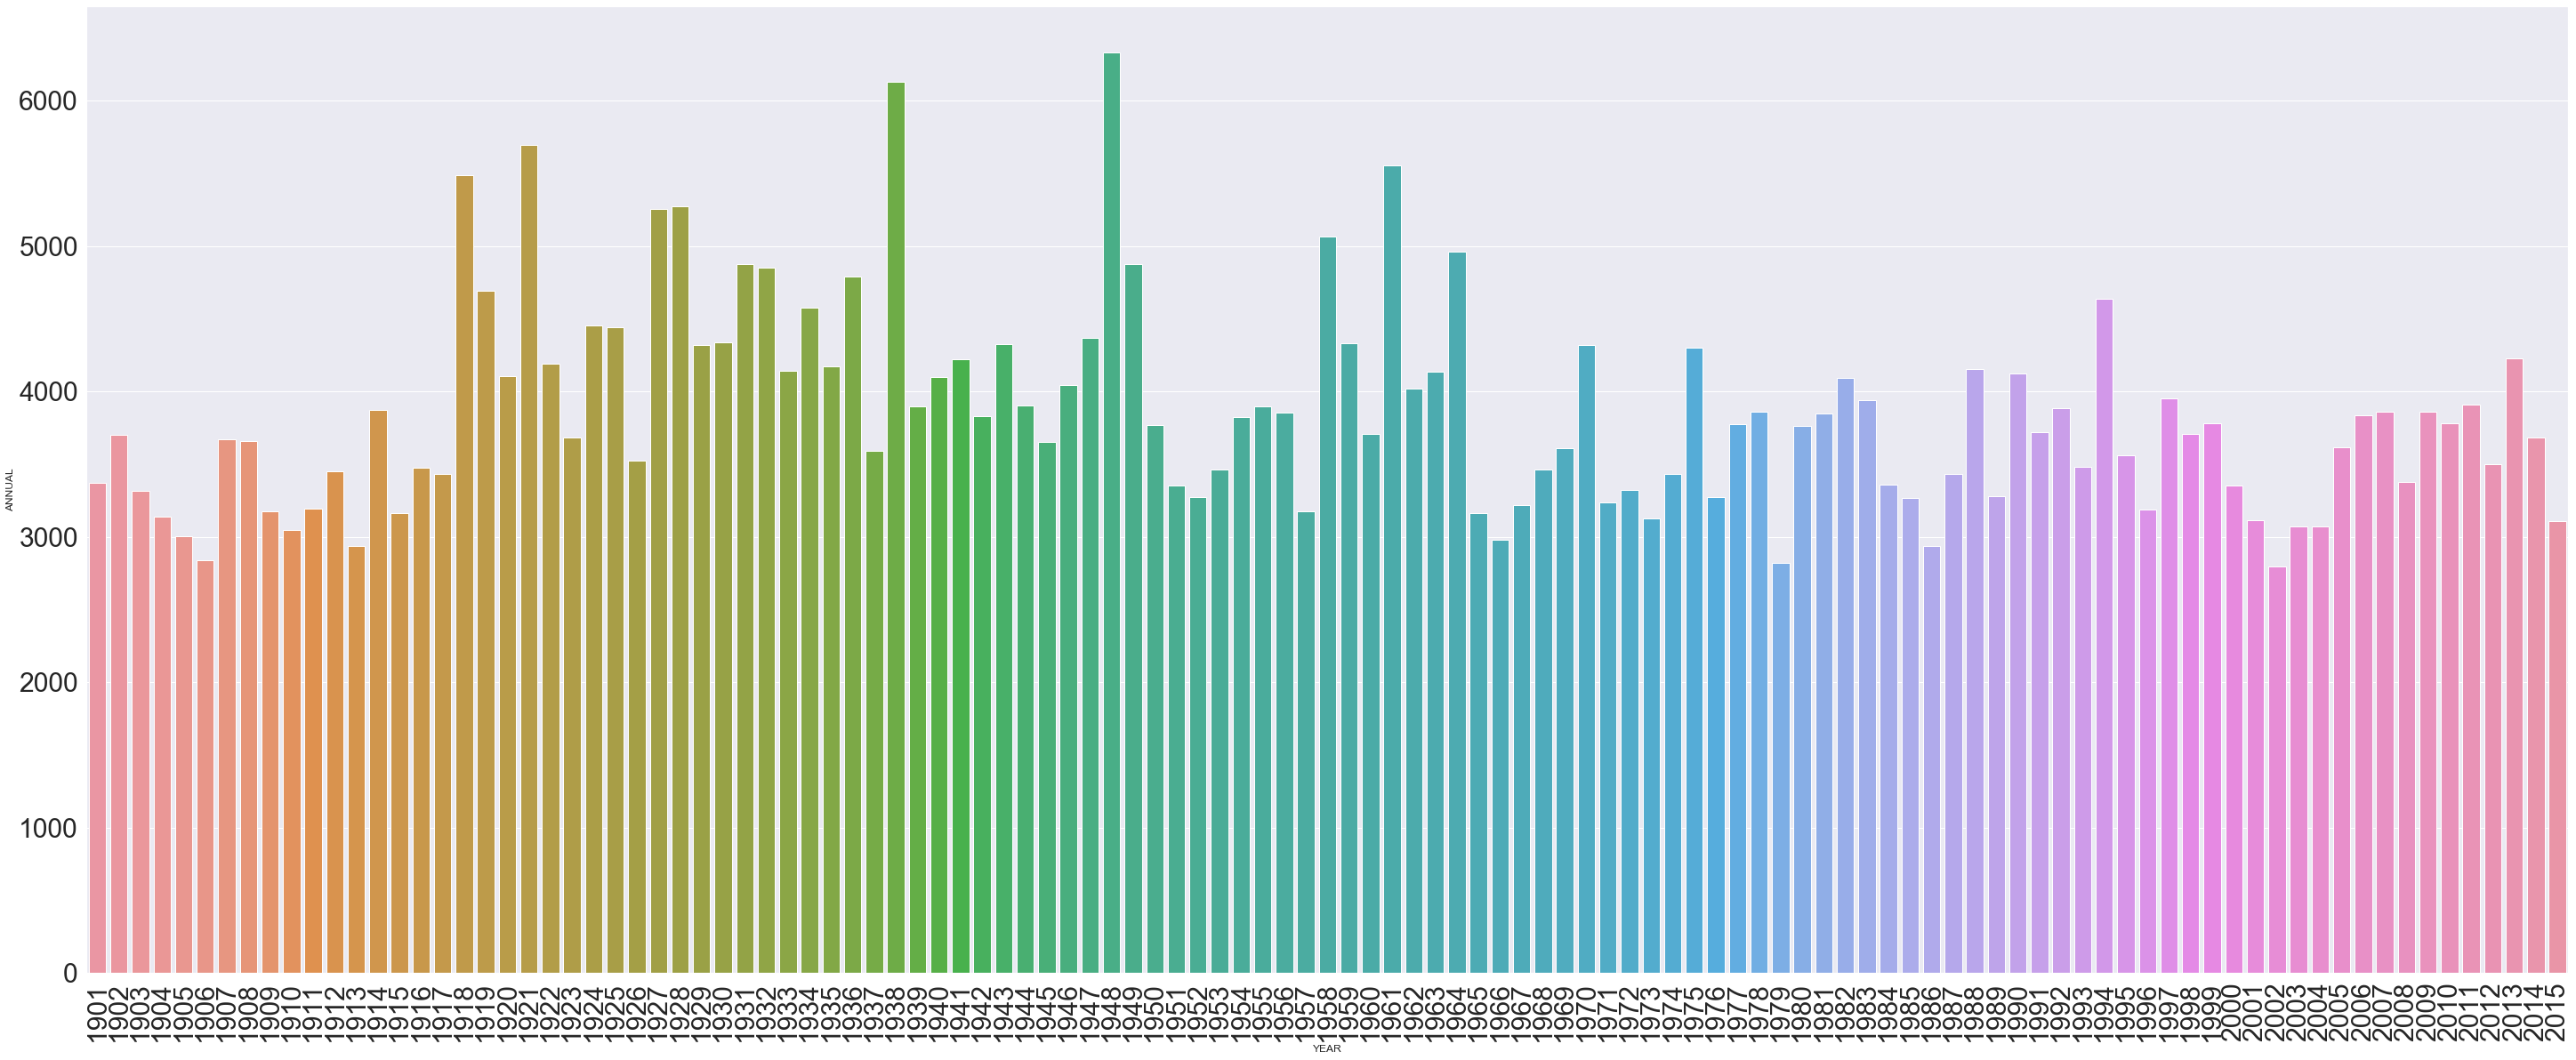

In [41]:
#now basically I have plotted the maximum rainfall in india for each year.
plt.figure(figsize=(50,20))
pp=sns.barplot(df1['YEAR'],df1['ANNUAL'])
#plt.ylabel(x[i],fontsize=20)
pp.set_xlabel('YEAR')
plt.rcParams.update({'font.size': 80})
plt.xticks(rotation=90,fontsize=30)
plt.yticks(fontsize=30)

# Rainfall Predicition for Every State (Andaman and Nicobar Islands)


In [42]:
data_set= data_cleaned[data_cleaned.SUBDIVISION==x_names[0]] 
req_data= data_set[['ANNUAL','YEAR']]
x=req_data['YEAR'].values.reshape(-1,1)
y=req_data['ANNUAL'].values.reshape(-1,1)


# Train Split Test



In [45]:
# importing  
from sklearn.model_selection import train_test_split
# Split the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)


In [46]:
regressor = LinearRegression()
model=regressor.fit(x_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

[5926.14745426]
[[-1.54312727]]


In [48]:
y_pred =model.predict(x_test)

In [49]:
pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
pred

,Actual,Predicted
0,3075.1,2947.911814
1,2991.1,2881.557341
2,2957.4,2989.576251
3,2962.0,2880.014214
4,2755.1,2844.522287
5,3025.0,2901.617996
6,3275.0,2966.429342
7,3828.0,2822.918505
8,2762.8,2889.272978
9,2507.2,2906.247378


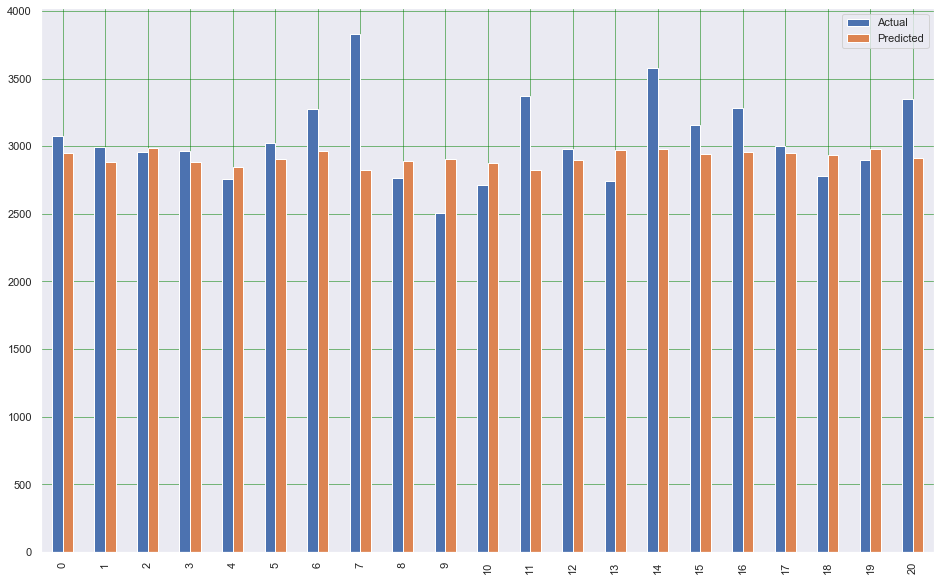

In [50]:
pred.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [51]:
x_new=[[2020]]
print(model.predict(x_new))

[[2809.03035959]]


# Rainfall Predicition for Every State (ARUNACHAL PRADESH)




In [60]:
data_set_1= data_cleaned[data_cleaned.SUBDIVISION==x_names[1]] 
req_data1= data_set_1[['ANNUAL','YEAR']]
x1=req_data1['YEAR'].values.reshape(-1,1)
y1=req_data1['ANNUAL'].values.reshape(-1,1)


# Train Split Test


In [61]:

# Split the variables with an 80-20 split and some random state
x_train1, x_test1, y_train1, y_test1= train_test_split(x1,y1, test_size=0.2, random_state=0)


In [62]:

model1=regressor.fit(x_train1,y_train1)


In [63]:
#To retrieve the intercept:
print(model1.intercept_)
#For retrieving the slope:
print(model1.coef_)

[57524.06308589]
[[-27.4823136]]


In [64]:
y_pred1 =model1.predict(x_test1)


In [65]:
pred1 = pd.DataFrame({'Actual': y_test1.flatten(), 'Predicted': y_pred1.flatten()})
pred1

,Actual,Predicted
0,4106.7,4758.020970
1,4872.1,4455.715520
2,2531.0,3164.046781
3,2209.6,3493.834544
4,2193.7,2257.130432
5,6331.1,3988.516189
6,1973.4,3383.905290
7,2139.0,3438.869917
8,3278.0,2999.152900
9,2767.5,2147.201178


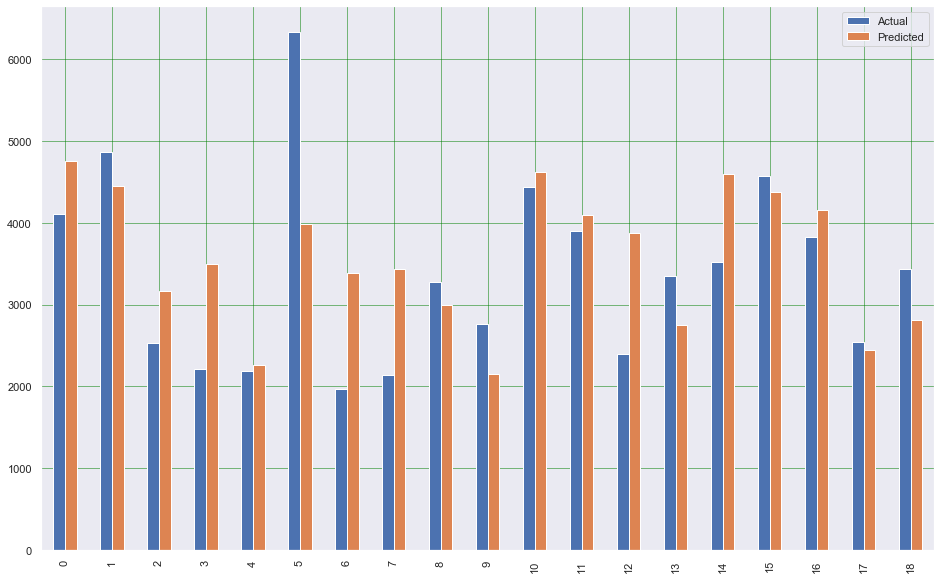

In [66]:
pred1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [67]:
x_new1 = [[2017]]

In [68]:
print(model1.predict(x_new1))

[[2092.23655066]]


# Rainfall Predicition for Every State (TAMIL NADU)

In [69]:
data_set_2= data_cleaned[data_cleaned.SUBDIVISION==x_names[30]] 
req_data2= data_set_2[['ANNUAL','YEAR']]
x2=req_data2['YEAR'].values.reshape(-1,1)
y2=req_data2['ANNUAL'].values.reshape(-1,1)


# TRAIN TEST SPLIT

In [70]:
# Split the variables with an 80-20 split and some random state
x_train2, x_test2, y_train2, y_test2= train_test_split(x2,y2, test_size=0.2, random_state=0)

In [72]:
model2=regressor.fit(x_train2,y_train2)
model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
#To retrieve the intercept:
print(model2.intercept_)
#For retrieving the slope:
print(model2.coef_)

[2132.50823712]
[[-0.60693022]]


In [74]:
y_pred2=model2.predict(x_test2)


In [75]:
pred2 = pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': y_pred2.flatten()})
pred2

,Actual,Predicted
0,814.9,972.664592
1,923.6,933.821058
2,899.1,938.676500
3,716.4,947.780453
4,765.0,974.485382
5,1103.4,931.393337
6,918.7,923.503244
7,903.2,924.717105
8,1067.2,914.399291
9,1072.8,941.104220


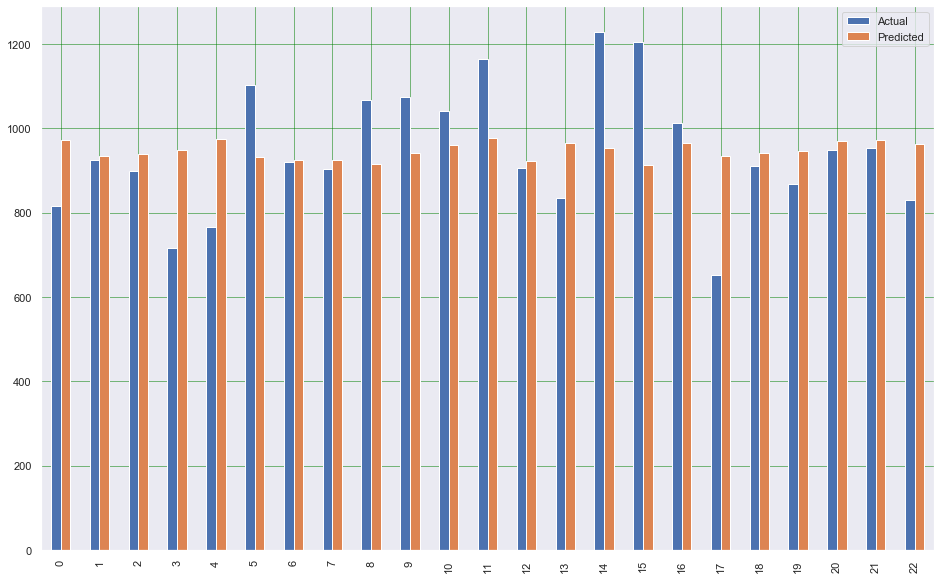

In [76]:
pred2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [77]:
x_new2 = [[2020]]


In [78]:
print(model2.predict(x_new2))

[[906.50919809]]


# Rainfall Predicition for Every State (KERELA)

In [79]:
data_set_3= data_cleaned[data_cleaned.SUBDIVISION==x_names[34]] 
req_data3= data_set_3[['ANNUAL','YEAR']]
x3=req_data3['YEAR'].values.reshape(-1,1)
y3=req_data3['ANNUAL'].values.reshape(-1,1)


# TEST TRAIN SPLIT

In [80]:
# Split the variables with an 80-20 split and some random state
x_train3, x_test3, y_train3, y_test3= train_test_split(x3,y3, test_size=0.2, random_state=0)

In [82]:
model3=regressor.fit(x_train3,y_train3)
model3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
#To retrieve the intercept:
print(model3.intercept_)
#For retrieving the slope:
print(model3.coef_)

[10113.91994111]
[[-3.67623016]]


In [84]:
y_pred3=model3.predict(x_test3)


In [85]:
pred3 = pd.DataFrame({'Actual': y_test3.flatten(), 'Predicted': y_pred3.flatten()})
pred3

,Actual,Predicted
0,2726.7,3088.644098
1,3498.4,2853.365367
2,2569.1,2882.775209
3,2334.8,2937.918661
4,2648.3,3099.672788
5,2503.0,2838.660447
6,3239.5,2790.869455
7,2693.1,2798.221915
8,3489.6,2735.726002
9,2651.1,2897.480129


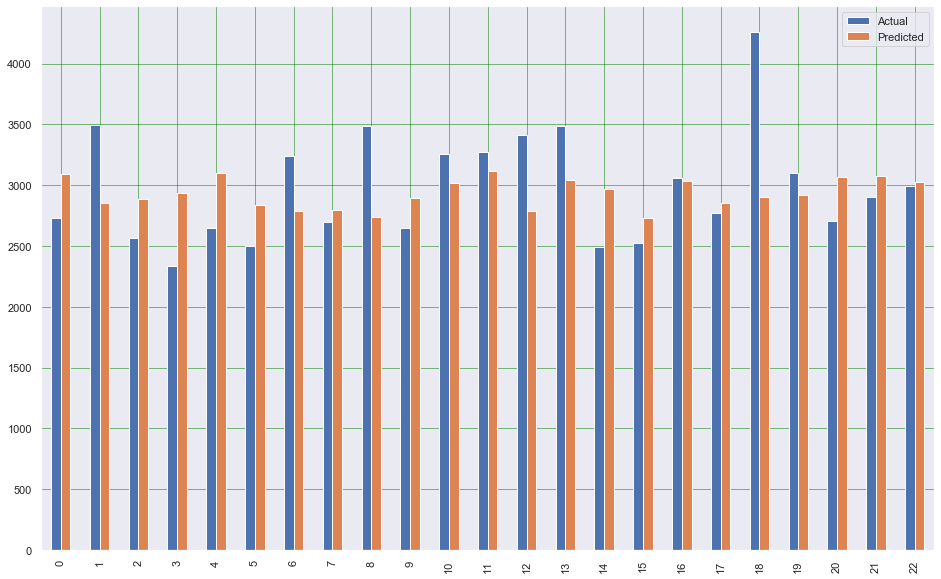

In [86]:
pred3.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [87]:
x_new3 = [[2018]]


In [88]:
print(model3.predict(x_new3))

[[2695.28747037]]


# Rainfall Predicition for Every State (UTTAR PRADESH)

In [89]:

data_set_a= data_cleaned[data_cleaned.SUBDIVISION==x_names[9]] 
data_set_b =data_cleaned[data_cleaned.SUBDIVISION==x_names[10]] 
data_set_a=data_set_a[['ANNUAL','YEAR']].reset_index(drop=True)
data_set_b=data_set_b[['ANNUAL']].reset_index(drop=True)
data_set_4  = pd.concat([data_set_a,data_set_b],axis=1,ignore_index=True)

data_set_4['ANNUAL']=data_set_4[0] +data_set_4[2]





In [90]:
x4=data_set_4[1].values.reshape(-1,1)
y4=data_set_4['ANNUAL'].values.reshape(-1,1)


# TRAIN TEST SPLIT

In [91]:
# Split the variables with an 80-20 split and some random state
x_train4, x_test4, y_train4, y_test4= train_test_split(x4,y4, test_size=0.2, random_state=0)

In [93]:
model4=regressor.fit(x_train4,y_train4)
model4

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
#To retrieve the intercept:
print(model4.intercept_)
#For retrieving the slope:
print(model4.coef_)

[7115.02908935]
[[-2.71975654]]


In [95]:
y_pred4=model4.predict(x_test4)

In [96]:
pred4= pd.DataFrame({'Actual': y_test4.flatten(), 'Predicted': y_pred4.flatten()})
pred4

,Actual,Predicted
0,1865.5,1917.574348
1,2215.0,1743.509929
2,2186.6,1765.267982
3,1811.2,1806.064330
4,1611.0,1925.733617
5,1254.5,1732.630903
6,1684.0,1697.274068
7,2064.1,1702.713581
8,1313.7,1656.477720
9,1926.0,1776.147008


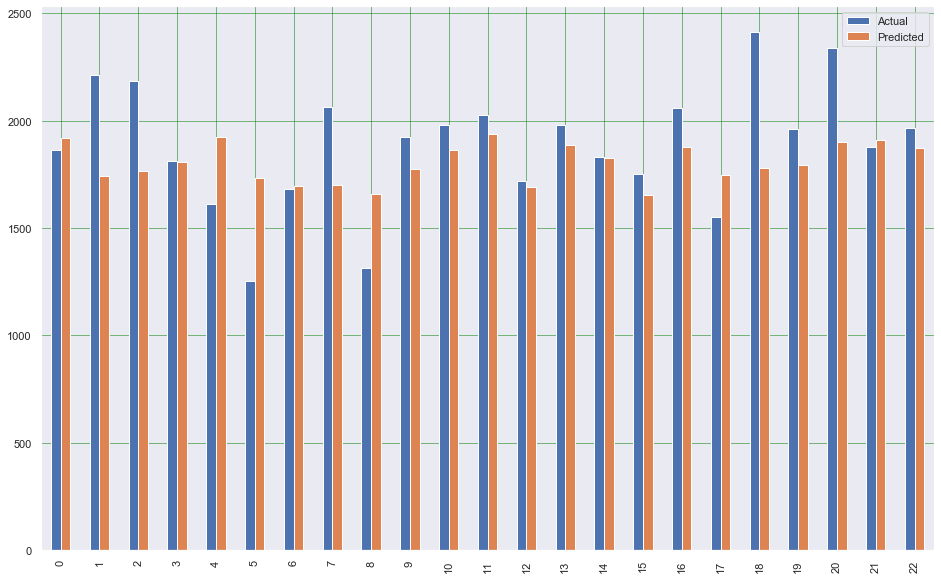

In [97]:
pred4.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [98]:
x_new4= [[2018]]


In [99]:
print(model4.predict(x_new4))

[[1626.56039837]]


# Rainfall Predicition for Every State (ASSAM AND MEGHLAYA)


In [100]:
data_set_5= data_cleaned[data_cleaned.SUBDIVISION==x_names[2]] 
req_data5= data_set_5[['ANNUAL','YEAR']]
x5=req_data5['YEAR'].values.reshape(-1,1)
y5=req_data5['ANNUAL'].values.reshape(-1,1)


# TRAIN TEST SPLIT

In [101]:
# Split the variables with an 80-20 split and some random state
x_train5, x_test5, y_train5, y_test5= train_test_split(x5,y5, test_size=0.2, random_state=0)

In [104]:
model5=regressor.fit(x_train5,y_train5)
model5

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
#To retrieve the intercept:
print(model5.intercept_)
#For retrieving the slope:
print(model5.coef_)

[8246.55713663]
[[-2.8840301]]


In [106]:
y_pred5=model5.predict(x_test5)

In [107]:
pred5= pd.DataFrame({'Actual': y_test5.flatten(), 'Predicted': y_pred5.flatten()})
pred5

,Actual,Predicted
0,3096.2,2735.175625
1,2270.6,2550.597699
2,2123.4,2573.669940
3,2851.3,2616.930391
4,2277.8,2743.827715
5,2188.5,2539.061579
6,2259.8,2501.569187
7,2771.2,2507.337248
8,2752.8,2458.308736
9,2511.8,2585.206060


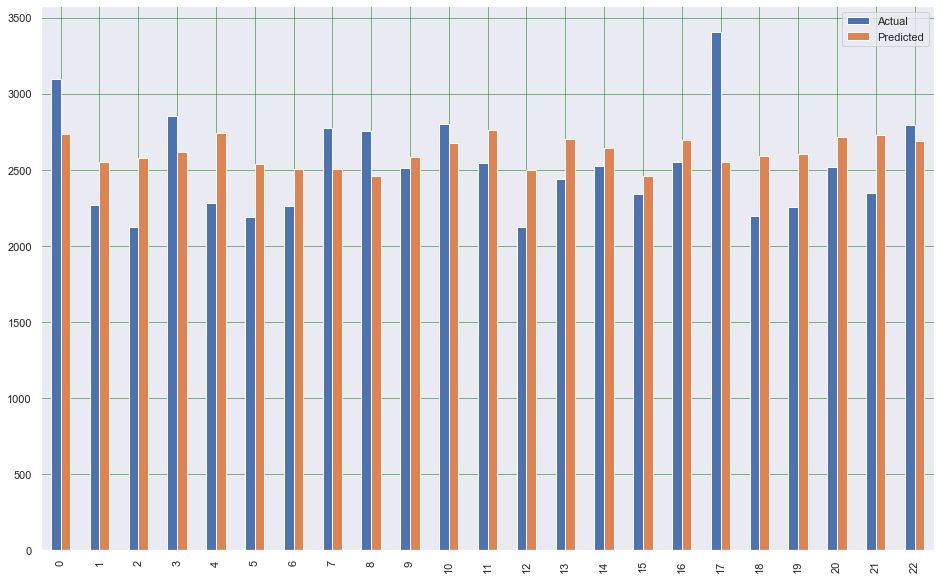

In [108]:
pred5.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [109]:
x_new4= [[2018]]


In [110]:
print(model5.predict(x_new4))

[[2426.58440485]]
